#I. Analisis de datos roda 3

##Desarrollo: Metodologia CRISP-DM

1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment

##To-dos

- Realizar la clasificacion por cluster
- Realizar el perfil de horas por Roles
- Realizar datos estadisticos de las horas por Rols, y mes
- Agregar un analisis de datos estadisticos por semana
- Realizar un reporte con visualizacion, una prueba funcional del algoritmo

##Variables categoricas
- id_proj
- Proyecto
- week + month + year
- tipo
- Linea de negocio (acronimo)
- Posiblemente la id de los empleados (groupby) + disponibilidad

# 1.- Business Understanding

skip bc of course +  modulo de descarga de DF.

In [ ]:
### WARNING ###
#Este no es necesario ejecutarlo DOWNLOAD DF
from google.colab import files

dfh.to_csv('dfh.csv', index=False)
files.download('dfh.csv')

NameError: name 'dfh' is not defined

# 2.- Data Understanding

##Preparing a suitable df merging CSV proyects and timesheet

❗df headcolumns must be fixed ❗

###data:

- 0   id_ts                     52029 non-null  int64          - debe ser eliminado por temas de usabilidad
- 1   hh                        48900 non-null  float64        - debe ser reevaluado porque posee negativos
- 2   date                      52029 non-null  datetime64[ns] - transformado a formato fecha
- 3   week                      52029 non-null  object         - sin cambios?
- 4   descripcion               52029 non-null  object         - convertir a int
- 5   Ini Proy                  52029 non-null  datetime64[ns] - limitador de fecha principal
- 6   Fin Proy                  52029 non-null  datetime64[ns] - limitador de termino principal
- 7   week_rel                  52029 non-null  int64          - fecha-semana (inicio)
- 8   project_id                52029 non-null  int64          - limpieza estandar
- 9   task_id                   51269 non-null  float64        - limpieza estandar
- 10  cliente_id                23460 non-null  float64        - limpieza estandar
- 11  employee_id               51865 non-null  float64        - limpieza estandar
- 12  department_id             35184 non-null  float64        - limpieza estandar
- 13  id_proj                   52029 non-null  int64          - id principal
- 14  Proyecto                  52029 non-null  object         - principal
- 15  Línea de Negocio          42317 non-null  object         - limpieza estandar
- 16  tipo                      42317 non-null  object         - limpieza estandar
- 17  cliente                   38758 non-null  float64        - limpieza estandar
- 18  create_date               52029 non-null  object         - limpieza estandar
- 19  Cierre                    42175 non-null  object         - limpieza estandar
- 20  Primer Timesheet          52029 non-null  datetime64[ns] - eliminado
- 21  Último Timesheet          52029 non-null  datetime64[ns] - eliminado
- 22  Egresos No HH CLP         52029 non-null  int64          - limpieza estandar
- 23  Monto Oferta CLP          41223 non-null  float64        - limpieza estandar
- 24  C/Agencia                 52029 non-null  object         - limpieza estandar
- 25  Desfase Inicio (días)     14684 non-null  float64        - limpieza estandar
- 26  Ocupación Al Iniciar (%)  52029 non-null  float64        - limpieza estandar

df_proyectos proyectos excel
df_horas timesheet excel

dd transformacion de datos ing = 1 jp = 2
dg transformacion de datos cortes 31 columnas => 21 (botar categorias sin informacion relevante)
dh pivot con las horas (trabajo manuel)
dj copia del dh preparacion para modelar
dk resultado del modelo -  sirve comparacion y evaluacion (nace pca)
dl pruebas copia del dk
dfp hipotesis de thomas => utiiza los datos de entrada de roda (solo proyectos), predecir con ocupacion [innecesario]
dfg hipotesis de javi => perfil de horas (solicitud de francisco)
junta proyectos+ roles+horas+fecha inicio+ fecha fin + duracion de proyectos (dias)

In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Cargar datos desde el archivo Excel
file_path = 'sample_data/Datos_RODA_v3.xlsx'
file_path2 = 'sample_data/Empleados.xlsx'

df_proyectos = pd.read_excel(file_path, sheet_name='proyectos')
df_horas = pd.read_excel(file_path, sheet_name='timesheet')
df_empleados = pd.read_excel(file_path2, sheet_name='Hoja')


In [ ]:
# Unir los datos de proyectos y timesheet
dato = pd.merge(df_horas, df_proyectos, left_on='project_id', right_on='id', suffixes=('_ts', '_proj'))

In [ ]:
# Unir los datos de Rol y empleados
data = pd.merge(dato, df_empleados, left_on='employee_id', right_on='employee_id', suffixes=('_empto', '_rol'))

In [ ]:
data.head(10)

,id_ts,hh,date,week,descripcion,Ini Proy,Fin Proy,week_rel,project_id,task_id,...,create_date,Cierre,Primer Timesheet,Último Timesheet,Egresos No HH CLP,Monto Oferta CLP,C/Agencia,Desfase Inicio (días),Ocupación Al Iniciar (%),Rol
0,20823,8.0,2021-12-02,2021-48,/,2021-08-23,2022-02-03,14,208,283.0,...,2021-08-23 14:32:17.004,2021-11-22,2021-08-23,2022-02-03,0,17399875.0,no,NaN,0.893148,Ingeniero de Proyecto
1,94069,8.0,2023-12-04,2023-49,Inclusión campos N° Clientes Base y Ventas mat...,2023-01-03,2023-12-29,48,422,9474.0,...,2023-03-02 20:09:17.329,2023-01-02,2023-01-03,2023-12-29,7375247,114906000.0,no,1.0,0.527294,Ingeniero de Proyecto
2,90557,1.0,2023-10-20,2023-42,Timesheet Adjustment,2023-10-16,2024-03-15,1,516,9759.0,...,2023-10-11 19:25:15.623,2023-10-11,2023-10-16,2024-03-15,0,32995308.0,no,5.0,0.788618,Ingeniero de Proyecto
3,90563,1.5,2023-10-23,2023-43,"Coordinación divisiones DCH, DGM y DRT",2022-10-24,2024-03-08,52,382,7735.0,...,2022-10-24 18:56:49.187,2024-02-06,2022-10-24,2024-03-08,890816,99288413.0,no,NaN,0.799071,Ingeniero de Proyecto
4,89695,3.5,2023-10-02,2023-40,/,2022-03-14,2024-03-08,81,267,6978.0,...,2022-03-23 18:24:57.791,2022-03-14,2022-03-14,2024-03-08,87121,56514166.0,no,0.0,0.840883,Ingeniero de Proyecto
5,88225,1.5,2023-09-13,2023-37,/,2022-03-14,2024-03-08,78,267,6978.0,...,2022-03-23 18:24:57.791,2022-03-14,2022-03-14,2024-03-08,87121,56514166.0,no,0.0,0.840883,Ingeniero de Proyecto
6,92707,1.0,2023-11-20,2023-47,Contexto,2023-10-02,2024-03-12,7,502,9765.0,...,2023-09-15 15:54:51.517,2023-09-15,2023-10-02,2024-03-12,43365,1435098.0,no,17.0,0.645761,Ingeniero de Proyecto
7,94070,8.0,2023-11-27,2023-48,Timesheet Adjustment,2020-11-26,2024-03-12,157,16,97.0,...,2020-07-27 00:25:14.150,NaN,2020-11-26,2024-03-12,0,NaN,no,NaN,0.432056,Gestor comercial
8,92671,0.5,2023-11-20,2023-47,/,2023-10-16,2024-03-15,5,516,9754.0,...,2023-10-11 19:25:15.623,2023-10-11,2023-10-16,2024-03-15,0,32995308.0,no,5.0,0.788618,Jefe de Proyectos
9,91774,1.0,2023-11-09,2023-45,/,2023-10-12,2023-12-21,4,510,9485.0,...,2023-09-27 15:53:14.668,2023-09-27,2023-10-12,2023-12-21,0,5106992.0,no,15.0,0.570267,Jefe de Proyectos


In [ ]:
data.Rol.unique()

array(['Ingeniero de Proyecto', 'Gestor comercial', 'Jefe de Proyectos',
       'Subgerente de Proyecto', 'Director E.E.', 'Subgerente Desarrollo',
       'Lider de Proyecto y Clientes Estrategicos',
       'Asistente Administrativo',
       'Gerente de Desarrollo y Nuevos Negocios', 0], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51865 entries, 0 to 51864
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_ts                     51865 non-null  int64         
 1   hh                        48752 non-null  float64       
 2   date                      51865 non-null  datetime64[ns]
 3   week                      51865 non-null  object        
 4   descripcion               51865 non-null  object        
 5   Ini Proy                  51865 non-null  datetime64[ns]
 6   Fin Proy                  51865 non-null  datetime64[ns]
 7   week_rel                  51865 non-null  int64         
 8   project_id                51865 non-null  int64         
 9   task_id                   51106 non-null  float64       
 10  cliente_id                23375 non-null  float64       
 11  employee_id               51865 non-null  float64       
 12  department_id     

In [ ]:
print("Columnas originales:", data.columns)

# Función para limpiar y renombrar los encabezados
def limpiar_encabezados(data):
    data.columns = data.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    data.columns = data.columns.str.replace(' ', '')  # Eliminar espacios
    data.columns = data.columns.str.replace('[^A-Za-z0-9]+', '')  # Eliminar caracteres especiales
    return data

# Aplicamos la función al DataFrame
data = limpiar_encabezados(data)

# Imprimimos los nuevos nombres de las columnas
print("Columnas nuevas:", data.columns)


Columnas originales: Index(['id_ts', 'hh', 'date', 'week', 'descripcion', 'Ini Proy', 'Fin Proy',
       'week_rel', 'project_id', 'task_id', 'cliente_id', 'employee_id',
       'department_id', 'id_proj', 'Proyecto', 'Línea de Negocio', 'tipo',
       'cliente', 'create_date', 'Cierre', 'Primer Timesheet',
       'Último Timesheet', 'Egresos No HH CLP', 'Monto Oferta CLP',
       'C/Agencia', 'Desfase Inicio (días)', 'Ocupación Al Iniciar (%)',
       'Rol'],
      dtype='object')
Columnas nuevas: Index(['id_ts', 'hh', 'date', 'week', 'descripcion', 'IniProy', 'FinProy',
       'week_rel', 'project_id', 'task_id', 'cliente_id', 'employee_id',
       'department_id', 'id_proj', 'Proyecto', 'LineadeNegocio', 'tipo',
       'cliente', 'create_date', 'Cierre', 'PrimerTimesheet',
       'UltimoTimesheet', 'EgresosNoHHCLP', 'MontoOfertaCLP', 'C/Agencia',
       'DesfaseInicio(dias)', 'OcupacionAlIniciar(%)', 'Rol'],
      dtype='object')


In [ ]:
data.isna().sum()

,0
id_ts,0
hh,3113
date,0
week,0
descripcion,0
IniProy,0
FinProy,0
week_rel,0
project_id,0
task_id,759


In [ ]:
data.isnull().mean() * 100

,0
id_ts,0.000000
hh,6.002121
date,0.000000
week,0.000000
descripcion,0.000000
IniProy,0.000000
FinProy,0.000000
week_rel,0.000000
project_id,0.000000
task_id,1.463415


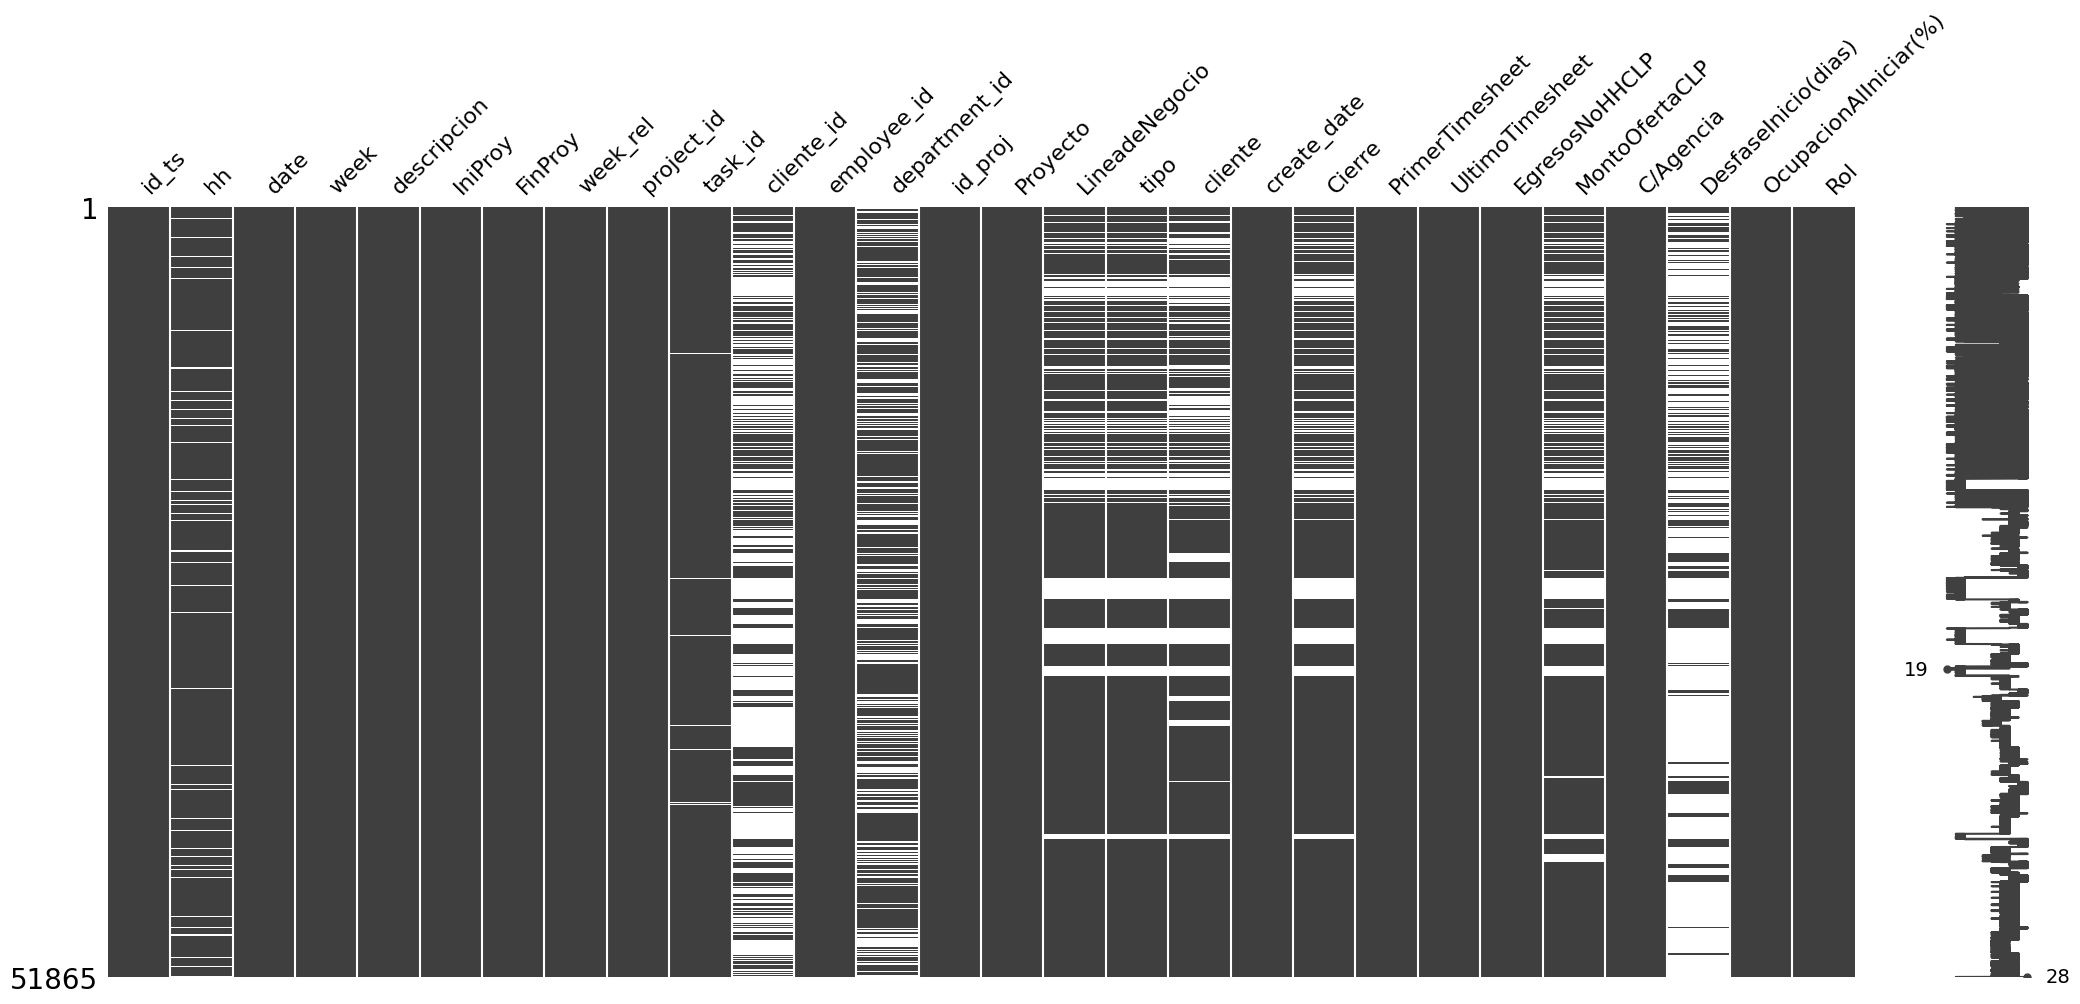

In [ ]:
# Visualización de datos nulos
msno.matrix(data)
plt.show()

In [ ]:
# Comprobar si IniProy + FinProy son iguales a PrimerTimesheet + UltimoTimesheet
if data.IniProy.equals(data.PrimerTimesheet):
    print("Los datos fecha son iguales")
else:
    print("Los datos fecha son diferentes")

if data.FinProy.equals(data.UltimoTimesheet):
    print("Los datos fecha son iguales")
else:
    print("Los datos fecha son diferentes")

Los datos fecha son iguales
Los datos fecha son iguales


In [ ]:
#Transformar create_date a formato date
data['create_date'] = pd.to_datetime(data['create_date']).dt.date

print("\nDataFrame convertido")


DataFrame convertido


In [ ]:
similarity = (data['create_date'] == data['date']).mean() * 100
print(f"Proporción de datos similares: {similarity}%")


Proporción de datos similares: 0.25257881037308394%


In [ ]:
similarity = (data['cliente'] == data['cliente_id']).mean() * 100
print(f"Proporción de datos similares: {similarity}%")


Proporción de datos similares: 32.119926732864165%


In [ ]:
similarity = (data['id_proj'] == data['project_id']).mean() * 100
print(f"Proporción de datos similares: {similarity}%")

Proporción de datos similares: 100.0%


In [ ]:
#Se realiza un flitro de variables de utilidad para el modelo
using = [
       'project_id', 'Proyecto', 'IniProy', 'FinProy', 'date', 'week', 'Cierre', 'week_rel', 'create_date', 'tipo', 'LineadeNegocio',
       'task_id', 'Rol', 'employee_id', 'department_id','cliente', 'cliente_id',
       'EgresosNoHHCLP', 'MontoOfertaCLP', 'C/Agencia','DesfaseInicio(dias)', 'OcupacionAlIniciar(%)', 'hh'
]
dd = data[using]

In [ ]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = dd.isnull().mean() * 100

# Filtrar las columnas que tienen un porcentaje de valores nulos mayor a 0
columnas_con_nulos = porcentaje_nulos[porcentaje_nulos > 0]

# Mostrar el resultado
print(columnas_con_nulos)


Cierre                 18.889424
tipo                   18.615637
LineadeNegocio         18.615637
task_id                 1.463415
department_id          32.162345
cliente                25.477682
cliente_id             54.931071
MontoOfertaCLP         20.721103
DesfaseInicio(dias)    71.846139
hh                      6.002121
dtype: float64


In [ ]:
print(dd['Cierre'])

0        2021-11-22
1        2023-01-02
2        2023-10-11
3        2024-02-06
4        2022-03-14
            ...    
51860    2021-08-03
51861    2021-08-03
51862    2023-05-31
51863           NaN
51864    2022-03-14
Name: Cierre, Length: 51865, dtype: object


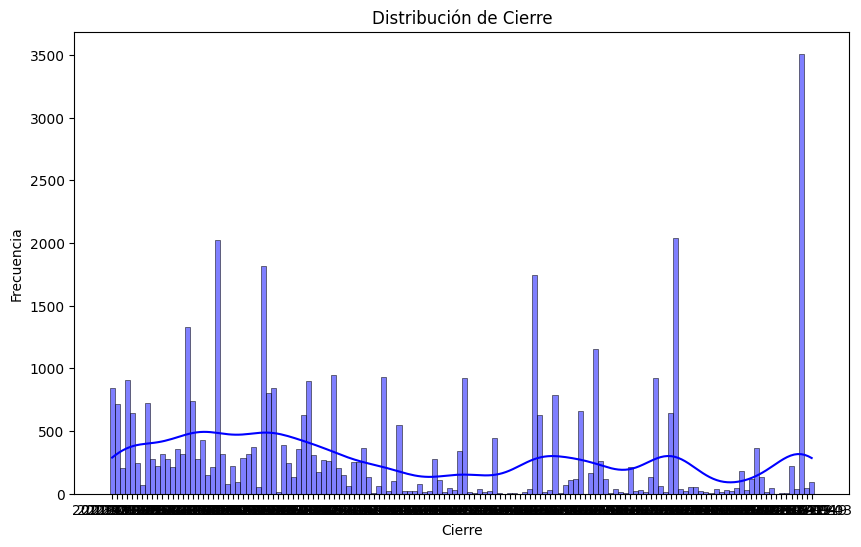

In [ ]:
# Visualizar la distribución de la columna 'Cierre'
plt.figure(figsize=(10, 6))
sns.histplot(dd['Cierre'], kde=True, bins=10, color='blue')
plt.title('Distribución de Cierre')
plt.xlabel('Cierre')
plt.ylabel('Frecuencia')
plt.show()

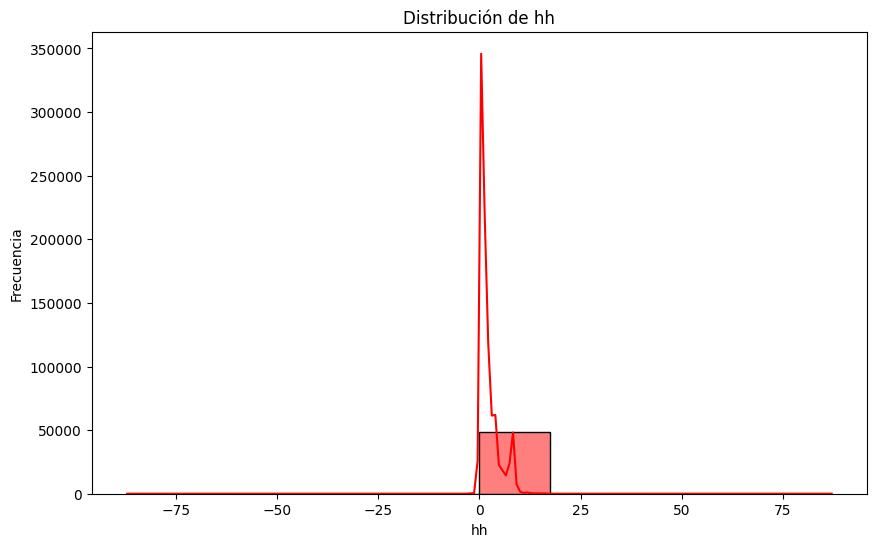

In [ ]:
# Visualizar la distribución de la columna 'hh'
plt.figure(figsize=(10, 6))
sns.histplot(dd['hh'], kde=True, bins=10, color='red')
plt.title('Distribución de hh')
plt.xlabel('hh')
plt.ylabel('Frecuencia')
plt.show()

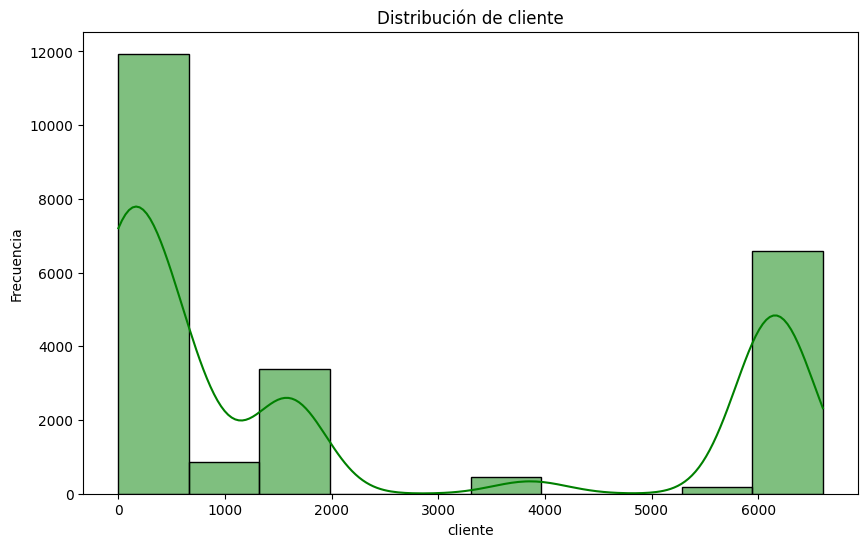

In [ ]:
# Visualizar la distribución de la columna 'cliente'
plt.figure(figsize=(10, 6))
sns.histplot(dd['cliente_id'], kde=True, bins=10, color='green')
plt.title('Distribución de cliente')
plt.xlabel('cliente')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#se considera cierre como un dato que no se puede inputar momentaneamente, por lo que se eliminan las filas nan
dd = dd.dropna(subset=['Cierre'])

In [ ]:
dd = dd.dropna(subset=['cliente_id'])

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, 2 to 51864
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   project_id             23292 non-null  int64         
 1   Proyecto               23292 non-null  object        
 2   IniProy                23292 non-null  datetime64[ns]
 3   FinProy                23292 non-null  datetime64[ns]
 4   date                   23292 non-null  datetime64[ns]
 5   week                   23292 non-null  object        
 6   Cierre                 23292 non-null  object        
 7   week_rel               23292 non-null  int64         
 8   create_date            23292 non-null  object        
 9   tipo                   23292 non-null  object        
 10  LineadeNegocio         23292 non-null  object        
 11  task_id                22816 non-null  float64       
 12  Rol                    23292 non-null  object        
 13  employ

In [ ]:
#Contar los datos de hh negativos (43)// |x| -2, 0 --> outliers
sub_zero = dd[dd['hh'] < 0].shape[0]

print("Número de datos por debajo de 0 en la columna 'hh':", sub_zero)

Número de datos por debajo de 0 en la columna 'hh': 43


In [ ]:
#Como son poquitos se van a reemplazar por 0 //
dd['hh'] = dd['hh'].apply(lambda x: max(x, 0))

In [ ]:
dd.hh.fillna(0, inplace=True)

<ipython-input-27-8caf8f4b2bc6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd.hh.fillna(0, inplace=True)


In [ ]:
dd.task_id.fillna(0, inplace=True)

<ipython-input-28-1539d4d48021>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd.task_id.fillna(0, inplace=True)


In [ ]:
dd.employee_id.fillna(0, inplace=True)

<ipython-input-29-b8b1321a8eb5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd.employee_id.fillna(0, inplace=True)


In [ ]:
dd.department_id.fillna(0, inplace=True)

<ipython-input-30-04d1c9eb4274>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd.department_id.fillna(0, inplace=True)


In [ ]:
dd.cliente.fillna(0, inplace=True)

<ipython-input-31-0d5abfeba498>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd.cliente.fillna(0, inplace=True)


In [ ]:
dd.MontoOfertaCLP.fillna(0, inplace=True)

<ipython-input-32-dc1a8013197d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd.MontoOfertaCLP.fillna(0, inplace=True)


In [ ]:
dd['DesfaseInicio(dias)'].fillna(0, inplace=True)

<ipython-input-33-a9ceb848f7d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd['DesfaseInicio(dias)'].fillna(0, inplace=True)


In [ ]:
dd.cliente_id.unique()

array([2.330e+02, 1.566e+03, 1.617e+03, 5.922e+03, 6.123e+03, 6.268e+03,
       1.612e+03, 6.228e+03, 8.000e+00, 6.126e+03, 8.210e+02, 6.261e+03,
       6.235e+03, 6.055e+03, 1.611e+03, 6.247e+03, 6.910e+02, 6.173e+03,
       1.150e+02, 6.301e+03, 1.600e+02, 6.057e+03, 5.930e+02, 3.875e+03,
       6.720e+02, 1.569e+03, 6.530e+02, 8.600e+01, 3.856e+03, 6.309e+03,
       6.148e+03, 1.601e+03, 5.780e+02, 6.169e+03, 6.310e+03, 6.302e+03,
       2.000e+01, 1.110e+02, 1.000e+00, 6.179e+03, 6.307e+03, 3.510e+02,
       4.600e+01, 5.901e+03, 6.558e+03, 6.590e+03, 4.890e+02, 1.624e+03,
       6.066e+03, 7.900e+02, 3.000e+01, 9.000e+00, 6.033e+03, 6.265e+03,
       6.254e+03, 6.562e+03, 6.599e+03, 2.180e+02, 6.266e+03, 6.581e+03,
       6.149e+03, 1.160e+02, 8.700e+01, 3.580e+02, 7.890e+02, 2.800e+01,
       6.900e+01, 6.600e+03, 4.930e+02, 3.869e+03, 5.100e+02, 8.200e+01,
       6.601e+03, 2.580e+02, 1.634e+03, 6.604e+03, 4.900e+02, 4.970e+02,
       3.170e+02, 5.110e+02, 6.227e+03, 4.800e+01, 

In [ ]:
dd.isnull().mean() * 100

,0
project_id,0.0
Proyecto,0.0
IniProy,0.0
FinProy,0.0
date,0.0
week,0.0
Cierre,0.0
week_rel,0.0
create_date,0.0
tipo,0.0


In [ ]:
dd.Proyecto.unique()

array(['PRY2023-226', 'PRY2022-108', 'PRY2021-097', 'PRY2023-170',
       'PRY2023-124', 'PRY2023-174', 'PRY2023-125', 'PRY2023-034',
       'PRY2023-042', 'PRY2022-199', 'PRY2023-018', 'PRY2023-095',
       'PRY2023-259', 'PRY2023-033', 'PRY2023-068', 'PRY2023-133',
       'PRY2023-081', 'PRY2023-053', 'PRY2022-162', 'PRY2023-222',
       'PRY2023-215', 'PRY2023-134', 'PRY2023-160', 'PRY2023-192',
       'PRY2023-314', 'PRY2023-080', 'PRY2023-049', 'PRY2023-207',
       'PRY2023-061', 'PRY2022-186', 'PRY2021-042', 'PRY2023-189',
       'PRY2023-266', 'PRY2023-007', 'PRY2023-227', 'PRY2023-098',
       'PRY2023-023', 'PRY2023-221', 'PRY2023-232', 'PRY2020-001',
       'PRY2020-010', 'PRY2023-063', 'PRY2019-107', 'PRY2022-099',
       'PRY2023-087', 'PRY2023-211', 'PRY2023-188', 'PRY2023-094',
       'PRY2021-003', 'PRY2020-022', 'PRY2023-101', 'PRY2019-064',
       'PRY2023-303', 'PRY2024-041', 'PRY2020-081', 'PRY2022-046',
       'PRY2023-114', 'PRY2023-277', 'PRY2024-054', 'PRY2024-0

In [ ]:
# Errores de escritura -----------------------------------

dd.tipo.unique()

array(['Sistema de gestión', 'CM', 'Detalle',
       'Reportabilidad y Plataforma', 'Acompañamiento',
       'Auditoría Energética', 'Estrategia y mercado energético',
       'Gestión de Demanda', 'Huella', 'fi',
       'Estrategia y merkado energético',
       'Estrategia y mereddo energético', 'Básica', 'Capacitación',
       'Auditoría Interna', 'Discrepancia', 'Consultoría', 'Sello EE',
       'Focalizado', 'SGE', 'Electromovilidad',
       'Estrategia y merando energético', 'BNE', 'Gestor energético',
       'ITO', 'Medición de variables energéticas'], dtype=object)

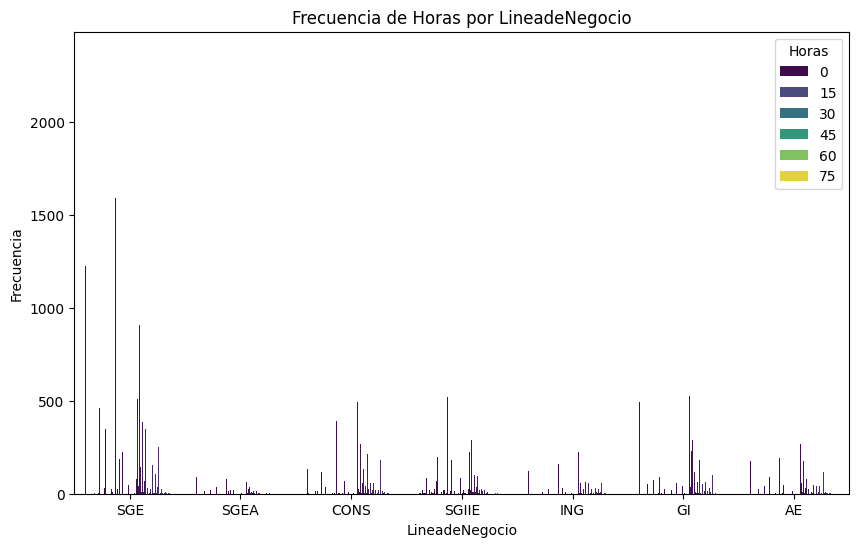

In [ ]:
# Crear un gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.countplot(data=dd, x='LineadeNegocio', hue='hh', palette='viridis')
plt.title('Frecuencia de Horas por LineadeNegocio')
plt.xlabel('LineadeNegocio')
plt.ylabel('Frecuencia')
plt.legend(title='Horas')
plt.show()

In [ ]:
#dd.descripcion.unique() se retira porque no aporta mucha informacion al modelo

/ = 0
Coordinación = 1
Elaboración de presentación revisión por dirección = 2
... = 3
Coordinación y desarrollo de informes = 4
Informes y coordinación con contraparte = 5
Traspaso de facturas = 6

In [ ]:
#Considerar antes de ejecutar el reemplazo
# dd['descripcion'] = dd.descripcion.replace({"/":0,"Coordinación":1,"Elaboración de presentación revisión por dirección":2,
#                                             "...":3,"Coordinación y desarrollo de informes":4,
#                                             "Informes y coordinación con contraparte":5,"Traspaso de facturas":6})

In [ ]:
dd['C/Agencia'].unique()

array(['no', 'Sí'], dtype=object)

In [ ]:
dd['C/Agencia'].replace({'no':0, 'Sí':1}, inplace=True)

<ipython-input-42-773e071da10d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd['C/Agencia'].replace({'no':0, 'Sí':1}, inplace=True)
<ipython-input-42-773e071da10d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dd['C/Agencia'].replace({'no':0, 'Sí':1}, inplace=True)


In [ ]:
dd['DesfaseInicio(dias)'].unique()

array([  5.,   0.,  17.,  15., 583.,   1.,  22.,  19.,   2.,   3.,  20.,
         7., 116.,   8.,  23.,  16.,  12.,  55.,  96.,   6.,  48., 109.,
         4.,  29.,  77.,  59., 107.,  91.,   9.,  10.,  14.,  33.,  11.,
        13.,  21.])

In [ ]:
dd.describe().T

,count,mean,min,25%,50%,75%,max,std
project_id,23292.0,353.76434,2.0,210.0,401.0,459.0,593.0,142.526007
IniProy,23292,2022-08-07 08:10:00.927356672,2020-04-27 00:00:00,2021-08-02 00:00:00,2022-12-07 00:00:00,2023-06-05 00:00:00,2024-03-11 00:00:00,NaN
FinProy,23292,2023-08-31 04:09:08.995363328,2020-11-27 00:00:00,2023-04-06 00:00:00,2024-02-21 00:00:00,2024-03-12 00:00:00,2024-03-21 00:00:00,NaN
date,23292,2023-02-20 13:31:22.534776064,2020-04-27 00:00:00,2022-08-18 00:00:00,2023-05-23 00:00:00,2023-11-07 00:00:00,2024-03-21 00:00:00,NaN
week_rel,23292.0,28.134853,0.0,9.0,20.0,37.0,169.0,27.128463
task_id,23292.0,6618.635025,0.0,4502.0,7842.0,8853.0,10680.0,3169.949147
employee_id,23292.0,85.280354,5.0,82.0,90.0,98.0,128.0,22.829532
department_id,23292.0,5.757342,0.0,0.0,4.0,12.0,16.0,5.31747
cliente,23292.0,2638.454019,0.0,115.0,821.0,6054.0,6751.0,2773.704807
cliente_id,23292.0,2217.714065,1.0,50.0,653.0,6055.0,6604.0,2612.372194


In [ ]:
dd['IniProy'] = pd.to_datetime(dd['IniProy']).dt.date

In [ ]:
dd['FinProy'] = pd.to_datetime(dd['FinProy']).dt.date

In [ ]:
dd['date'] = pd.to_datetime(dd['date']).dt.date

In [ ]:
dd.sort_values(by='project_id', inplace=True)

In [ ]:
dd['employee_id'] = dd['employee_id'].astype(int)

In [ ]:
dd['department_id'] = dd['department_id'].astype(int)

In [ ]:
dd['cliente'] = dd['cliente'].astype(int)

#3.- Data  Preparation
ahorasevienelochido

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, 8541 to 18199
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   project_id             23292 non-null  int64  
 1   Proyecto               23292 non-null  object 
 2   IniProy                23292 non-null  object 
 3   FinProy                23292 non-null  object 
 4   date                   23292 non-null  object 
 5   week                   23292 non-null  object 
 6   Cierre                 23292 non-null  object 
 7   week_rel               23292 non-null  int64  
 8   create_date            23292 non-null  object 
 9   tipo                   23292 non-null  object 
 10  LineadeNegocio         23292 non-null  object 
 11  task_id                23292 non-null  float64
 12  Rol                    23292 non-null  object 
 13  employee_id            23292 non-null  int64  
 14  department_id          23292 non-null  int64  
 15  clie

##hipotesis 2 perfil de horas

In [ ]:
dg = dd.copy()

In [ ]:
dg['IniProy'] = pd.to_datetime(dg['IniProy'])
dg['IniYear'] = dg['IniProy'].dt.year
dg['IniMonth'] = dg['IniProy'].dt.month
dg['IniDay'] = dg['IniProy'].dt.day

In [ ]:
dg['FinProy'] = pd.to_datetime(dg['FinProy'])
dg['FinYear'] = dg['FinProy'].dt.year
dg['FinMonth'] = dg['FinProy'].dt.month
dg['FinDay'] = dg['FinProy'].dt.day

In [ ]:
dg['date'] = pd.to_datetime(dg['date'])
dg['CapYear'] = dg['date'].dt.year
dg['CapMonth'] = dg['date'].dt.month
dg['CapDay'] = dg['date'].dt.day

In [ ]:
dg['create_date'] = pd.to_datetime(dg['create_date'])
dg['CreateYear'] = dg['create_date'].dt.year
dg['CreateMonth'] = dg['create_date'].dt.month
dg['CreateDay'] = dg['create_date'].dt.day

In [ ]:
dg[['WeekYear', 'Week']] = dg['week'].str.split('-', expand=True)

# Convertir las nuevas columnas a tipo numérico
dg['Week'] = dg['Week'].astype(int)
dg['WeekYear'] = dg['WeekYear'].astype(int)

In [ ]:
# Calcular las duracion de proyectos en dias
dg['FinProy'] = pd.to_datetime(dg['FinProy'], format='%d-%m-%Y')
dg['DifProy'] = (dg['FinProy'] - dg['IniProy']).dt.days

In [ ]:
dg.week_rel.unique()

array([  6,  24,  23,  26,  25,  27,  17,  29,  20,  22,  15,  30,  18,
        19,   8,   7,   0,   9,  14,  52,  51,  50,  49,   1,  16,  13,
         2,  10,  11,   5,  12,   3,  38,  33,  36,  35,  34,  37,  28,
        32,  39,  31,  40,   4,  21,  54,  58,  57,  42,  41,  60,  96,
       102,  66, 103,  95,  71,  98,  70,  67,  94,  97,  85, 105,  65,
        72,  92,  56,  64,  91,  90,  88,  87, 101,  86,  73,  68,  84,
        93,  76,  75, 104, 109,  81,  43,  44,  45,  47,  63,  74,  48,
        59,  61,  62,  55,  53,  99, 100, 110, 107, 106,  69,  46, 111,
        80,  89,  83,  78,  77,  79,  82, 119, 147, 123, 149, 122, 148,
       127, 134, 151, 150, 126, 128, 120, 124, 121, 125, 140, 141, 131,
       114, 116, 142, 139, 115, 117, 130, 132, 152, 135, 129, 133, 118,
       138, 168, 167, 146, 166, 169, 136, 144, 143, 137, 156, 145, 154,
       112])

In [ ]:
dg['C/Agencia'].replace({"Sí":1,"no":0},inplace=True)

<ipython-input-61-597de9aaaa1a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dg['C/Agencia'].replace({"Sí":1,"no":0},inplace=True)


In [ ]:
dg['C/Agencia'].unique()

array([0, 1])

In [ ]:
dg.Rol.unique()

array(['Jefe de Proyectos', 'Ingeniero de Proyecto',
       'Subgerente de Proyecto', 'Director E.E.',
       'Lider de Proyecto y Clientes Estrategicos',
       'Subgerente Desarrollo', 'Asistente Administrativo',
       'Gestor comercial'], dtype=object)

In [ ]:
############# ANTES DE REALIZAR EL LABEL ENCODER ###########################


# Crear un objeto LabelEncoder
le = LabelEncoder()

In [ ]:
# dg['Proyecto'] = le.fit_transform(dg['Proyecto'])
# print(dg['Proyecto'].unique())

presentacion
de resumen de cluster
proyecto
tipo 1
linea de negocio 2 sistema de gestion
cliente 400

In [ ]:
dg['C/Agencia'].replace({"Sí":1,"no":0},inplace=True)

<ipython-input-66-597de9aaaa1a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dg['C/Agencia'].replace({"Sí":1,"no":0},inplace=True)


In [ ]:
#Limpieza de 'tipo' manual
dg['tipo'].replace({'Sistema de gestión':1, 'Reportabilidad y Plataforma':2,
       'Auditoría Energética':3, 'Estrategia y mereddo energético':4, 'CM':5,
       'Gestor energético':6, 'Consultoría':7,
       'Estrategia y merkado energético':4, 'Focalizado':8,
       'Electromovilidad':9, 'Estrategia y mercado energético':4,
       'Auditoría Interna':10, 'Sello EE':11, 'Capacitación':12, 'Detalle':13,
       'Gestión de Demanda':14, 'Acompañamiento':15,
       'Medición de variables energéticas':16, 'Básica':17, 'Huella':18, 'BNE':19,
       'ITO':20, 'Estrategia y merando energético':4, 'Discrepancia':21, 'fi':22,
       'SGE':23},inplace=True)

<ipython-input-67-07340bafaef2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dg['tipo'].replace({'Sistema de gestión':1, 'Reportabilidad y Plataforma':2,
<ipython-input-67-07340bafaef2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dg['tipo'].replace({'Sistema de gestión':1, 'Reportabilidad y

In [ ]:
#dg['tipo'] = le.fit_transform(dg['tipo'])

# Ver los nuevos valores numéricos
print(dg['tipo'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 17 13 14 15 16 18 19 20 21 22 23]


In [ ]:
# dg['LineadeNegocio'] = le.fit_transform(dg['LineadeNegocio'])

# # Ver los nuevos valores numéricos
# print(dg['LineadeNegocio'].unique())

In [ ]:
# # Ajustar y transformar la columna 'Rol'
# dg['Rol'] = le.fit_transform(dg['Rol'])

# # Ver los nuevos valores numéricos
# print(dg['Rol'].unique())

In [ ]:
# Agrupar los datos por project_id y employee_id
grouped = dd.groupby(['project_id', 'employee_id', 'Rol']).agg({
    'hh': 'sum',  # Sumar las horas trabajadas
    'OcupacionAlIniciar(%)': 'mean'  # Calcular la ocupación promedio
}).reset_index()

# Mostrar el DataFrame agrupado
print(grouped.head())

   project_id  employee_id                     Rol     hh  \
0           2           21   Ingeniero de Proyecto   53.0   
1           2           23       Jefe de Proyectos  100.0   
2           2           54   Ingeniero de Proyecto    6.0   
3           3           26  Subgerente de Proyecto    1.0   
4           4           34   Ingeniero de Proyecto   10.0   

   OcupacionAlIniciar(%)  
0               0.134727  
1               0.134727  
2               0.134727  
3               0.432056  
4               0.320557  


In [ ]:
dg.columns

Index(['project_id', 'Proyecto', 'IniProy', 'FinProy', 'date', 'week',
       'Cierre', 'week_rel', 'create_date', 'tipo', 'LineadeNegocio',
       'task_id', 'Rol', 'employee_id', 'department_id', 'cliente',
       'cliente_id', 'EgresosNoHHCLP', 'MontoOfertaCLP', 'C/Agencia',
       'DesfaseInicio(dias)', 'OcupacionAlIniciar(%)', 'hh', 'IniYear',
       'IniMonth', 'IniDay', 'FinYear', 'FinMonth', 'FinDay', 'CapYear',
       'CapMonth', 'CapDay', 'CreateYear', 'CreateMonth', 'CreateDay',
       'WeekYear', 'Week', 'DifProy'],
      dtype='object')

In [ ]:
#Se realiza un flitro de variables de utilidad para el modelo
using = ['project_id', 'Proyecto', 'tipo', 'LineadeNegocio',
       'task_id', 'hh', 'Rol', 'employee_id', 'department_id', 'cliente',
       'cliente_id', 'EgresosNoHHCLP', 'MontoOfertaCLP', 'C/Agencia',
       'DesfaseInicio(dias)', 'OcupacionAlIniciar(%)', 'IniYear',
       'IniMonth', 'FinYear', 'FinMonth', 'CapYear',
       'CapMonth', 'CreateYear', 'CreateMonth', 'Week',
       'WeekYear','week_rel','DifProy']
dh = dg[using]

In [ ]:
dh.head()

,project_id,Proyecto,tipo,LineadeNegocio,task_id,hh,Rol,employee_id,department_id,cliente,...,FinYear,FinMonth,CapYear,CapMonth,CreateYear,CreateMonth,Week,WeekYear,week_rel,DifProy
8541,2,PRY2018-055,1,SGE,83.0,2.0,Jefe de Proyectos,23,4,9,...,2021,5,2020,11,2020,7,47,2020,6,208
10746,2,PRY2018-055,1,SGE,83.0,4.0,Jefe de Proyectos,23,4,9,...,2021,5,2021,3,2020,7,12,2021,24,208
10749,2,PRY2018-055,1,SGE,83.0,6.0,Jefe de Proyectos,23,4,9,...,2021,5,2021,3,2020,7,12,2021,24,208
10751,2,PRY2018-055,1,SGE,83.0,4.0,Jefe de Proyectos,23,4,9,...,2021,5,2021,3,2020,7,11,2021,23,208
2740,2,PRY2018-055,1,SGE,81.0,1.0,Ingeniero de Proyecto,21,4,9,...,2021,5,2021,4,2020,7,14,2021,26,208


#3.- Data  Preparation 2

In [ ]:
dh = dh.astype(int)

ValueError: invalid literal for int() with base 10: 'PRY2018-055'

In [ ]:
dh['OcupacionAlIniciar(%)'] = dg['OcupacionAlIniciar(%)']

In [ ]:
dh.head()

In [ ]:
dh.columns

In [ ]:
table = dh.pivot_table(
    values=['hh'],
    index=['project_id', 'Proyecto', 'tipo', 'LineadeNegocio', 'task_id',
       'Rol', 'employee_id', 'department_id', 'cliente', 'cliente_id',
       'EgresosNoHHCLP', 'MontoOfertaCLP', 'C/Agencia', 'DesfaseInicio(dias)',
       'OcupacionAlIniciar(%)', 'IniYear', 'IniMonth', 'FinYear', 'FinMonth',
       'CapYear', 'CapMonth', 'CreateYear', 'CreateMonth', 'Week', 'WeekYear',
       'week_rel','DifProy'],
    aggfunc={'hh': ["min", "max", "mean"]}
)

In [ ]:
dj = table.reset_index()

In [ ]:
dj.info()

In [ ]:
dj.columns

In [ ]:
print(dj)

In [ ]:
# Matriz de correlación para datos roda
correlation_matrix = dj.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación datos RODA', fontsize=20)
plt.show()

In [ ]:
dk= dj.copy()

In [ ]:
dk.drop(columns=['project_id', 'task_id', 'employee_id', 'department_id', 'cliente_id'])

In [ ]:
# Visualizar la distribución de la columna 'hh'
plt.figure(figsize=(10, 6))
sns.histplot(dk['hh'], kde=True, bins=10, color='blue')
plt.title('Distribución de hh')
plt.xlabel('hh')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
dk.info()

In [ ]:
#verificar si estan listas las columnas
def verificar_columnas_kmeans(dk):
    # Inicializar listas para almacenar los resultados
    columnas_numericas = []
    columnas_categoricas = []
    columnas_con_nulos = []

    # Iterar sobre cada columna del DataFrame
    for columna in dk.columns:
        # Verificar si la columna es numérica
        if pd.api.types.is_numeric_dtype(dk[columna]):
            columnas_numericas.append(columna)
        else:
            columnas_categoricas.append(columna)

        # Verificar si la columna contiene valores nulos
        if dk[columna].isnull().any():
            columnas_con_nulos.append(columna)

    # Imprimir los resultados
    print("Columnas numéricas listas para KMeans:")
    print(columnas_numericas)

    print("\nColumnas categóricas que necesitan ser codificadas:")
    print(columnas_categoricas)

    print("\nColumnas con valores nulos que necesitan ser tratadas:")
    print(columnas_con_nulos)

# Supongamos que tu DataFrame se llama dj
verificar_columnas_kmeans(dk)


In [ ]:
dk.head()

In [ ]:
dg.head()

#4.- Data Modeling + Evaluation

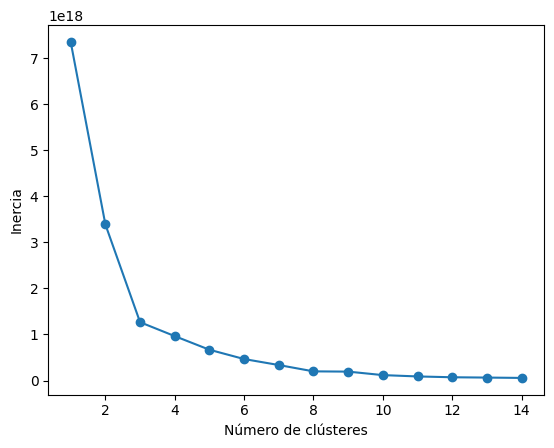

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(dk)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

In [ ]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13168 entries, 0 to 13167
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (project_id, )             13168 non-null  int64  
 1   (Proyecto, )               13168 non-null  int64  
 2   (tipo, )                   13168 non-null  int64  
 3   (LineadeNegocio, )         13168 non-null  int64  
 4   (task_id, )                13168 non-null  int64  
 5   (Rol, )                    13168 non-null  int64  
 6   (employee_id, )            13168 non-null  int64  
 7   (department_id, )          13168 non-null  int64  
 8   (cliente, )                13168 non-null  int64  
 9   (cliente_id, )             13168 non-null  int64  
 10  (EgresosNoHHCLP, )         13168 non-null  int64  
 11  (MontoOfertaCLP, )         13168 non-null  int64  
 12  (C/Agencia, )              13168 non-null  int64  
 13  (DesfaseInicio(dias), )    13168 non-null  int

In [ ]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13168 entries, 0 to 13167
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (project_id, )             13168 non-null  int64  
 1   (Proyecto, )               13168 non-null  int64  
 2   (tipo, )                   13168 non-null  int64  
 3   (LineadeNegocio, )         13168 non-null  int64  
 4   (task_id, )                13168 non-null  int64  
 5   (Rol, )                    13168 non-null  int64  
 6   (employee_id, )            13168 non-null  int64  
 7   (department_id, )          13168 non-null  int64  
 8   (cliente, )                13168 non-null  int64  
 9   (cliente_id, )             13168 non-null  int64  
 10  (EgresosNoHHCLP, )         13168 non-null  int64  
 11  (MontoOfertaCLP, )         13168 non-null  int64  
 12  (C/Agencia, )              13168 non-null  int64  
 13  (DesfaseInicio(dias), )    13168 non-null  int

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init='auto')
dk['cluster'] = kmeans.fit_predict(dk)

In [ ]:
# datos que son desde el -1 0 y 1. // 0-1
from sklearn.metrics import silhouette_score

score = silhouette_score(dk, dk['cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6215338601375815


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supongamos que ya has escalado los datos
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(dk)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dk_pca = pca.fit_transform(dk)

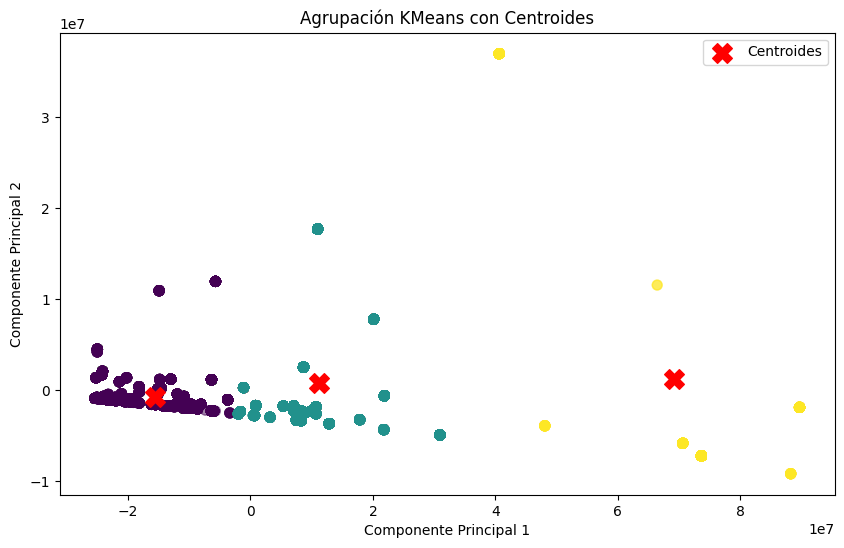

In [ ]:
plt.figure(figsize=(10, 6))

# Graficar los puntos con colores según el clúster asignado
plt.scatter(dk_pca[:, 0], dk_pca[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.5)

# Graficar los centroides
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroides')

# Etiquetas y título
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupación KMeans con Centroides')
plt.legend()
plt.show()

In [ ]:
# Número de datos en dk cuando se entrenó el modelo
num_datos_dk = dk.shape[0]
print(f'Número de datos utilizados en el modelo KMeans original: {num_datos_dk}')


Número de datos utilizados en el modelo KMeans original: 13168


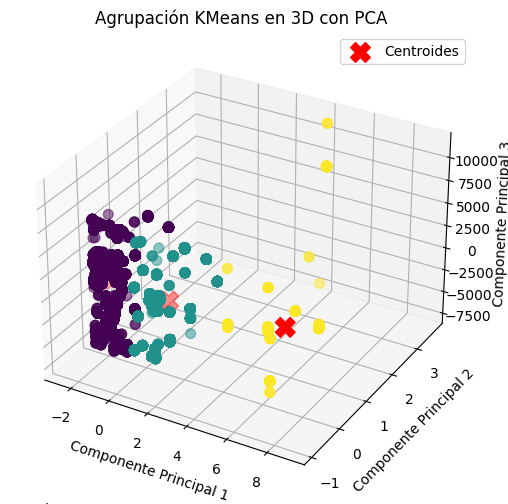

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Aplicar PCA para 3 componentes
pca_3d = PCA(n_components=3)
dk_pca_3d = pca_3d.fit_transform(dk)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos con colores según el clúster asignado
ax.scatter(dk_pca_3d[:, 0], dk_pca_3d[:, 1], dk_pca_3d[:, 2], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.5)

# Graficar los centroides
centroids_pca_3d = pca_3d.transform(centroids)
ax.scatter(centroids_pca_3d[:, 0], centroids_pca_3d[:, 1], centroids_pca_3d[:, 2], c='red', marker='X', s=200, label='Centroides')

# Etiquetas y título
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Agrupación KMeans en 3D con PCA')
ax.legend()
plt.show()

## Informacion y mini estadisticas

- fase 6 crisp-dm implementacion k-means o modelo / algoritmo de clasificacion

proyecto 1
proyecto 2
proyecto 3

caso 1
proyecto x costo x datos x
demostracion:
proyecto caso 1 corresponde al proyecto 2.
revisar porque hay tantos 0


In [ ]:
print(pca_3d.components_)

[[-2.23956118e-07 -2.42675627e-07 -3.94399097e-08 -7.49011559e-09
  -2.25485678e-06  3.27762218e-09  5.61419802e-08 -3.05957097e-09
   2.30756816e-05 -9.02961316e-06  7.26695390e-02  9.97356074e-01
  -2.77331053e-10 -6.90025856e-08  1.77125694e-10 -2.68059082e-10
  -1.88044366e-08  5.16488717e-09 -1.55517937e-08  5.81020589e-10
   1.77397277e-09 -9.17534877e-11 -1.22508378e-08  7.23033101e-09
   5.81020589e-10  1.24500725e-07  2.01111419e-06  1.62053847e-08
   1.28688611e-08  9.53089661e-09  2.31914457e-08]
 [ 4.32639292e-06  9.17616757e-07  1.31634671e-07 -7.32742890e-08
   8.30834659e-05 -1.23315997e-08  4.81966787e-07  5.08201200e-08
   3.51398424e-05  8.38444777e-05  9.97356066e-01 -7.26695383e-02
  -1.39227829e-09 -2.32898873e-07  2.75543435e-09  4.08814474e-08
  -8.03851467e-08  1.00487601e-08 -1.68626326e-08  2.13568618e-08
  -2.52676757e-08  4.09652999e-08 -8.06805439e-08 -1.07496695e-07
   2.13568618e-08 -7.67497777e-07 -9.12235467e-06  1.51448661e-08
   1.08944671e-08  7.0255

In [ ]:
# Realizar analisís por cluster
cluster_label = 0
proyectos_cluster = dk[clusters == cluster_label]


In [ ]:
# Describe las características del cluster seleccionado
descripcion_cluster = proyectos_cluster.describe()
print(descripcion_cluster)


        project_id     Proyecto         tipo LineadeNegocio       task_id  \
                                                                            
count  7157.000000  7157.000000  7157.000000    7157.000000   7157.000000   
mean    346.816543    63.754786     4.793908       3.723627   6541.799218   
std     152.520323    45.981694     5.446023       2.024837   3157.261580   
min       3.000000     0.000000     1.000000       0.000000      0.000000   
25%     167.000000    17.000000     1.000000       2.000000   4279.000000   
50%     389.000000    56.000000     1.000000       4.000000   7797.000000   
75%     465.000000    99.000000     8.000000       6.000000   8888.000000   
max     593.000000   168.000000    23.000000       6.000000  10582.000000   

               Rol  employee_id department_id      cliente   cliente_id  ...  \
                                                                         ...   
count  7157.000000  7157.000000   7157.000000  7157.000000  7157.0000

proyecto 1 cliente 2 dinero 3 corresponde a cluster 1 (ejemplo)
proyecto 1 cliente 2 dinero 3 corresponde a cluster 2 (ejemplo)
proyecto 1 cliente 2 dinero 3 corresponde a cluster 0 (ejemplo)
el 100%borrable

/usr/local/lib/python3.10/dist-packages/seaborn/_core/data.py:211: PerformanceWarning: indexing past lexsort depth may impact performance.
  (val_is_hashable and val in source_data)
/usr/local/lib/python3.10/dist-packages/seaborn/_core/data.py:217: PerformanceWarning: indexing past lexsort depth may impact performance.
  if val in source_data:
/usr/local/lib/python3.10/dist-packages/seaborn/_core/data.py:218: PerformanceWarning: indexing past lexsort depth may impact performance.
  plot_data[key] = source_data[val]


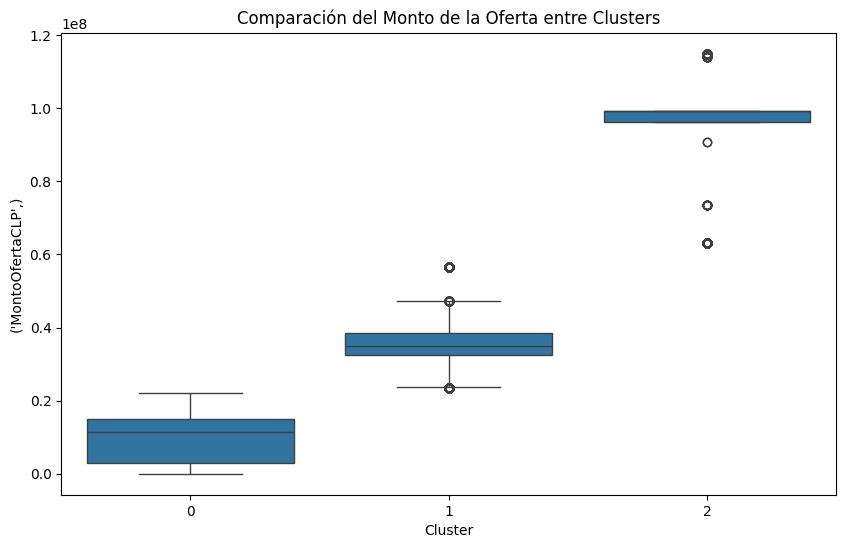

In [ ]:
#Creo que este es el que hace que dk tenga 31 columnas

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un dataframe combinado con las etiquetas de clusters y características
dk['Cluster'] = clusters

# Boxplot para comparar 'MontoOfertaCLP' entre clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y=('MontoOfertaCLP', ), data=dk)
plt.title('Comparación del Monto de la Oferta entre Clusters')
plt.show()


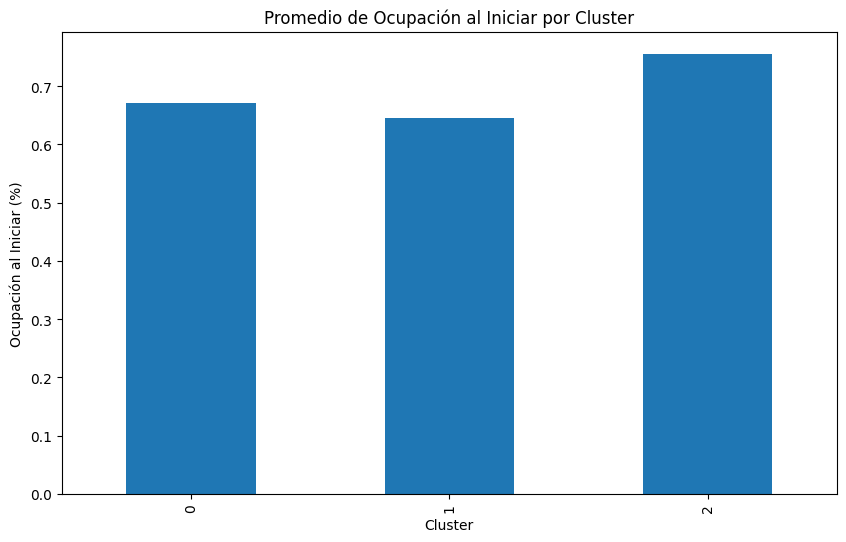

In [ ]:
# Promedio de 'OcupacionAlIniciar(%)' por cluster
promedio_ocupacion = dk.groupby('Cluster')['OcupacionAlIniciar(%)'].mean()

# Gráfico de barras
plt.figure(figsize=(10, 6))
promedio_ocupacion.plot(kind='bar')
plt.title('Promedio de Ocupación al Iniciar por Cluster')
plt.ylabel('Ocupación al Iniciar (%)')
plt.xlabel('Cluster')
plt.show()


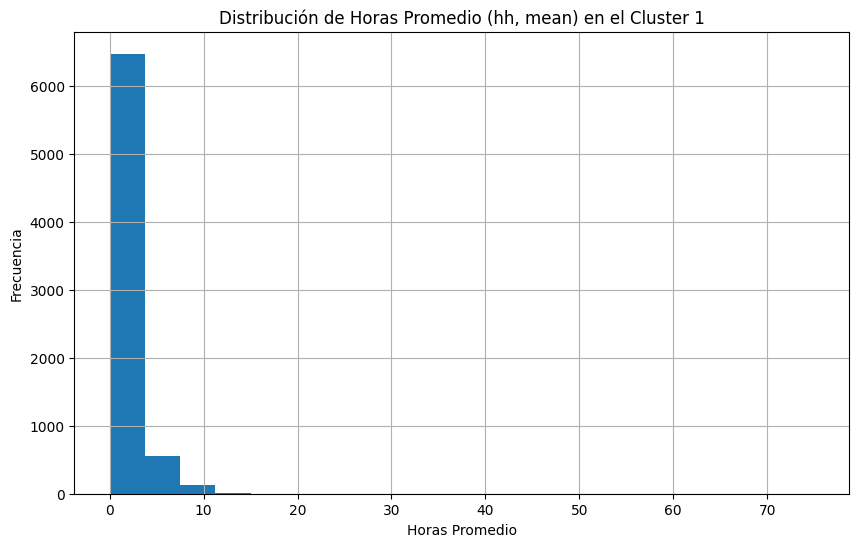

In [ ]:
# Histograma de la característica 'hh, mean' en un cluster 1
cluster_label = 0
proyectos_cluster = dk[clusters == cluster_label]
plt.figure(figsize=(10, 6))
proyectos_cluster[('hh', 'mean')].hist(bins=20)
plt.title('Distribución de Horas Promedio (hh, mean) en el Cluster 1')
plt.xlabel('Horas Promedio')
plt.ylabel('Frecuencia')
plt.show()

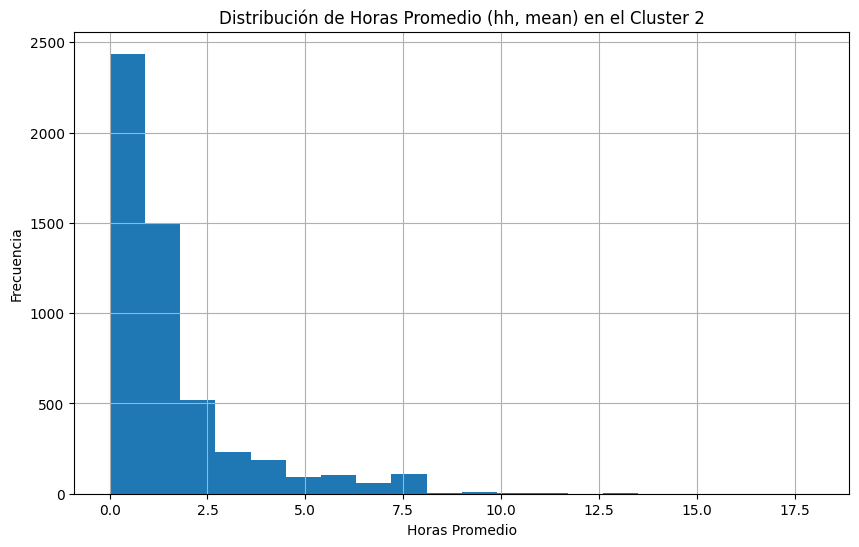

In [ ]:
# Histograma de la característica 'hh, mean' en un cluster 2
cluster_label = 1
proyectos_cluster = dk[clusters == cluster_label]
plt.figure(figsize=(10, 6))
proyectos_cluster[('hh', 'mean')].hist(bins=20)
plt.title('Distribución de Horas Promedio (hh, mean) en el Cluster 2')
plt.xlabel('Horas Promedio')
plt.ylabel('Frecuencia')
plt.show()

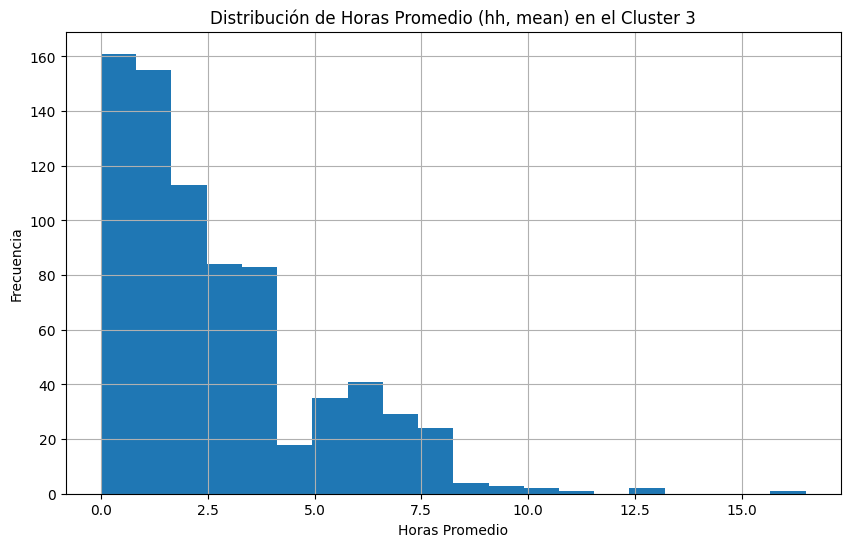

In [ ]:
# Histograma de la característica 'hh, mean' en un cluster 3
cluster_label = 2
proyectos_cluster = dk[clusters == cluster_label]
plt.figure(figsize=(10, 6))
proyectos_cluster[('hh', 'mean')].hist(bins=20)
plt.title('Distribución de Horas Promedio (hh, mean) en el Cluster 3')
plt.xlabel('Horas Promedio')
plt.ylabel('Frecuencia')
plt.show()

# 6.- Implementación
se realiza una primera prueba del modelo para predecir el tipo de proyectos del primer dataframe. El requerimiento es que debe tener la misma longitud y columnas que 'dk'.

In [ ]:
dp = dj.copy()

In [ ]:
dp['Cluster'] = None

In [ ]:
dp[('Cluster','' )].fillna(0, inplace=True)

In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13168 entries, 0 to 13167
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (project_id, )             13168 non-null  int64  
 1   (Proyecto, )               13168 non-null  int64  
 2   (tipo, )                   13168 non-null  int64  
 3   (LineadeNegocio, )         13168 non-null  int64  
 4   (task_id, )                13168 non-null  int64  
 5   (Rol, )                    13168 non-null  int64  
 6   (employee_id, )            13168 non-null  int64  
 7   (department_id, )          13168 non-null  int64  
 8   (cliente, )                13168 non-null  int64  
 9   (cliente_id, )             13168 non-null  int64  
 10  (EgresosNoHHCLP, )         13168 non-null  int64  
 11  (MontoOfertaCLP, )         13168 non-null  int64  
 12  (C/Agencia, )              13168 non-null  int64  
 13  (DesfaseInicio(dias), )    13168 non-null  int

In [ ]:
# Iterar sobre cada fila de dp y hacer la predicción
for index, row in dp.iterrows():
    # Convertir la fila a un DataFrame con una sola fila
    row_df = row.to_frame().T

    # Hacer la predicción para esta fila
    cluster_label = kmeans.predict(row_df)[0]  # [0] para obtener el valor de la predicción

    # Asignar el resultado en la columna 'Cluster'
    dp.at[index, 'Cluster'] = cluster_label

# Mostrar el DataFrame original con la columna de Clusters añadida
print(dp.head())

  project_id Proyecto tipo LineadeNegocio task_id Rol employee_id  \
                                                                    
0          2        1    1              4       0   3          54   
1          2        1    1              4      81   3          21   
2          2        1    1              4      81   3          21   
3          2        1    1              4      81   3          21   
4          2        1    1              4      81   3          21   

  department_id cliente cliente_id  ... CreateYear CreateMonth Week WeekYear  \
                                    ...                                        
0             0       9          9  ...       2020           7   13     2021   
1             4       9          9  ...       2020           7    2     2021   
2             4       9          9  ...       2020           7    3     2021   
3             4       9          9  ...       2020           7   10     2021   
4             4       9          9  

In [ ]:
dp.head(100)

project_id Proyecto tipo LineadeNegocio task_id Rol employee_id  \
                                                                     
0           2        1    1              4       0   3          54   
1           2        1    1              4      81   3          21   
2           2        1    1              4      81   3          21   
3           2        1    1              4      81   3          21   
4           2        1    1              4      81   3          21   
..        ...      ...  ...            ...     ...  ..         ...   
95          6        3    1              4     266   3          21   
96          6        3    1              4     266   3          21   
97          6        3    1              4     266   3          21   
98          6        3    1              4     266   3          21   
99          6        3    1              4     266   3          55   

   department_id cliente cliente_id  ... CreateYear CreateMonth Week WeekYear  \
                                     ...                                        
0              0       9          9  ...       2020           7   13     2021   
1              4       9          9  ...       2020           7    2     2021   
2              4       9          9  ...       2020           7    3     2021   
3              4       9          9  ...       2020           7   10     2021   
4              4       9          9  ...       2020           7   13     2021   
..           ...     ...        ...  ...        ...         ...  ...      ...   
95             4       8          8  ...       2020           7   31     2021   
96             4       8          8  ...       2020           7   32     2021   
97             4       8          8  ...       2020           7   32     2021   
98             4       8          8  ...       2020           7   33     2021   
99             0       8          8  ...       2020           7   28     2021   

   week_rel DifProy  hh               Cluster  
                    max      mean min          
0        25     208   4  4.000000   4       1  
1        14     208   2  2.000000   2       1  
2        15     208   2  2.000000   2       1  
3        22     208   1  1.000000   1       1  
4        25     208   3  3.000000   3       1  
..      ...     ...  ..       ...  ..     ...  
95       36     265   2  2.000000   2       0  
96       36     265   3  3.000000   3       0  
97       37     265   2  2.000000   2       0  
98       38     265   3  2.000000   1       0  
99       33     265   2  1.666667   1       0  

[100 rows x 31 columns]

In [ ]:
# Si deseas ordenarlo por 'project_id' y ver los clusters:
dp_sorted = dp.sort_values(by='project_id')

In [ ]:
dp_sorted.columns

MultiIndex([(           'project_id',     ''),
            (             'Proyecto',     ''),
            (                 'tipo',     ''),
            (       'LineadeNegocio',     ''),
            (              'task_id',     ''),
            (                  'Rol',     ''),
            (          'employee_id',     ''),
            (        'department_id',     ''),
            (              'cliente',     ''),
            (           'cliente_id',     ''),
            (       'EgresosNoHHCLP',     ''),
            (       'MontoOfertaCLP',     ''),
            (            'C/Agencia',     ''),
            (  'DesfaseInicio(dias)',     ''),
            ('OcupacionAlIniciar(%)',     ''),
            (              'IniYear',     ''),
            (             'IniMonth',     ''),
            (              'FinYear',     ''),
            (             'FinMonth',     ''),
            (              'CapYear',     ''),
            (             'CapMonth',     ''),
            (

<Figure size 1000x600 with 0 Axes>

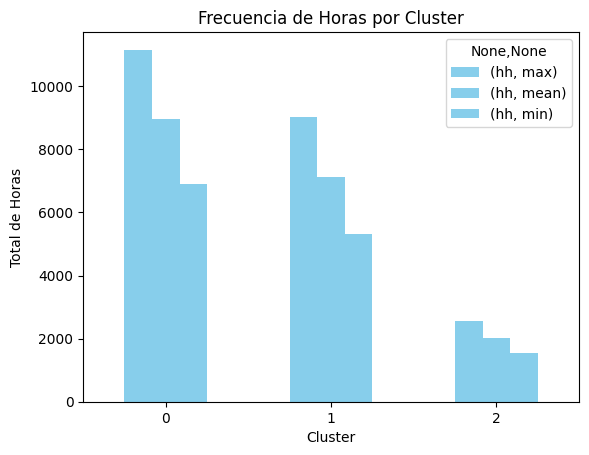

In [ ]:
# Supongamos que tu DataFrame se llama df y tiene las columnas 'hh' y 'Cluster'
# Agrupar por 'Cluster' y sumar las horas
frecuencia_horas_por_cluster = dp_sorted.groupby('Cluster')['hh'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_horas_por_cluster.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Cluster')
plt.ylabel('Total de Horas')
plt.title('Frecuencia de Horas por Cluster')
plt.xticks(rotation=0)
plt.show()


#II. Resolucion de Hipotesis

In [ ]:
# Hipotesis de thomas, revisar la relacion entre las variables de los datos de entrada y la ocupacion

df_proyectos.info()

df_proyectos.columns

use = ['id', 'Proyecto', 'Línea de Negocio', 'tipo', 'cliente', 'create_date',
       'Cierre', 'Egresos No HH CLP','Monto Oferta CLP', 'C/Agencia','Ocupación Al Iniciar (%)']
dfp = df_proyectos[use]

dfp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        238 non-null    int64         
 1   Proyecto                  238 non-null    object        
 2   Línea de Negocio          234 non-null    object        
 3   tipo                      234 non-null    object        
 4   cliente                   212 non-null    float64       
 5   create_date               238 non-null    object        
 6   Cierre                    228 non-null    object        
 7   Primer Timesheet          238 non-null    datetime64[ns]
 8   Último Timesheet          238 non-null    datetime64[ns]
 9   Egresos No HH CLP         238 non-null    int64         
 10  Monto Oferta CLP          210 non-null    float64       
 11  C/Agencia                 238 non-null    object        
 12  Desfase Inicio (días) 

,id,Proyecto,Línea de Negocio,tipo,cliente,create_date,Cierre,Egresos No HH CLP,Monto Oferta CLP,C/Agencia,Ocupación Al Iniciar (%)
0,447,PRY2023-106,SGE,Reportabilidad y Plataforma,6057.0,2023-05-10 21:20:14.303,2023-05-10,0,1530218.0,no,0.685250
1,157,PRY2020-041,SGIIE,Sistema de gestión,105.0,2020-11-27 12:28:53.585,2020-12-22,0,11342662.0,no,0.432056
2,448,PRY2023-104,ING,ITO,8.0,2023-05-10 21:32:15.493,2023-05-10,385309,4605476.0,no,0.685250
3,465,PRY2023-007,CONS,Estrategia y mercado energético,6148.0,2023-06-14 15:06:14.354,2023-06-14,0,19054369.0,no,0.699187
4,449,PRY2023-094,SGE,Sistema de gestión,351.0,2023-05-10 21:45:24.554,2023-05-10,261470,23779769.0,no,0.692218


In [ ]:
# Agrupar por project_id y sumar las horas trabajadas (hh)
# utilizacion = horas_totales_por_proyecto
utilizacion = dd.groupby('project_id')['hh'].sum().reset_index()
utilizacion.rename(columns={'hh': 'utilizacion'}, inplace=True)

In [ ]:
# Hacer la unión de los DataFrames por project_id
dfp = dfp.merge(utilizacion, left_on='id', right_on='project_id', how='left')

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        238 non-null    int64  
 1   Proyecto                  238 non-null    object 
 2   Línea de Negocio          234 non-null    object 
 3   tipo                      234 non-null    object 
 4   cliente                   212 non-null    float64
 5   create_date               238 non-null    object 
 6   Cierre                    228 non-null    object 
 7   Egresos No HH CLP         238 non-null    int64  
 8   Monto Oferta CLP          210 non-null    float64
 9   C/Agencia                 238 non-null    object 
 10  Ocupación Al Iniciar (%)  238 non-null    float64
 11  project_id                176 non-null    float64
 12  utilizacion               176 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 24.3+ KB


In [ ]:
dfp['utilizacion'] = dfp['utilizacion'].fillna(0)

In [ ]:
dfp['utilizacion'] = dfp.utilizacion.astype(int)

In [ ]:
# Crear una tabla dinámica para obtener las horas trabajadas por cada rol en cada proyecto
pivot_roles = dd.pivot_table(index='project_id', columns='Rol', values='hh', aggfunc='sum', fill_value=0)

# Unir la tabla dinámica al DataFrame dfg
dfp = dfp.merge(pivot_roles,  left_on='id', right_on='project_id', how='left')


In [ ]:
# Calcular la duración total de los proyectos en días


dd['IniProy'] = pd.to_datetime(dd['IniProy'])
dd['FinProy'] = pd.to_datetime(dd['FinProy'])

fechas_proyectos = dd.groupby('project_id').agg({'IniProy': 'min', 'FinProy': 'max'}).reset_index()
fechas_proyectos['duracion_dias'] = (fechas_proyectos['FinProy'] - fechas_proyectos['IniProy']).dt.days
dfp = dfp.merge(fechas_proyectos, left_on='id', right_on='project_id', how='left')

In [ ]:
print(fechas_proyectos)

     project_id    IniProy    FinProy  duracion_dias
0             2 2020-10-08 2021-05-04            208
1             3 2020-11-27 2020-11-27              0
2             4 2020-11-03 2021-11-05            367
3             5 2020-11-10 2021-03-29            139
4             6 2020-11-27 2021-08-19            265
..          ...        ...        ...            ...
171         585 2024-03-04 2024-03-14             10
172         586 2024-02-26 2024-02-27              1
173         587 2024-03-04 2024-03-21             17
174         590 2024-03-11 2024-03-12              1
175         593 2024-03-11 2024-03-11              0

[176 rows x 4 columns]


In [ ]:
dfp.tail(10)

,id,Proyecto,Línea de Negocio,tipo,cliente,create_date,Cierre,Egresos No HH CLP,Monto Oferta CLP,C/Agencia,...,Gestor comercial,Ingeniero de Proyecto,Jefe de Proyectos,Lider de Proyecto y Clientes Estrategicos,Subgerente Desarrollo,Subgerente de Proyecto,project_id_y,IniProy,FinProy,duracion_dias
228,267,PRY2021-097,SGE,Sistema de gestión,1617.0,2022-03-23 18:24:57.791,2022-03-14,87121,56514166.0,no,...,0.0,283.900000,246.000000,0.0,0.0,0.0,267.0,2022-03-14,2024-03-08,725.0
229,147,PRY2020-050,GI,Gestor energético,6054.0,2020-11-09 19:58:38.515,2023-10-24,1189135,35405844.0,no,...,0.0,2341.283333,18.833333,0.0,0.0,0.0,147.0,2020-11-11,2022-12-26,775.0
230,156,PRY2020-081,SGIIE,Sistema de gestión,481.0,2020-11-25 17:17:38.832,2021-08-03,0,15072089.0,no,...,0.0,576.750000,120.166667,4.0,0.0,0.0,156.0,2020-11-23,2023-10-04,1045.0
231,377,PRY2022-099,SGE,Acompañamiento,1.0,2022-10-11 18:40:18.307,2022-10-11,0,5890478.0,no,...,0.0,56.683333,36.083333,0.0,0.0,0.0,377.0,2022-10-11,2023-12-14,429.0
232,221,PRY2021-079,CONS,Consultoría,6054.0,2021-11-25 21:27:17.010,2023-10-24,1585962,9939347.0,Sí,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
233,233,PRY2021-048,SGE,Sistema de gestión,5916.0,2021-12-13 12:11:05.526,2022-08-02,37806,19727041.0,no,...,0.0,0.000000,0.000000,0.0,0.0,0.0,233.0,2021-11-22,2023-02-14,449.0
234,212,PRY2021-066,SGIIE,Sistema de gestión,5916.0,2021-09-10 20:59:15.089,2021-09-03,0,6196676.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
235,152,PRY2020-062,SGIIE,Sistema de gestión,490.0,2020-11-16 19:41:17.482,2023-11-23,0,11386779.0,no,...,0.0,135.550000,45.883333,2.5,0.0,0.0,152.0,2020-11-02,2023-10-04,1066.0
236,159,PRY2020-081,SGIIE,Sistema de gestión,489.0,2020-12-04 19:14:37.936,2021-08-03,0,15072089.0,no,...,0.0,204.083333,47.050000,0.0,0.0,0.0,159.0,2020-12-07,2024-03-07,1186.0
237,160,PRY2020-081,SGIIE,Sistema de gestión,676.0,2020-12-04 19:16:07.435,2021-08-03,0,15072089.0,no,...,0.0,259.833333,37.383333,0.0,0.0,0.0,160.0,2020-11-30,2023-09-28,1032.0


In [ ]:
#utilizacion.rename(columns={'hh': 'utilizacion'}, inplace=True)

In [ ]:
utilizacion_scope = (dfp['utilizacion'] == 0).sum()

print(utilizacion_scope)

67


In [ ]:
print(dfp.utilizacion)

0       16
1        0
2       76
3      476
4      229
      ... 
233      0
234      0
235    183
236    251
237    297
Name: utilizacion, Length: 238, dtype: int64


In [ ]:
dfp.isna().sum()

,0
id,0
Proyecto,0
Línea de Negocio,4
tipo,4
cliente,26
create_date,0
Cierre,10
Egresos No HH CLP,0
Monto Oferta CLP,28
C/Agencia,0


In [ ]:
#elimnar las filas con nulos
dfp = dfp.dropna(subset=['project_id_x'])
dfp = dfp.dropna(subset=['project_id_y'])

In [ ]:
dfg = dfp.copy()

In [ ]:
dfg = dfg.dropna()

In [ ]:
dfg[dfg == 0] = pd.NA

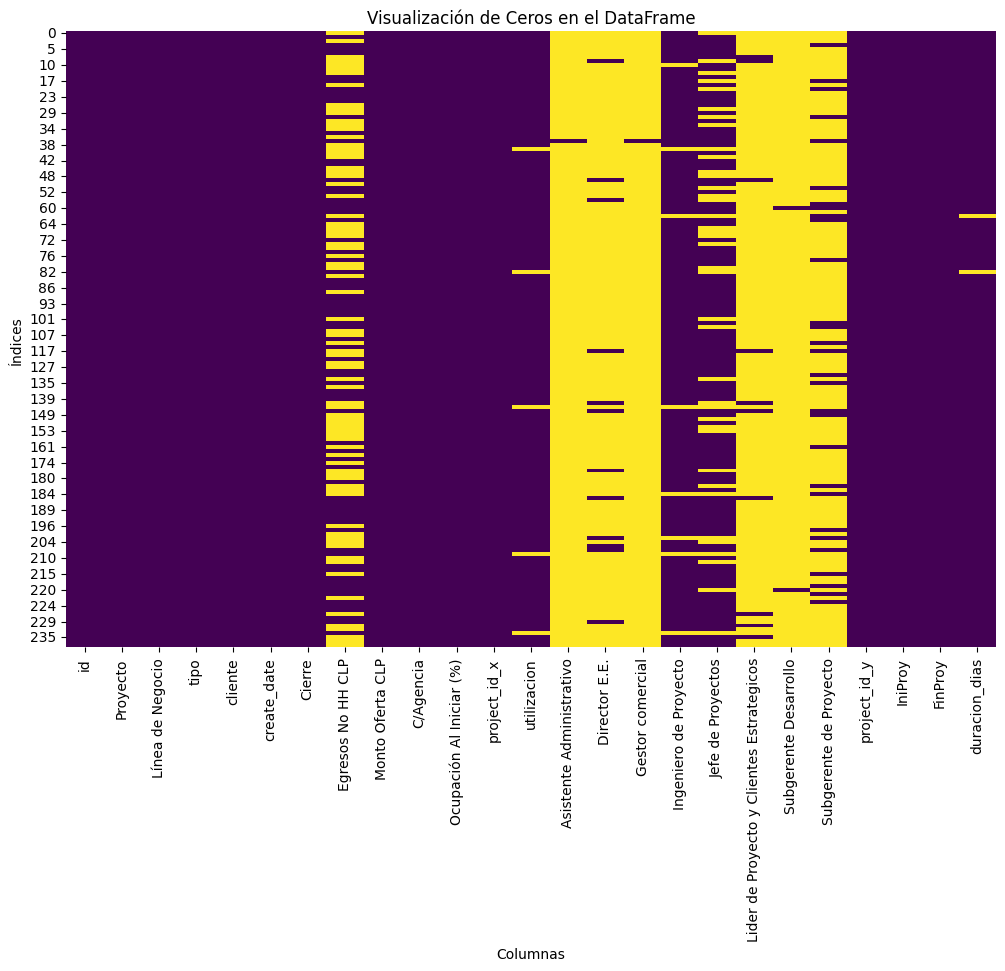

In [ ]:
# Crear un mapa de calor para visualizar los ceros
plt.figure(figsize=(12, 8))
sns.heatmap(dfg.isna(), cbar=False, cmap='viridis')
plt.title('Visualización de Ceros en el DataFrame')
plt.xlabel('Columnas')
plt.ylabel('Índices')
plt.show()


In [ ]:
dfg.columns

Index(['id', 'Proyecto', 'Línea de Negocio', 'tipo', 'cliente', 'create_date',
       'Cierre', 'Egresos No HH CLP', 'Monto Oferta CLP', 'C/Agencia',
       'Ocupación Al Iniciar (%)', 'project_id_x', 'utilizacion',
       'Asistente Administrativo', 'Director E.E.', 'Gestor comercial',
       'Ingeniero de Proyecto', 'Jefe de Proyectos',
       'Lider de Proyecto y Clientes Estrategicos', 'Subgerente Desarrollo',
       'Subgerente de Proyecto', 'project_id_y', 'IniProy', 'FinProy',
       'duracion_dias'],
      dtype='object')

In [ ]:
dfg['Egresos No HH CLP'].fillna(0, inplace=True)

In [ ]:
#Eliminar columnas extras
delette = ['id', 'Proyecto', 'Línea de Negocio', 'tipo', 'cliente', 'create_date',
       'Cierre', 'Egresos No HH CLP', 'Monto Oferta CLP', 'C/Agencia',
       'Ocupación Al Iniciar (%)', 'utilizacion',
       'Ingeniero de Proyecto', 'Jefe de Proyectos', 'IniProy', 'FinProy','duracion_dias']

dfh = dfg[delette]

# Alternativamente, puedes usar inplace=True para modificar el DataFrame original sin asignarlo a una nueva variable:
# df.drop(columns=[columna_a_eliminar], inplace=True)

In [ ]:
dfh.tail()

,id,Proyecto,Línea de Negocio,tipo,cliente,create_date,Cierre,Egresos No HH CLP,Monto Oferta CLP,C/Agencia,Ocupación Al Iniciar (%),utilizacion,Ingeniero de Proyecto,Jefe de Proyectos,IniProy,FinProy,duracion_dias
231,377,PRY2022-099,SGE,Acompañamiento,1.0,2022-10-11 18:40:18.307,2022-10-11,0.0,5890478.0,no,0.673635,92.0,56.683333,36.083333,2022-10-11,2023-12-14,429.0
233,233,PRY2021-048,SGE,Sistema de gestión,5916.0,2021-12-13 12:11:05.526,2022-08-02,37806.0,19727041.0,no,0.819977,NaN,NaN,NaN,2021-11-22,2023-02-14,449.0
235,152,PRY2020-062,SGIIE,Sistema de gestión,490.0,2020-11-16 19:41:17.482,2023-11-23,0.0,11386779.0,no,0.320557,183.0,135.550000,45.883333,2020-11-02,2023-10-04,1066.0
236,159,PRY2020-081,SGIIE,Sistema de gestión,489.0,2020-12-04 19:14:37.936,2021-08-03,0.0,15072089.0,no,0.459930,251.0,204.083333,47.050000,2020-12-07,2024-03-07,1186.0
237,160,PRY2020-081,SGIIE,Sistema de gestión,676.0,2020-12-04 19:16:07.435,2021-08-03,0.0,15072089.0,no,0.485482,297.0,259.833333,37.383333,2020-11-30,2023-09-28,1032.0


In [ ]:
dfh.isna().sum()

,0
id,0
Proyecto,0
Línea de Negocio,0
tipo,0
cliente,0
create_date,0
Cierre,0
Egresos No HH CLP,0
Monto Oferta CLP,0
C/Agencia,0


In [ ]:
dfh.fillna(0, inplace=True)

<ipython-input-139-23b0e09dc1d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh.fillna(0, inplace=True)


In [ ]:
dfh.columns

Index(['id', 'Proyecto', 'Línea de Negocio', 'tipo', 'cliente', 'create_date',
       'Cierre', 'Egresos No HH CLP', 'Monto Oferta CLP', 'C/Agencia',
       'Ocupación Al Iniciar (%)', 'utilizacion', 'Ingeniero de Proyecto',
       'Jefe de Proyectos', 'IniProy', 'FinProy', 'duracion_dias'],
      dtype='object')

In [ ]:
#Antes del drop, transformo a enteros
dfh['cliente'] = dfh['cliente'].astype(int)
dfh['Egresos No HH CLP'] = dfh['Egresos No HH CLP'].astype(int)
dfh['Monto Oferta CLP'] = dfh['Monto Oferta CLP'].astype(int)
dfh['utilizacion'] = dfh['utilizacion'].astype(int)
dfh['duracion_dias'] = dfh['duracion_dias'].astype(int)

<ipython-input-141-3a37b6a286ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh['cliente'] = dfh['cliente'].astype(int)
<ipython-input-141-3a37b6a286ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh['Egresos No HH CLP'] = dfh['Egresos No HH CLP'].astype(int)
<ipython-input-141-3a37b6a286ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py



---



In [ ]:
dfh['IniProy'] = pd.to_datetime(dfh['IniProy'])
dfh['IniMonth'] = dfh['IniProy'].dt.month
dfh['FinProy'] = pd.to_datetime(dfh['FinProy'])
dfh['FinMonth'] = dfh['FinProy'].dt.month

<ipython-input-142-895dbd0decca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh['IniProy'] = pd.to_datetime(dfh['IniProy'])
<ipython-input-142-895dbd0decca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfh['IniMonth'] = dfh['IniProy'].dt.month
<ipython-input-142-895dbd0decca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 237
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        155 non-null    int64         
 1   Proyecto                  155 non-null    object        
 2   Línea de Negocio          155 non-null    object        
 3   tipo                      155 non-null    object        
 4   cliente                   155 non-null    int64         
 5   create_date               155 non-null    object        
 6   Cierre                    155 non-null    object        
 7   Egresos No HH CLP         155 non-null    int64         
 8   Monto Oferta CLP          155 non-null    int64         
 9   C/Agencia                 155 non-null    object        
 10  Ocupación Al Iniciar (%)  155 non-null    float64       
 11  utilizacion               155 non-null    int64         
 12  Ingeniero de Proyecto     1

In [ ]:
dfh.isna().sum()

,0
id,0
Proyecto,0
Línea de Negocio,0
tipo,0
cliente,0
create_date,0
Cierre,0
Egresos No HH CLP,0
Monto Oferta CLP,0
C/Agencia,0


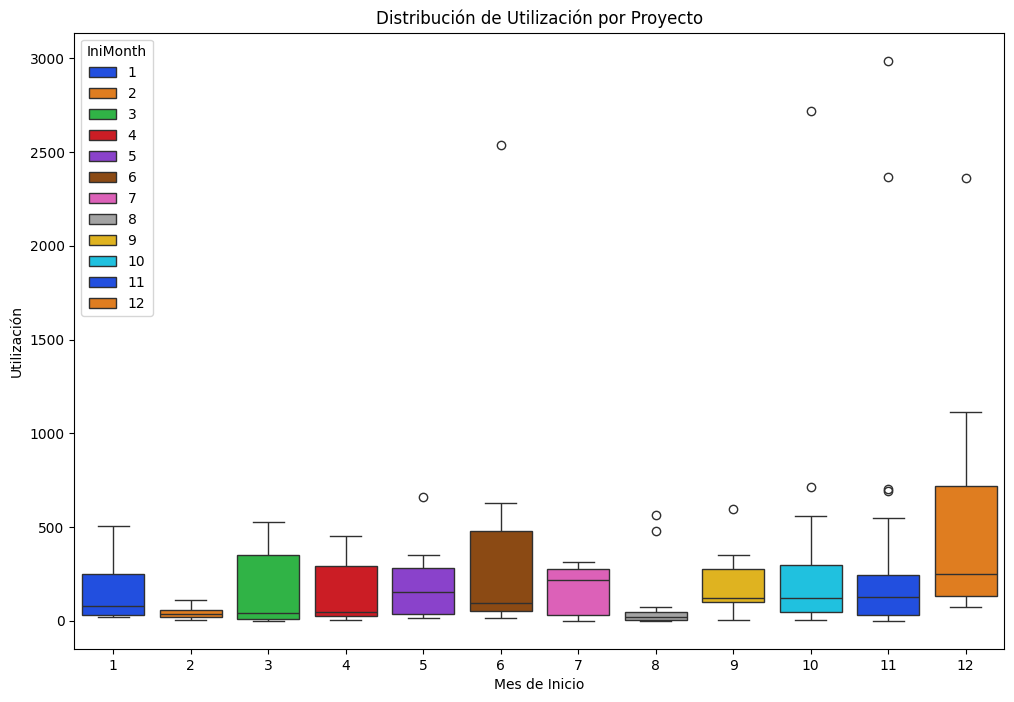

In [ ]:
# Pivotar el DataFrame


plt.figure(figsize=(12, 8))
sns.boxplot(x='IniMonth', y='utilizacion', data=dfh ,hue='IniMonth', palette='bright')
plt.title('Distribución de Utilización por Proyecto')
plt.xlabel('Mes de Inicio')
plt.ylabel('Utilización')
plt.show()


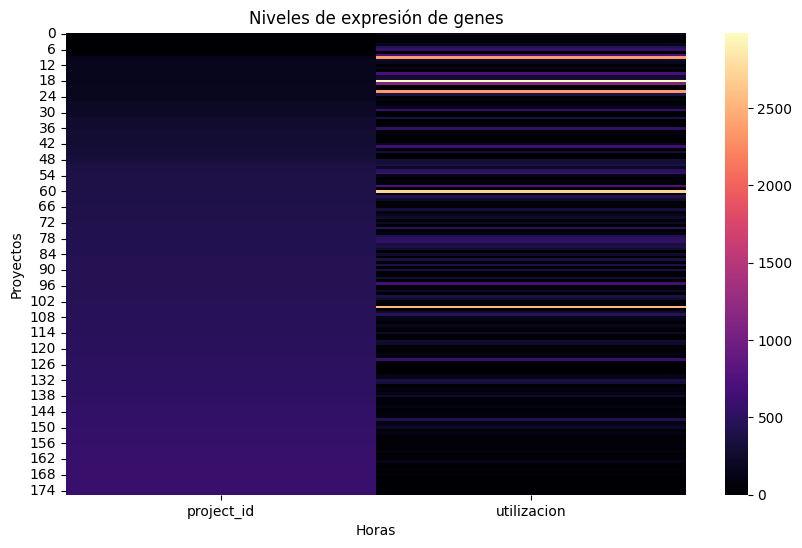

In [ ]:
# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(utilizacion, annot=None, cmap='magma')
plt.title('Niveles de expresión de genes')
plt.xlabel('Horas')
plt.ylabel('Proyectos')
plt.show()




---



In [ ]:
# Crear un objeto LabelEncoder
#le = LabelEncoder()

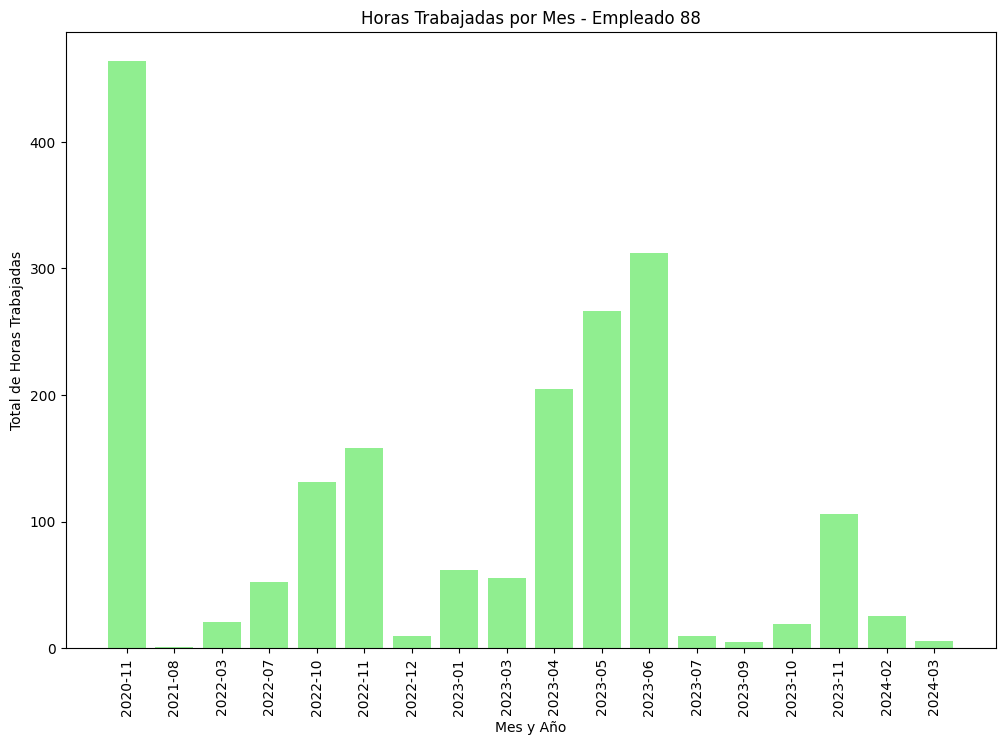

In [ ]:
#Dataframe dg, df

# Análisis de horas trabajadas por mes
# Convertir las fechas de inicio y fin a formato de mes y año
dg['IniProy'] = pd.to_datetime(dg['IniProy'])
dg['FinProy'] = pd.to_datetime(dg['FinProy'])
dg['IniMonthYear'] = dg['IniProy'].dt.to_period('M')
dg['FinMonthYear'] = dg['FinProy'].dt.to_period('M')

# Agrupar por employee_id y por mes, y sumar las horas trabajadas
horas_por_mes = dg.groupby(['employee_id', 'IniMonthYear'])['hh'].sum().reset_index()

# Crear el gráfico de barras para un empleado específico (por ejemplo, employee_id = 12345)
empleado_id = 88
horas_empleado_mes = horas_por_mes[horas_por_mes['employee_id'] == empleado_id]

plt.figure(figsize=(12, 8))
plt.bar(horas_empleado_mes['IniMonthYear'].astype(str), horas_empleado_mes['hh'], color='lightgreen')
plt.xlabel('Mes y Año')
plt.ylabel('Total de Horas Trabajadas')
plt.title(f'Horas Trabajadas por Mes - Empleado {empleado_id}')
plt.xticks(rotation=90)
plt.show()

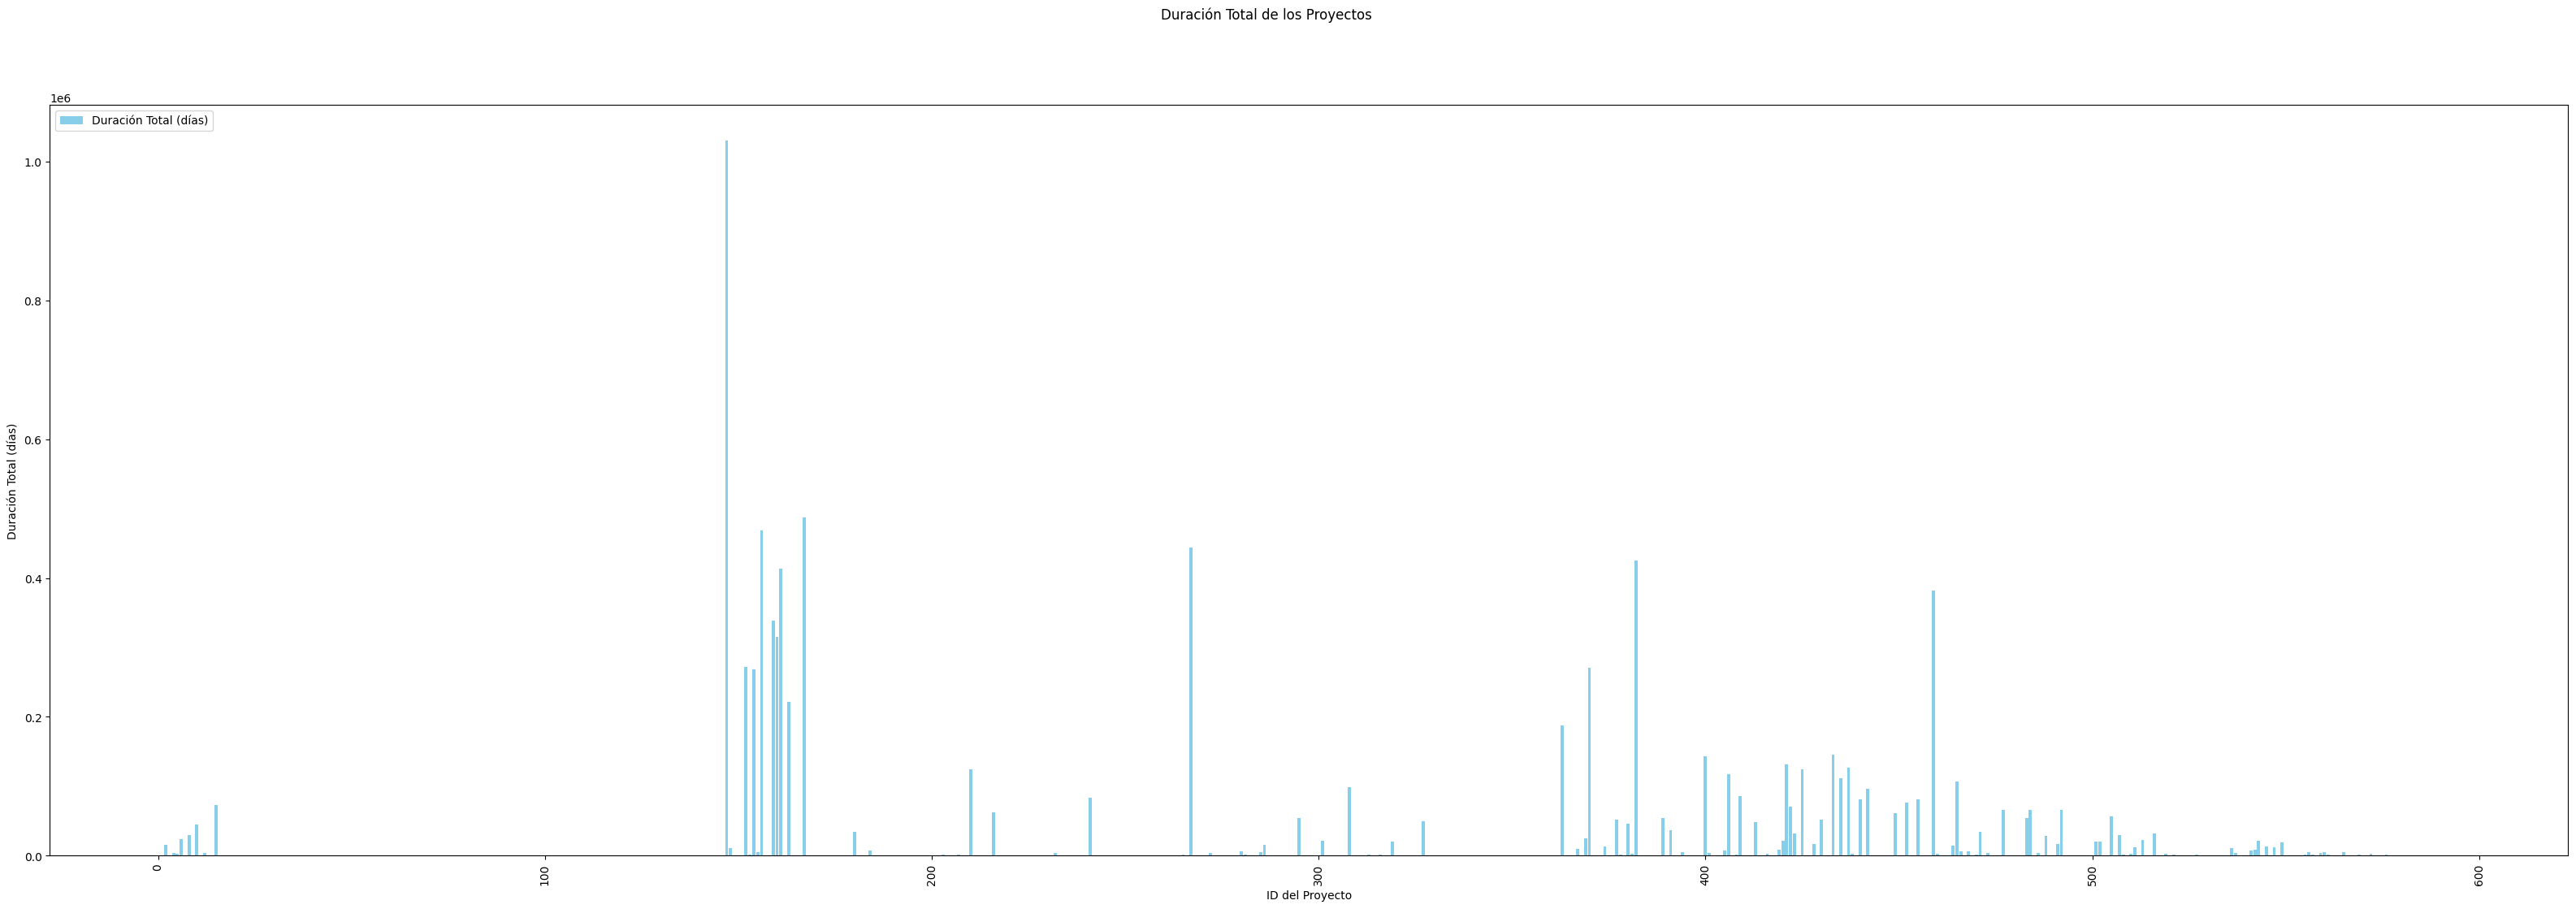

In [ ]:
# Calcular la duración de los proyectos
dg['IniProy'] = pd.to_datetime(dg['IniProy'])
dg['FinProy'] = pd.to_datetime(dg['FinProy'])
dg['Duracion'] = (dg['FinProy'] - dg['IniProy']).dt.days

# Contar la cantidad de empleados por proyecto
empleados_por_proyecto = dg.groupby('project_id')['employee_id'].nunique().reset_index()
empleados_por_proyecto.columns = ['project_id', 'cantidad_empleados']

# Sumar la duración total de los proyectos
duracion_proyectos = dg.groupby('project_id')['DifProy'].sum().reset_index()

# Unir los dos DataFrames
proyectos = pd.merge(duracion_proyectos, empleados_por_proyecto, on='project_id')

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(40, 12))

# Gráfico de la duración total de los proyectos
ax1.bar(proyectos['project_id'], proyectos['DifProy'], color='skyblue', label='Duración Total (días)')
ax1.set_xlabel('ID del Proyecto')
ax1.set_ylabel('Duración Total (días)')
ax1.tick_params(axis='x', rotation=90)

# Crear un segundo eje y para la cantidad de empleados
# ax2 = ax1.twinx()
# ax2.plot(proyectos['project_id'], proyectos['cantidad_empleados'], color='green', marker='o', linestyle='-', label='Cantidad de Empleados')
# ax2.set_ylabel('Cantidad de Empleados')

# Añadir leyendas y título
fig.suptitle('Duración Total de los Proyectos ')#y Cantidad de Empleados
ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')

plt.show()

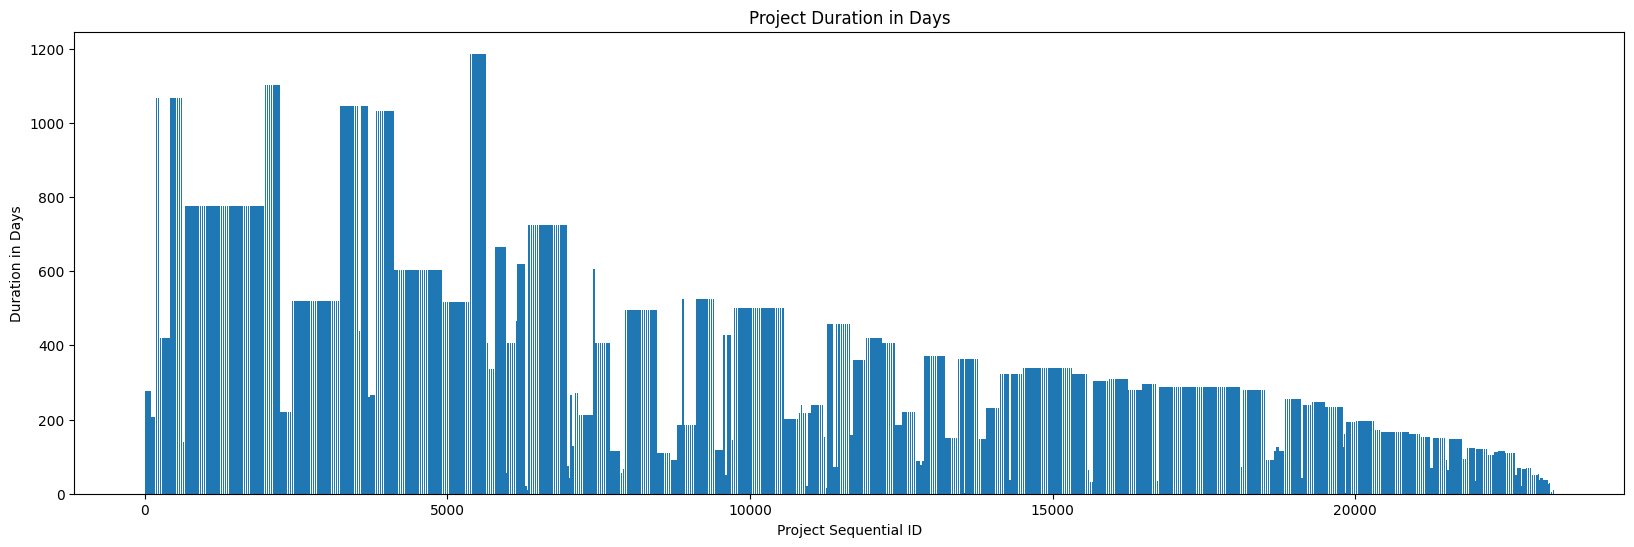

In [ ]:
# Crear una nueva columna con números secuenciales en orden cronológico
dg = dg.sort_values(by='IniProy').reset_index(drop=True)
dg['project_seq'] = dg.index + 1

# Calcular la duración en días y graficar
dg['duration_days'] = (dg['FinProy'] - dg['IniProy']).dt.days

plt.figure(figsize=(20, 6))
plt.bar(dg['project_seq'], dg['duration_days'])
plt.xlabel('Project Sequential ID')
plt.ylabel('Duration in Days')
plt.title('Project Duration in Days')
plt.show()

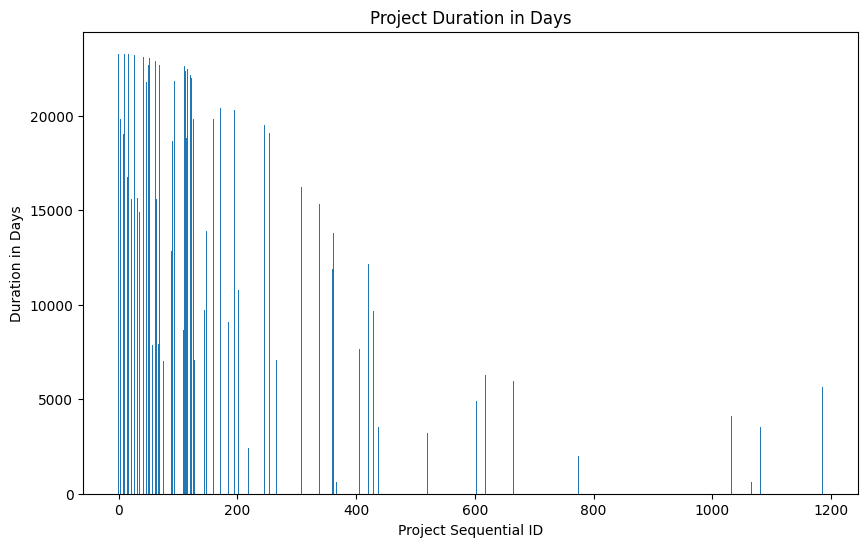

In [ ]:
# Supongamos que tu DataFrame se llama dg

# Paso 1: Crear una nueva columna con números secuenciales en orden cronológico
dg = dg.sort_values(by='duration_days').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.bar(dg['duration_days'], dg['project_seq'])
plt.xlabel('Project Sequential ID')
plt.ylabel('Duration in Days')
plt.title('Project Duration in Days')
plt.show()

#III. Resumen de clusters


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(dh)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

ValueError: could not convert string to float: 'PRY2018-055'

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init='auto')
dh['cluster'] = kmeans.fit_predict(dh)

In [ ]:
# datos que son desde el -1 0 y 1. // 0-1
from sklearn.metrics import silhouette_score

score = silhouette_score(dh, dh['cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6311435510280544


In [ ]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23282 entries, 44315 to 10576
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   project_id             23282 non-null  int64  
 1   Proyecto               23282 non-null  int64  
 2   tipo                   23282 non-null  int64  
 3   LineadeNegocio         23282 non-null  int64  
 4   task_id                23282 non-null  int64  
 5   hh                     23282 non-null  int64  
 6   Rol                    23282 non-null  int64  
 7   employee_id            23282 non-null  int64  
 8   department_id          23282 non-null  int64  
 9   cliente                23282 non-null  int64  
 10  cliente_id             23282 non-null  int64  
 11  EgresosNoHHCLP         23282 non-null  int64  
 12  MontoOfertaCLP         23282 non-null  int64  
 13  C/Agencia              23282 non-null  int64  
 14  DesfaseInicio(dias)    23282 non-null  int64  
 15  Ocu

In [ ]:
cluster_summary = dh.groupby(('cluster')).agg(['mean', 'max', 'min']).reset_index()

# Revisar el resumen
print(cluster_summary)


  cluster  project_id             Proyecto               tipo          \
                 mean  max  min       mean  max min      mean max min   
0       0  352.050066  593    3  63.906426  168   0  5.083083  23   1   
1       1  373.971522  561  184  56.550854  157  19  2.257933   7   1   
2       2  353.533883  521    2  64.183938  144   1  2.738944  14   1   

  LineadeNegocio              task_id                   hh               Rol  \
            mean max min         mean    max min      mean max min      mean   
0       3.430456   6   0  6518.708324  10582   0  1.406079  75   0  3.477821   
1       3.073230   4   0  7554.257120  10680   0  2.958503  19   0  3.892596   
2       3.334763   6   0  6635.234213  10232   0  1.477998  19   0  3.411331   

          employee_id          department_id              cliente            \
  max min        mean  max min          mean max min         mean   max min   
0   7   1   84.025457  124   5      5.760704  14   0  1937.126128  6751   0

In [ ]:
cluster_summary.head()

cluster  project_id             Proyecto               tipo          \
                 mean  max  min       mean  max min      mean max min   
0       0  352.050066  593    3  63.906426  168   0  5.083083  23   1   
1       1  373.971522  561  184  56.550854  157  19  2.257933   7   1   
2       2  353.533883  521    2  64.183938  144   1  2.738944  14   1   

  LineadeNegocio              task_id                   hh               Rol  \
            mean max min         mean    max min      mean max min      mean   
0       3.430456   6   0  6518.708324  10582   0  1.406079  75   0  3.477821   
1       3.073230   4   0  7554.257120  10680   0  2.958503  19   0  3.892596   
2       3.334763   6   0  6635.234213  10232   0  1.477998  19   0  3.411331   

          employee_id          department_id              cliente            \
  max min        mean  max min          mean max min         mean   max min   
0   7   1   84.025457  124   5      5.760704  14   0  1937.126128  6751   0   
1   7   0   92.750203  122   5      6.094386  16   0  4673.117982  6741   0   
2   7   1   86.043014  128   5      5.709351  14   0  3366.398570  6268   8   

    cliente_id           EgresosNoHHCLP               MontoOfertaCLP  \
          mean   max min           mean       max min           mean   
0  2033.563681  6604   1   9.644675e+05  14233356   0   1.056537e+07   
1  1086.656631  1566   8   2.107711e+06  19081885   0   1.010508e+08   
2  2635.679758  6268   8   5.745864e+06  42545743   0   3.789273e+07   

                       C/Agencia         DesfaseInicio(dias)           \
         max       min      mean max min                mean  max min   
0   24129665         0  0.175114   1   0            8.938594  116   0   
1  114906000  73536868  0.000000   0   0            0.160293    1   0   
2   63130324  25962318  0.099450   1   0            4.718922  583   0   

  OcupacionAlIniciar(%)                          IniYear              \
                   mean       max       min         mean   max   min   
0              0.675625  0.961672  0.320557  2021.967909  2024  2020   
1              0.753071  0.825784  0.527294  2022.190399  2024  2021   
2              0.633729  0.933798  0.047619  2022.064136  2023  2020   

   IniMonth              FinYear              FinMonth              CapYear  \
       mean max min         mean   max   min      mean max min         mean   
0  8.090334  12   1  2023.156522  2024  2020  5.598473  12   1  2022.617527   
1  7.234337  10   1  2023.700570  2024  2022  5.099268  12   2  2022.889341   
2  6.960946  11   1  2023.397580  2024  2021  4.601760  12   1  2022.697690   

               CapMonth           CreateYear             CreateMonth          \
    max   min      mean max min         mean   max   min        mean max min   
0  2024  2020  6.146571  12   1  2021.960194  2024  2020    7.886369  12   1   
1  2024  2021  5.816111  12   1  2022.190399  2024  2021    7.596420  10   1   
2  2024  2020  6.442464  12   1  2022.064136  2023  2020    6.927283  12   1   

        Week             WeekYear               week_rel              DifProy  \
        mean max min         mean   max   min       mean  max min        mean   
0  24.926560  53   1  2022.617527  2024  2020  25.885983  169   0  360.803055   
1  23.503662  52   1  2022.889341  2024  2021  29.662327   72   0  480.603743   
2  26.196260  53   1  2022.697690  2024  2020  31.164686  111   0  416.805281   

             
    max min  
0  1186   0  
1   814  69  
2   775  63

In [ ]:
for cluster_id in cluster_summary['cluster']:
    print(f"--- Resumen del Cluster {cluster_id} ---")

    # Filtramos los datos del clúster actual
    cluster_data = cluster_summary[cluster_summary['cluster'] == cluster_id]

    # Recorremos las columnas (omitimos la columna 'cluster' en la salida)
    for column in cluster_summary.columns.levels[0]:
        if column != 'cluster':
            mean_val = cluster_data[(column, 'mean')].values[0]
            max_val = cluster_data[(column, 'max')].values[0]
            min_val = cluster_data[(column, 'min')].values[0]

            print(f"{column.strip()}: Media={mean_val}, Máximo={max_val}, Mínimo={min_val}")

    print("\n")


--- Resumen del Cluster 0 ---
project_id: Media=352.05006557124125, Máximo=593, Mínimo=3
Proyecto: Media=63.906425981640055, Máximo=168, Mínimo=0
tipo: Media=5.083082619763943, Máximo=23, Mínimo=1
LineadeNegocio: Media=3.430455912983106, Máximo=6, Mínimo=0
task_id: Media=6518.708323690504, Máximo=10582, Mínimo=0
hh: Media=1.4060788397747435, Máximo=75, Mínimo=0
Rol: Media=3.4778214919385944, Máximo=7, Mínimo=1
employee_id: Media=84.02545707012266, Máximo=124, Mínimo=5
department_id: Media=5.760703540847026, Máximo=14, Mínimo=0
cliente: Media=1937.1261282110622, Máximo=6751, Mínimo=0
cliente_id: Media=2033.563681246625, Máximo=6604, Mínimo=1
EgresosNoHHCLP: Media=964467.5322841934, Máximo=14233356, Mínimo=0
MontoOfertaCLP: Media=10565365.629792485, Máximo=24129665, Mínimo=0
C/Agencia: Media=0.1751137853891846, Máximo=1, Mínimo=0
DesfaseInicio(dias): Media=8.938594461158683, Máximo=116, Mínimo=0
OcupacionAlIniciar(%): Media=0.6756249785528238, Máximo=0.9616724738675958, Mínimo=0.32055749

In [ ]:
cluster_summary.columns

MultiIndex([(              'cluster',     ''),
            (           'project_id', 'mean'),
            (           'project_id',  'max'),
            (           'project_id',  'min'),
            (             'Proyecto', 'mean'),
            (             'Proyecto',  'max'),
            (             'Proyecto',  'min'),
            (                 'tipo', 'mean'),
            (                 'tipo',  'max'),
            (                 'tipo',  'min'),
            (       'LineadeNegocio', 'mean'),
            (       'LineadeNegocio',  'max'),
            (       'LineadeNegocio',  'min'),
            (              'task_id', 'mean'),
            (              'task_id',  'max'),
            (              'task_id',  'min'),
            (                   'hh', 'mean'),
            (                   'hh',  'max'),
            (                   'hh',  'min'),
            (                  'Rol', 'mean'),
            (                  'Rol',  'max'),
            (

#Nuevo Trabajo

In [ ]:
dg.head()

,project_id,Proyecto,IniProy,FinProy,date,week,Cierre,week_rel,create_date,tipo,...,FinDay,CapYear,CapMonth,CapDay,CreateYear,CreateMonth,CreateDay,WeekYear,Week,DifProy
8541,2,PRY2018-055,2020-10-08,2021-05-04,2020-11-19,2020-47,2020-08-10,6,2020-07-27,1,...,4,2020,11,19,2020,7,27,2020,47,208
10746,2,PRY2018-055,2020-10-08,2021-05-04,2021-03-25,2021-12,2020-08-10,24,2020-07-27,1,...,4,2021,3,25,2020,7,27,2021,12,208
10749,2,PRY2018-055,2020-10-08,2021-05-04,2021-03-26,2021-12,2020-08-10,24,2020-07-27,1,...,4,2021,3,26,2020,7,27,2021,12,208
10751,2,PRY2018-055,2020-10-08,2021-05-04,2021-03-16,2021-11,2020-08-10,23,2020-07-27,1,...,4,2021,3,16,2020,7,27,2021,11,208
2740,2,PRY2018-055,2020-10-08,2021-05-04,2021-04-08,2021-14,2020-08-10,26,2020-07-27,1,...,4,2021,4,8,2020,7,27,2021,14,208


In [ ]:
dg.columns

Index(['project_id', 'Proyecto', 'IniProy', 'FinProy', 'date', 'week',
       'Cierre', 'week_rel', 'create_date', 'tipo', 'LineadeNegocio',
       'task_id', 'Rol', 'employee_id', 'department_id', 'cliente',
       'cliente_id', 'EgresosNoHHCLP', 'MontoOfertaCLP', 'C/Agencia',
       'DesfaseInicio(dias)', 'OcupacionAlIniciar(%)', 'hh', 'IniYear',
       'IniMonth', 'IniDay', 'FinYear', 'FinMonth', 'FinDay', 'CapYear',
       'CapMonth', 'CapDay', 'CreateYear', 'CreateMonth', 'CreateDay',
       'WeekYear', 'Week', 'DifProy'],
      dtype='object')

In [ ]:
#Se realiza un flitro de variables de utilidad para el modelo
using = ['Proyecto','LineadeNegocio','tipo','Rol','hh', 'week_rel', 'IniProy', 'FinProy',] #Agregar luego Week, Agencia, MontoOferta
dz = dg[using]

In [ ]:
dz.shape

(23292, 8)

In [ ]:
dz.head()

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,IniProy,FinProy
8541,PRY2018-055,SGE,1,Jefe de Proyectos,2.0,6,2020-10-08,2021-05-04
10746,PRY2018-055,SGE,1,Jefe de Proyectos,4.0,24,2020-10-08,2021-05-04
10749,PRY2018-055,SGE,1,Jefe de Proyectos,6.0,24,2020-10-08,2021-05-04
10751,PRY2018-055,SGE,1,Jefe de Proyectos,4.0,23,2020-10-08,2021-05-04
2740,PRY2018-055,SGE,1,Ingeniero de Proyecto,1.0,26,2020-10-08,2021-05-04


In [ ]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
dz['tipo_normalizado'] = dz['tipo'].apply(lambda x: unidecode(str(x)).lower())
resultado = dz[dz['tipo_normalizado'] == 'basica']
#resultado.Proyecto.unique()
resultado.head()

<ipython-input-81-359e79a60c78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz['tipo_normalizado'] = dz['tipo'].apply(lambda x: unidecode(str(x)).lower())


,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,IniProy,FinProy,tipo_normalizado


##Limpieza de datos

In [ ]:
replace_dict = {1: 'Sistema de gestión', 2: 'Reportabilidad y Plataforma',
                3: 'Auditoría Energética', 4: 'Estrategia y mercado energético',
                5: 'CM', 6: 'Gestor energético', 7: 'Consultoría',
                8: 'Focalizado', 9: 'Electromovilidad', 10: 'Auditoría Interna',
                11: 'Sello EE', 12: 'Capacitación', 13: 'Detalle',
                14: 'Gestión de Demanda', 15: 'Acompañamiento',
                16: 'Medición de variables energéticas', 17: 'Básica',
                18: 'Huella', 19: 'BNE', 20: 'ITO', 21: 'Discrepancia',
                22: 'fi', 23: 'SGE'}

dz.loc[:, 'tipo'] = dz['tipo'].replace(replace_dict)

<ipython-input-82-56e7ecf019b7>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Sistema de gestión' 'Sistema de gestión' 'Sistema de gestión' ... 'SGE'
 'SGE' 'Acompañamiento']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dz.loc[:, 'tipo'] = dz['tipo'].replace(replace_dict)


In [ ]:
dz.head()

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,IniProy,FinProy,tipo_normalizado
8541,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,2.0,6,2020-10-08,2021-05-04,1
10746,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,4.0,24,2020-10-08,2021-05-04,1
10749,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,6.0,24,2020-10-08,2021-05-04,1
10751,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,4.0,23,2020-10-08,2021-05-04,1
2740,PRY2018-055,SGE,Sistema de gestión,Ingeniero de Proyecto,1.0,26,2020-10-08,2021-05-04,1


In [ ]:
##Arreglar los datos de week_rel
# Función para ajustar semanas
def ajustar_semanas(df):
    if (df['week_rel'] == 0).any():
        df['week_rel'] += 1

    if df['tipo'].iloc[0] == 'Básica':
        min_week = df['week_rel'].min()
        if min_week > 1: #7 - 7 + 1
            df['week_rel'] = df['week_rel'] - min_week + 1
    return df

# Aplicar ajustes a cada grupo de proyecto
dz = dz.groupby('Proyecto', group_keys=False).apply(ajustar_semanas)

dz = dz.groupby('Proyecto', group_keys=False).apply(ajustar_semanas)
dz.head(10)


<ipython-input-84-a8ba0184d5e2>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dz = dz.groupby('Proyecto', group_keys=False).apply(ajustar_semanas)
<ipython-input-84-a8ba0184d5e2>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dz = dz.groupby('Proyecto', group_keys=False).apply(ajustar_semanas)


,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,IniProy,FinProy,tipo_normalizado
8541,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,2.0,7,2020-10-08,2021-05-04,1
10746,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,4.0,25,2020-10-08,2021-05-04,1
10749,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,6.0,25,2020-10-08,2021-05-04,1
10751,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,4.0,24,2020-10-08,2021-05-04,1
2740,PRY2018-055,SGE,Sistema de gestión,Ingeniero de Proyecto,1.0,27,2020-10-08,2021-05-04,1
10753,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,5.0,24,2020-10-08,2021-05-04,1
2743,PRY2018-055,SGE,Sistema de gestión,Ingeniero de Proyecto,1.0,27,2020-10-08,2021-05-04,1
10755,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,4.0,24,2020-10-08,2021-05-04,1
10756,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,2.0,24,2020-10-08,2021-05-04,1
10759,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,2.0,26,2020-10-08,2021-05-04,1


In [ ]:
dz['max_week'] = dz.groupby('Proyecto')['week_rel'].transform('max')

In [ ]:
dz_entre_fechas = dz[(dz['IniProy'].dt.year >= 2022) & (dz['IniProy'].dt.year < 2024)]
dz_entre_fechas.tail()

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,IniProy,FinProy,tipo_normalizado,max_week
2088,PRY2023-280,SGIIE,Auditoría Interna,Jefe de Proyectos,12.0,4,2023-12-18,2024-02-06,10,8
13043,PRY2023-280,SGIIE,Auditoría Interna,Jefe de Proyectos,4.0,1,2023-12-18,2024-02-06,10,8
2253,PRY2023-280,SGIIE,Auditoría Interna,Jefe de Proyectos,10.0,4,2023-12-18,2024-02-06,10,8
2985,PRY2023-280,SGIIE,Auditoría Interna,Jefe de Proyectos,1.0,6,2023-12-18,2024-02-06,10,8
13044,PRY2023-280,SGIIE,Auditoría Interna,Jefe de Proyectos,1.0,2,2023-12-18,2024-02-06,10,8


In [ ]:
import pandas as pd

# Definir los datos en un diccionario
data = {
    'Etiquetas de fila': [
        'Auditoría Energética', 'Auditoría Interna', 'Básica', 'Capacitación',
        'Detalle', 'Discrepancia', 'Focalizado', 'Reportabilidad y Plataforma',
        'Sello EE', 'Sistema de gestión'
    ],
    'Min HH': [
        326.2600211, 16.77443435, 0.65834027, 22.28191425,
        70.41085625, 0.936289033, 30.25482732, 16.05774373,
        16.31265017, 271.2392554
    ],
    'Máx HH': [
        770.7814604, 53.14071716, 20.67499307, 28.35141908,
        437.0591438, 6.313710967, 154.743506, 46.47929331,
        28.96512761, 756.6924113
    ],
    'Sem Mín': [
        17.92817016, 1.991080131, 0.169964332, 2.565275505,
        12.04438707, -1.109356899, 4.571123338, -0.63115836,
        2.109809001, 34.29433515
    ],
    'Sem Máx': [
        30.64325841, 11.15177701, 4, 10.86329592,
        32.28894626, 5.037928327, 10.14316238, 15.80576153,
        12.36638148, 63.34852199
    ]
}

# Crear el DataFrame
df_tipos_proyectos = pd.DataFrame(data)


In [ ]:
df_tipos_proyectos[['Min HH', 'Máx HH', 'Sem Mín', 'Sem Máx']] = df_tipos_proyectos[['Min HH', 'Máx HH', 'Sem Mín', 'Sem Máx']].round().clip(lower=1)

In [ ]:
df_tipos_proyectos.head(20)

,Etiquetas de fila,Min HH,Máx HH,Sem Mín,Sem Máx
0,Auditoría Energética,326.0,771.0,18.0,31.0
1,Auditoría Interna,17.0,53.0,2.0,11.0
2,Básica,1.0,21.0,1.0,4.0
3,Capacitación,22.0,28.0,3.0,11.0
4,Detalle,70.0,437.0,12.0,32.0
5,Discrepancia,1.0,6.0,1.0,5.0
6,Focalizado,30.0,155.0,5.0,10.0
7,Reportabilidad y Plataforma,16.0,46.0,1.0,16.0
8,Sello EE,16.0,29.0,2.0,12.0
9,Sistema de gestión,271.0,757.0,34.0,63.0


In [ ]:
tipos_a_mantener = df_tipos_proyectos['Etiquetas de fila'].tolist()
dz_tipos_proyectos = dz_entre_fechas[dz_entre_fechas['tipo'].isin(tipos_a_mantener)]

In [ ]:
# Primero, crea un diccionario a partir de df_tipos_proyectos que almacene los rangos de semanas para cada tipo de proyecto
rangos_semanas = df_tipos_proyectos.set_index('Etiquetas de fila')[['Sem Mín', 'Sem Máx']].to_dict('index')

# Filtrar el dataframe dz para conservar solo las filas donde 'max_week' esté en el rango de semanas especificado en df_tipos_proyectos
dz_semanas_rango = dz_tipos_proyectos[
    dz_tipos_proyectos.apply(lambda row: rangos_semanas.get(row['tipo'], {'Sem Mín': float('-inf'), 'Sem Máx': float('inf')})['Sem Mín'] <= row['max_week'] <= rangos_semanas.get(row['tipo'], {'Sem Mín': float('-inf'), 'Sem Máx': float('inf')})['Sem Máx'],
             axis=1)
]

dz_semanas_rango.head()

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,IniProy,FinProy,tipo_normalizado,max_week
44991,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,0.333333,4,2022-02-22,2022-03-16,10,4
44990,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,1.000000,3,2022-02-22,2022-03-16,10,4
44989,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,0.000000,2,2022-02-22,2022-03-16,10,4
44988,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,0.250000,3,2022-02-22,2022-03-16,10,4
44987,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,0.750000,3,2022-02-22,2022-03-16,10,4


In [ ]:
from unidecode import unidecode
dz_semanas_rango['tipo_normalizado'] = dz_semanas_rango['tipo'].apply(lambda x: unidecode(str(x)).lower())
resultado = dz_semanas_rango[dz_semanas_rango['tipo_normalizado'] == 'basica']
resultado.head(60)

<ipython-input-92-d79a5d83993f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz_semanas_rango['tipo_normalizado'] = dz_semanas_rango['tipo'].apply(lambda x: unidecode(str(x)).lower())


,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,IniProy,FinProy,tipo_normalizado,max_week
20206,PRY2022-070,ING,Básica,Jefe de Proyectos,0.5,1,2022-07-01,2022-07-19,basica,4
37203,PRY2022-070,ING,Básica,Ingeniero de Proyecto,1.0,4,2022-07-01,2022-07-19,basica,4
37204,PRY2022-070,ING,Básica,Ingeniero de Proyecto,3.0,2,2022-07-01,2022-07-19,basica,4
37206,PRY2022-070,ING,Básica,Ingeniero de Proyecto,2.0,2,2022-07-01,2022-07-19,basica,4
37207,PRY2022-070,ING,Básica,Ingeniero de Proyecto,4.0,2,2022-07-01,2022-07-19,basica,4
37208,PRY2022-070,ING,Básica,Ingeniero de Proyecto,0.0,3,2022-07-01,2022-07-19,basica,4
37210,PRY2022-070,ING,Básica,Ingeniero de Proyecto,2.0,3,2022-07-01,2022-07-19,basica,4
37211,PRY2022-070,ING,Básica,Ingeniero de Proyecto,4.0,3,2022-07-01,2022-07-19,basica,4
37205,PRY2022-070,ING,Básica,Ingeniero de Proyecto,3.0,2,2022-07-01,2022-07-19,basica,4
37209,PRY2022-070,ING,Básica,Ingeniero de Proyecto,1.0,3,2022-07-01,2022-07-19,basica,4


In [ ]:
dz_semanas_rango.shape

(5650, 10)

In [ ]:
dz_horas_totales = dz_semanas_rango.groupby(['Proyecto', 'tipo'])['hh'].sum().reset_index()
dz_horas_rango = dz_horas_totales.merge(df_tipos_proyectos, left_on='tipo', right_on='Etiquetas de fila', how='left')
proyectos_validos = dz_horas_rango[
    (dz_horas_rango['hh'] >= dz_horas_rango['Min HH']) &
    (dz_horas_rango['hh'] <= dz_horas_rango['Máx HH'])
]['Proyecto'].unique()
dz_horas_rango = dz_semanas_rango[dz_semanas_rango['Proyecto'].isin(proyectos_validos)]
dz_horas_rango.head()

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,IniProy,FinProy,tipo_normalizado,max_week
44991,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,0.333333,4,2022-02-22,2022-03-16,auditoria interna,4
44990,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,1.000000,3,2022-02-22,2022-03-16,auditoria interna,4
44989,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,0.000000,2,2022-02-22,2022-03-16,auditoria interna,4
44988,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,0.250000,3,2022-02-22,2022-03-16,auditoria interna,4
44987,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,0.750000,3,2022-02-22,2022-03-16,auditoria interna,4


In [ ]:
dz_horas_rango.shape

(3496, 10)

In [ ]:
# Crear una columna auxiliar con los valores límite según el tipo
dz_horas_rango['limite_hh'] = dz_horas_rango['tipo'].map({
    'Sistema de gestión': 3,
    'Auditoría Energética': 2,
    'Auditoría Interna': 0.99,
}).fillna(1)  # Asignar 1 como valor por defecto para otros tipos

# Filtrar los datos según los valores en 'hh' y 'limite_hh'
dz_sin_horas_uno = dz_horas_rango[dz_horas_rango['hh'] > dz_horas_rango['limite_hh']]

# Eliminar la columna auxiliar si no se necesita
dz_sin_horas_uno = dz_sin_horas_uno.drop(columns=['limite_hh'])

<ipython-input-338-8609a9597d29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dz_horas_rango['limite_hh'] = dz_horas_rango['tipo'].map({


In [ ]:
dz_sin_horas_uno.shape

(1064, 10)

In [ ]:
dz_sin_horas_uno = dz_sin_horas_uno[dz_sin_horas_uno['hh'] != 0]
#dz = dz[dz['hh'] != 75]
dz_sin_horas_uno = dz_sin_horas_uno[dz_sin_horas_uno['Rol'].isin(['Ingeniero de Proyecto', 'Jefe de Proyectos'])]

In [ ]:
dz_horas_por_semana = dz_sin_horas_uno.groupby(['Proyecto','LineadeNegocio', 'tipo', 'Rol', 'week_rel'])['hh'].sum().reset_index()
dz_horas_por_semana.head()

,Proyecto,LineadeNegocio,tipo,Rol,week_rel,hh
0,PRY2021-076,AE,Focalizado,Ingeniero de Proyecto,7,75.00
1,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1,5.00
2,PRY2021-076,AE,Focalizado,Jefe de Proyectos,5,1.25
3,PRY2021-076,AE,Focalizado,Jefe de Proyectos,6,1.75
4,PRY2021-092,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,2,33.00


In [ ]:
table = dz_horas_por_semana.pivot_table(
    values=['hh'],
    index=['tipo', 'Rol'],
    aggfunc={'hh': ["min", "max", "mean"]}
)
dzpv = table.reset_index()

In [ ]:
dzpv.head(30)

tipo                    Rol    hh                 
                                                         max       mean   min
0          Auditoría Energética  Ingeniero de Proyecto  66.0  20.076271  2.50
1          Auditoría Energética      Jefe de Proyectos   5.5   4.250000  2.50
2             Auditoría Interna  Ingeniero de Proyecto  36.0   9.718750  1.00
3             Auditoría Interna      Jefe de Proyectos   9.0   4.437500  1.00
4                        Básica  Ingeniero de Proyecto  12.0   9.000000  6.00
5                  Capacitación  Ingeniero de Proyecto   4.0   2.500000  1.50
6                  Capacitación      Jefe de Proyectos   2.0   1.708333  1.50
7                       Detalle  Ingeniero de Proyecto  43.0  16.402778  2.00
8                       Detalle      Jefe de Proyectos  24.5   3.783333  1.50
9                  Discrepancia  Ingeniero de Proyecto   2.0   2.000000  2.00
10                   Focalizado  Ingeniero de Proyecto  75.0  24.000000  3.50
11                   Focalizado      Jefe de Proyectos   5.0   2.666667  1.25
12  Reportabilidad y Plataforma  Ingeniero de Proyecto  33.0   7.705882  2.00
13                     Sello EE  Ingeniero de Proyecto  12.0   4.125000  1.50
14                     Sello EE      Jefe de Proyectos   7.0   3.400000  1.50
15           Sistema de gestión  Ingeniero de Proyecto  73.5   5.697531  1.25
16           Sistema de gestión      Jefe de Proyectos  31.0   4.266234  1.25

#Análisis de Semanas

In [ ]:
dz_horas_por_semana.head()

,Proyecto,LineadeNegocio,tipo,Rol,week_rel,hh
0,PRY2021-076,AE,Focalizado,Ingeniero de Proyecto,7,75.00
1,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1,5.00
2,PRY2021-076,AE,Focalizado,Jefe de Proyectos,5,1.25
3,PRY2021-076,AE,Focalizado,Jefe de Proyectos,6,1.75
4,PRY2021-092,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,2,33.00


In [ ]:
dz_horas_por_semana['LineadeNegocio'] = dz_horas_por_semana['LineadeNegocio'].replace('SGIIE', 'SGE')
dz_horas_por_semana['LineadeNegocio'] = dz_horas_por_semana['LineadeNegocio'].replace('CONS', 'SGE')

##División de semanas

In [ ]:
import numpy as np

In [ ]:
using = ['Proyecto','LineadeNegocio','tipo','Rol','hh', 'week_rel']
dz2 = dz_horas_por_semana[using]

In [ ]:
dz2.head()
dz2 = dz2.loc[dz2['hh'] != 0]

In [ ]:
dz2.head()

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel
0,PRY2021-076,AE,Focalizado,Ingeniero de Proyecto,75.00,7
1,PRY2021-076,AE,Focalizado,Jefe de Proyectos,5.00,1
2,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1.25,5
3,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1.75,6
4,PRY2021-092,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,33.00,2


In [ ]:
dz2 = dz2.sort_values(by=['Proyecto', 'week_rel'])

In [ ]:
def clasificar_fase(week_rel, total_weeks):
    if week_rel <= total_weeks * 0.25:
        return 'Inicial'
    elif week_rel <= total_weeks * 0.75:
        return 'Intermedia'
    else:
        return 'Final'

In [ ]:
dz2['max_week'] = dz2.groupby('Proyecto')['week_rel'].transform('max')

In [ ]:
dz2['fase'] = np.vectorize(clasificar_fase)(dz2['week_rel'], dz2['max_week'])

In [ ]:
dz2.head()

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,max_week,fase
1,PRY2021-076,AE,Focalizado,Jefe de Proyectos,5.00,1,7,Inicial
2,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1.25,5,7,Intermedia
3,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1.75,6,7,Final
0,PRY2021-076,AE,Focalizado,Ingeniero de Proyecto,75.00,7,7,Final
4,PRY2021-092,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,33.00,2,3,Intermedia


In [ ]:
semanas_finales_focalizado = dz2[
    (dz2['tipo'] == 'Reportabilidad y Plataforma') &
    (dz2['fase'] == 'Inicial')
]
semanas_finales_focalizado.head(20)

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,max_week,fase
139,PRY2022-170,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,2.0,1,4,Inicial
296,PRY2023-047,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,5.0,1,4,Inicial


In [ ]:
#dz2_filtered = dz2[dz2['max_week'] >= 3]

##Verificar Agrupaciones

In [ ]:
groupedSemanas = dz2.groupby(['LineadeNegocio', 'tipo', 'week_rel']).agg(
    min_hh=('hh', 'min'),
    mean_hh=('hh', 'mean'),
    max_hh=('hh', 'max'),
    count_hh=('hh', 'count')
).reset_index()

In [ ]:
groupedSemanas = groupedSemanas.sort_values(by=['LineadeNegocio', 'tipo', 'week_rel'])
groupedSemanas['diff_hh'] = groupedSemanas.groupby(['LineadeNegocio', 'tipo'])['mean_hh'].diff()

In [ ]:
def determinar_fase(diff_hh):
    if pd.isna(diff_hh):  # Si no hay semana previa, asumimos que está comenzando
        return 'Inicio'
    elif diff_hh > 0:
        return 'Desarrollo'
    elif diff_hh < 0:
        return 'Final'
    else:
        return 'Estable'

In [ ]:
groupedSemanas['fase_proyecto'] = groupedSemanas['diff_hh'].apply(determinar_fase)

In [ ]:
groupedSemanas.head()

In [ ]:
groupedSemanas.LineadeNegocio.unique()

In [ ]:
groupedSemanas[groupedSemanas['LineadeNegocio'] == 'CONS'].head()

In [ ]:
groupedSemanas.head(50)

#Crear Pivot

In [ ]:
dz = dz2.copy()

In [ ]:
dz.shape

(251, 8)

In [ ]:
dz.head()

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,max_week,fase
1,PRY2021-076,AE,Focalizado,Jefe de Proyectos,5.00,1,7,Inicial
2,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1.25,5,7,Intermedia
3,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1.75,6,7,Final
0,PRY2021-076,AE,Focalizado,Ingeniero de Proyecto,75.00,7,7,Final
4,PRY2021-092,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,33.00,2,3,Intermedia


In [ ]:
# Aplicar el filtro para "Sistema de Gestion"
dz.loc[(dz['tipo'] == 'Sistema de gestión') & (dz['hh'] > 20), :] = None

# Aplicar el filtro para "Auditoría Interna"
dz.loc[(dz['tipo'] == 'Auditoría Interna') & (dz['hh'] > 10), :] = None


##Analisis de horas por proyecto

In [ ]:
semanas_finales_focalizado = dz[
    (dz['tipo'] == 'Focalizado') &
    (dz['fase'] == 'Final')
]
semanas_finales_focalizado.head(20)

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,max_week,fase
3,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1.75,6,7,Final
0,PRY2021-076,AE,Focalizado,Ingeniero de Proyecto,75.00,7,7,Final
90,PRY2022-152,AE,Focalizado,Ingeniero de Proyecto,3.50,5,5,Final


In [ ]:
semanas_finales_auditoria_in = dz[
    (dz['tipo'] == 'Auditoría Interna') &
    (dz['fase'] == 'Final')
]
semanas_finales_auditoria_in.head(20)

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,max_week,fase
8,PRY2022-019,SGE,Auditoría Interna,Jefe de Proyectos,4.0,3.0,3.0,Final
193,PRY2023-066,SGE,Auditoría Interna,Ingeniero de Proyecto,1.0,10.0,10.0,Final


In [ ]:
semanas_finales_reportabilidad = dz[
    (dz['tipo'] == 'Reportabilidad y Plataforma') &
    (dz['fase'] == 'Inicial')
]
semanas_finales_reportabilidad.head(20)

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,max_week,fase
102,PRY2022-170,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,2.0,1,4,Inicial
159,PRY2023-047,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,5.0,1,4,Inicial


In [ ]:
semanas_finales_sistema_gestion = dz[
    (dz['tipo'] == 'Sistema de gestión') &
    (dz['fase'] == 'Final')
]
semanas_finales_sistema_gestion.head(20)

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,max_week,fase
97,PRY2022-162,SGE,Sistema de gestión,Ingeniero de Proyecto,4.0,27,32,Final
101,PRY2022-162,SGE,Sistema de gestión,Jefe de Proyectos,12.0,32,32,Final
113,PRY2022-198,SGE,Sistema de gestión,Ingeniero de Proyecto,9.0,29,35,Final
115,PRY2022-198,SGE,Sistema de gestión,Jefe de Proyectos,21.5,29,35,Final
116,PRY2022-198,SGE,Sistema de gestión,Jefe de Proyectos,8.0,30,35,Final
117,PRY2022-198,SGE,Sistema de gestión,Jefe de Proyectos,8.0,32,35,Final
114,PRY2022-198,SGE,Sistema de gestión,Ingeniero de Proyecto,3.5,35,35,Final
129,PRY2023-023,SGE,Sistema de gestión,Ingeniero de Proyecto,19.5,47,48,Final
132,PRY2023-023,SGE,Sistema de gestión,Jefe de Proyectos,31.0,48,48,Final
156,PRY2023-034,SGE,Sistema de gestión,Ingeniero de Proyecto,3.5,34,36,Final


##Continuar creación de Pivot

In [ ]:
dz = dz[dz['hh'] != 0]
dz = dz[dz['hh'] <= 60]
dz = dz[dz['Rol'].isin(['Ingeniero de Proyecto', 'Jefe de Proyectos'])]

In [ ]:
# Encuentra los outliers por tipo de proyecto
outliers = pd.DataFrame()

for tipo in dz['tipo'].unique():
    tipo_data = dz[dz['tipo'] == tipo]
    Q1 = tipo_data['hh'].quantile(0.25)
    Q3 = tipo_data['hh'].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers
    tipo_outliers = tipo_data[(tipo_data['hh'] < lower_bound) | (tipo_data['hh'] > upper_bound)]

    # Añadir los outliers al DataFrame de outliers
    outliers = pd.concat([outliers, tipo_outliers])

# Mostrar los outliers
outliers.head(1)

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,max_week,fase
4,PRY2021-092,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,33.0,2.0,3.0,Intermedia


In [ ]:
replace_dict = {1: 'Sistema de gestión', 2: 'Reportabilidad y Plataforma',
                3: 'Auditoría Energética', 4: 'Estrategia y mercado energético',
                5: 'CM', 6: 'Gestor energético', 7: 'Consultoría',
                8: 'Focalizado', 9: 'Electromovilidad', 10: 'Auditoría Interna',
                11: 'Sello EE', 12: 'Capacitación', 13: 'Detalle',
                14: 'Gestión de Demanda', 15: 'Acompañamiento',
                16: 'Medición de variables energéticas', 17: 'Básica',
                18: 'Huella', 19: 'BNE', 20: 'ITO', 21: 'Discrepancia',
                22: 'fi', 23: 'SGE'}

outliers.loc[:, 'tipo'] = outliers['tipo'].replace(replace_dict)

In [ ]:
table = dz.pivot_table(
    values=['hh'],
    index=['LineadeNegocio','tipo','Rol', 'fase'],
    aggfunc={'hh': ["min", "max", "mean"]}
)

In [ ]:
dzpv = table.reset_index()

In [ ]:
# Definir los diccionarios de reemplazo
linea_negocio_map = {
    'SGE': 1,
    'AE': 2,
    'CONS': 3,
    'GI': 4,
    'SGIIE': 5,
    'SGEA': 6,
    'ING': 7
}

rol_map = {
    'Ingeniero de Proyecto': 1,
    'Jefe de Proyectos': 2,
    'Subgerente de Proyecto': 3,
    'Director E.E.': 4,
    'Lider de Proyecto y Clientes Estrategicos': 5,
    'Subgerente Desarrollo': 6,
    'Asistente Administrativo': 7,
    'Gestor comercial': 8
}
fase_mapping = {
    'Inicial': 0,
    'Intermedia': 1,
    'Final': 2
}

In [ ]:
dzpv['LineadeNegocio'] = dzpv['LineadeNegocio'].replace(linea_negocio_map)
dzpv['Rol'] = dzpv['Rol'].replace(rol_map)

<ipython-input-290-332dad6c0313>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv['LineadeNegocio'] = dzpv['LineadeNegocio'].replace(linea_negocio_map)
<ipython-input-290-332dad6c0313>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv['Rol'] = dzpv['Rol'].replace(rol_map)


In [ ]:
#Limpieza de 'tipo' manual
tipos_maping = {'Sistema de gestión':1, 'Reportabilidad y Plataforma':2,
       'Auditoría Energética':3, 'Estrategia y mereddo energético':4, 'CM':5,
       'Gestor energético':6, 'Consultoría':7,
       'Estrategia y merkado energético':4, 'Focalizado':8,
       'Electromovilidad':9, 'Estrategia y mercado energético':4,
       'Auditoría Interna':10, 'Sello EE':11, 'Capacitación':12, 'Detalle':13,
       'Gestión de Demanda':14, 'Acompañamiento':15,
       'Medición de variables energéticas':16, 'Básica':17, 'Huella':18, 'BNE':19,
       'ITO':20, 'Estrategia y merando energético':4, 'Discrepancia':21, 'fi':22,
       'SGE':23}

dzpv['tipo'] = dzpv['tipo'].replace(tipos_maping)

<ipython-input-291-c21bffaf47ad>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv['tipo'] = dzpv['tipo'].replace(tipos_maping)


In [ ]:
dzpv.tipo.unique()

array([ 3,  8, 17, 13, 10, 12, 21,  2, 11,  1])

In [ ]:
dzpv.head()

LineadeNegocio tipo Rol        fase    hh                
                                        max       mean  min
0              2    3   1       Final  55.5  17.894737  2.5
1              2    3   1     Inicial  26.0  16.281250  3.0
2              2    3   1  Intermedia  52.0  19.508333  2.5
3              2    3   2       Final   5.5   4.833333  4.0
4              2    3   2  Intermedia   2.5   2.500000  2.5

In [ ]:
linea_negocio_map_invertido = {v: k for k, v in linea_negocio_map.items()}
rol_map_invertido = {v: k for k, v in rol_map.items()}
fase_map_invertido = {v: k for k, v in fase_mapping.items()}

In [ ]:
dzpv['LineadeNegocio'] = dzpv['LineadeNegocio'].replace(linea_negocio_map_invertido)
dzpv['Rol'] = dzpv['Rol'].replace(rol_map_invertido)

In [ ]:
dzpv['Rol'] = dzpv['Rol'].replace(rol_map_invertido)

In [ ]:
dzpv = dzpv[dzpv['Rol'].isin(['Ingeniero de Proyecto', 'Jefe de Proyectos'])]

In [ ]:
dzpv['LineadeNegocio'] = dzpv['LineadeNegocio'].replace(linea_negocio_map)
dzpv['Rol'] = dzpv['Rol'].replace(rol_map)
dzpv['fase'] = dzpv['fase'].replace(fase_mapping)

<ipython-input-298-82a0565b3460>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv['LineadeNegocio'] = dzpv['LineadeNegocio'].replace(linea_negocio_map)
<ipython-input-298-82a0565b3460>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv['Rol'] = dzpv['Rol'].replace(rol_map)
<ipython-input-298-82a0565b3460>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

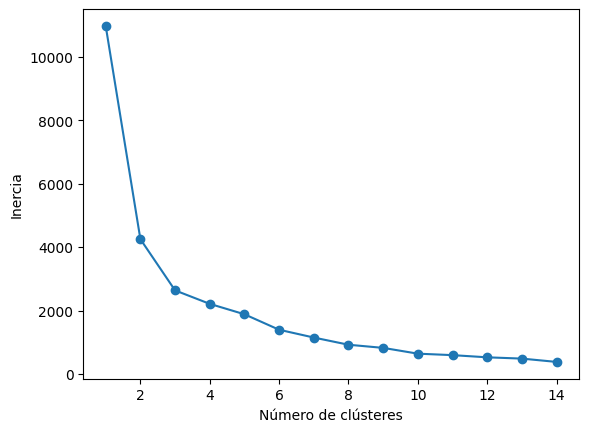

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(dzpv)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

second_derivative = np.diff(inertia, 2)
optimal_k = np.argmax(second_derivative) + 2

In [ ]:
print(optimal_k)

2


In [ ]:
dzpv2 = dzpv.copy()
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, n_init='auto')
dzpv2['cluster'] = kmeans.fit_predict(dzpv2)

In [ ]:
dzpv3 = dzpv.copy()
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init='auto')
dzpv3['cluster'] = kmeans.fit_predict(dzpv3)

In [ ]:
dzpv4 = dzpv.copy()
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init='auto')
dzpv4['cluster'] = kmeans.fit_predict(dzpv4)

In [ ]:
dzpv2['LineadeNegocio'] = dzpv2['LineadeNegocio'].replace(linea_negocio_map_invertido)
dzpv2['Rol'] = dzpv2['Rol'].replace(rol_map_invertido)

dzpv3['LineadeNegocio'] = dzpv3['LineadeNegocio'].replace(linea_negocio_map_invertido)
dzpv3['Rol'] = dzpv3['Rol'].replace(rol_map_invertido)

dzpv4['LineadeNegocio'] = dzpv4['LineadeNegocio'].replace(linea_negocio_map_invertido)
dzpv4['Rol'] = dzpv4['Rol'].replace(rol_map_invertido)

##Trabajo con el Cluster 2

In [ ]:
dzpv2['LineadeNegocio'] = dzpv2['LineadeNegocio'].replace(linea_negocio_map)
dzpv2['Rol'] = dzpv2['Rol'].replace(rol_map)

<ipython-input-727-6a61f8a10f12>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv2['LineadeNegocio'] = dzpv2['LineadeNegocio'].replace(linea_negocio_map)
<ipython-input-727-6a61f8a10f12>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv2['Rol'] = dzpv2['Rol'].replace(rol_map)


In [ ]:
from sklearn.metrics import silhouette_score

# Separar las características (excluyendo la columna 'cluster')
X = dzpv2.drop(columns=['cluster'])

# Obtener las etiquetas de los clusters
labels = dzpv2['cluster']

# Calcular el índice de Silhouette
silhouette_avg = silhouette_score(X, labels)

print(f"Índice de Silhouette promedio: {silhouette_avg}")

Índice de Silhouette promedio: 0.6468855627525086


<ipython-input-728-9c33244d0d2d>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = dzpv2.drop(columns=['cluster'])


In [ ]:
#Separar los clusters
dzpv2_0 = dzpv2[dzpv2['cluster'] == 0]
dzpv2_1 = dzpv2[dzpv2['cluster'] == 1]

In [ ]:
cant_tipos_0 = str(dzpv2_0.tipo.unique())
cant_tipos_1 = str(dzpv2_1.tipo.unique())
print(f'Tipos de proyectos dentro del cluster 0: {cant_tipos_0} \n \n Tipos de proyectos dentro del cluster 1: {cant_tipos_1}')

Tipos de proyectos dentro del cluster 0: [ 3  8 13 10  2  1] 
 
 Tipos de proyectos dentro del cluster 1: [ 3  8  2 17 13 10 12 21 11  1]


In [ ]:
# Convertir las cadenas a listas de enteros
lista_0 = list(dzpv2_0.tipo.unique())
lista_1 = list(dzpv2_1.tipo.unique())

# Unir todas las listas para contar las ocurrencias
todas_las_listas = lista_0 + lista_1

# Contar la frecuencia de cada valor en las listas
from collections import Counter
frecuencias = Counter(todas_las_listas)

# Mostrar qué valores aparecen solo en una lista (frecuencia == 2)
en_dos_lista = [valor for valor, freq in frecuencias.items() if freq == 2]
print(f"Valores que aparecen en dos listas: {en_dos_lista}")

# Mostrar qué valores aparecen solo en una lista (frecuencia == 1)
en_una_lista = [valor for valor, freq in frecuencias.items() if freq == 1]
print(f"Valores que aparecen en una sola lista: {en_una_lista}")

Valores que aparecen en dos listas: [3, 8, 13, 10, 2, 1]
Valores que aparecen en una sola lista: [17, 12, 21, 11]


In [ ]:
dzpv2

LineadeNegocio tipo Rol fase     hh                   cluster
                                   max       mean    min        
0               2    3   1    2  55.50  17.894737   2.50       0
1               2    3   1    0  26.00  16.281250   3.00       0
2               2    3   1    1  66.00  22.320312   2.50       0
3               2    3   2    2   5.50   4.833333   4.00       1
4               2    3   2    1   2.50   2.500000   2.50       1
5               2    8   1    2  75.00  39.250000   3.50       0
6               2    8   1    0   7.00   7.000000   7.00       1
7               2    8   1    1  10.50  10.500000  10.50       1
8               2    8   2    2   1.75   1.750000   1.75       1
9               2    8   2    0   5.00   5.000000   5.00       1
10              2    8   2    1   1.25   1.250000   1.25       1
11              3    2   1    2   4.00   4.000000   4.00       1
12              3    2   1    1   7.25   7.250000   7.25       1
13              7   17   1    2   9.00   7.500000   6.00       1
14              7   17   1    1  12.00  12.000000  12.00       1
15              7   13   1    2  43.00  13.090909   2.00       0
16              7   13   1    0  23.00  13.200000   5.00       1
17              7   13   1    1  37.00  19.025000   2.00       0
18              7   13   2    2   2.00   1.800000   1.50       1
19              7   13   2    0   2.00   1.875000   1.50       1
20              7   13   2    1  24.50   4.619048   1.50       1
21              1   10   1    2  36.00  18.500000   1.00       0
22              1   10   1    0   3.25   3.250000   3.25       1
23              1   10   1    1  17.00   7.500000   1.00       1
24              1   10   2    2   4.00   4.000000   4.00       1
25              1   10   2    1   9.00   4.583333   1.00       1
26              1   12   1    2   2.50   2.250000   2.00       1
27              1   12   1    0   2.00   1.750000   1.50       1
28              1   12   1    1   4.00   3.166667   2.00       1
29              1   12   2    2   2.00   1.666667   1.50       1
30              1   12   2    0   1.75   1.750000   1.75       1
31              1   12   2    1   2.00   1.750000   1.50       1
32              1   21   1    2   2.00   2.000000   2.00       1
33              1    2   1    2  14.00   8.100000   3.00       1
34              1    2   1    0   5.00   3.500000   2.00       1
35              1    2   1    1  33.00   9.031250   2.00       0
36              1   11   1    2   3.50   2.500000   1.50       1
37              1   11   1    0   3.00   3.000000   3.00       1
38              1   11   1    1  12.00   8.750000   5.50       1
39              1   11   2    2   3.25   2.875000   2.50       1
40              1   11   2    0   2.75   2.125000   1.50       1
41              1   11   2    1   7.00   7.000000   7.00       1
42              1    1   1    2  72.00  14.700000   3.50       0
43              1    1   1    0  13.50   6.159091   3.25       1
44              1    1   1    1  19.50   6.677083   3.25       1
45              1    1   2    2  31.00  17.916667   8.00       0
46              1    1   2    0   5.00   4.125000   3.25       1
47              1    1   2    1  11.00   7.166667   4.00       1

In [ ]:
#Promedio de mínimos
# Agrupar por la columna cluster y calcular los valores min, max, mean de la columna 'hh'
promedios_hh = dzpv2.groupby('cluster')['hh'].agg(['mean'])

promedios_hh = promedios_hh.rename(columns={
    'min': 'Promedio Mínimo',
    'max': 'Promedio Máximo',
    'mean': 'Promedio Promedio'
})
print(promedios_hh)

                       hh                                    
          Promedio Máximo Promedio Promedio   Promedio Mínimo
        Promedio Promedio Promedio Promedio Promedio Promedio
cluster                                                      
0               47.450000         18.801013          3.000000
1                7.006579          4.755839          3.473684


In [ ]:
promedios_hh = dzpv2.groupby(['cluster', 'fase'])['hh'].agg(['mean']).reset_index()
promedios_hh = promedios_hh.rename(columns={
    'min': 'Promedio Mínimo',
    'max': 'Promedio Máximo',
    'mean': 'Promedio Promedio'
})

print(promedios_hh)

  cluster fase                hh                                    
                 Promedio Máximo Promedio Promedio   Promedio Mínimo
               Promedio Promedio Promedio Promedio Promedio Promedio
0       0    0         26.000000         16.281250          3.000000
1       0    1         45.333333         16.792188          2.166667
2       0    2         52.083333         20.225385          3.416667
3       1    0          6.104167          4.394508          3.166667
4       1    1          9.964286          6.050914          4.303571
5       1    2          4.458333          3.606250          2.812500


##Verificar los proyectos por cluster

In [ ]:
dzpv2.head()

project_id LineadeNegocio tipo Rol   hh                cluster
                                      max      mean  min        
0          2              1    1   1  6.0  1.966667  0.5       1
1          2              1    1   2  7.0  2.272727  0.5       1
3          4              1    2   1  2.5  0.909091  0.5       1
4          5              1    1   1  4.0  1.772727  0.5       1
5          5              1    1   2  6.0  1.850000  0.5       1

In [ ]:
dzpv2.Rol.unique()

array([1, 2])

In [ ]:
dzpv2.shape

(299, 8)

In [ ]:
dzpv2['LineadeNegocio'] = dzpv2['LineadeNegocio'].replace(linea_negocio_map_invertido)
dzpv2['Rol'] = dzpv2['Rol'].replace(rol_map_invertido)

In [ ]:
dzpv2 = dzpv2[dzpv2['Rol'].isin(['Ingeniero de Proyecto', 'Jefe de Proyectos'])]

In [ ]:
dzpv2.shape

(299, 8)

In [ ]:
dzpv2.head()

project_id LineadeNegocio tipo                    Rol   hh                 \
                                                         max      mean  min   
0          2            SGE    1  Ingeniero de Proyecto  6.0  1.966667  0.5   
1          2            SGE    1      Jefe de Proyectos  7.0  2.272727  0.5   
3          4            SGE    2  Ingeniero de Proyecto  2.5  0.909091  0.5   
4          5            SGE    1  Ingeniero de Proyecto  4.0  1.772727  0.5   
5          5            SGE    1      Jefe de Proyectos  6.0  1.850000  0.5   

  cluster  
           
0       1  
1       1  
3       1  
4       1  
5       1

In [ ]:
replace_dict = {1: 'Sistema de gestión', 2: 'Reportabilidad y Plataforma',
                3: 'Auditoría Energética', 4: 'Estrategia y mercado energético',
                5: 'CM', 6: 'Gestor energético', 7: 'Consultoría',
                8: 'Focalizado', 9: 'Electromovilidad', 10: 'Auditoría Interna',
                11: 'Sello EE', 12: 'Capacitación', 13: 'Detalle',
                14: 'Gestión de Demanda', 15: 'Acompañamiento',
                16: 'Medición de variables energéticas', 17: 'Básica',
                18: 'Huella', 19: 'BNE', 20: 'ITO', 21: 'Discrepancia',
                22: 'fi', 23: 'SGE'}

dzpv2.loc[:, 'tipo'] = dzpv2['tipo'].replace(replace_dict)

In [ ]:
dzpv2.head()

project_id LineadeNegocio                         tipo  \
                                                           
0          2            SGE           Sistema de gestión   
1          2            SGE           Sistema de gestión   
3          4            SGE  Reportabilidad y Plataforma   
4          5            SGE           Sistema de gestión   
5          5            SGE           Sistema de gestión   

                     Rol   hh                cluster  
                          max      mean  min          
0  Ingeniero de Proyecto  6.0  1.966667  0.5       1  
1      Jefe de Proyectos  7.0  2.272727  0.5       1  
3  Ingeniero de Proyecto  2.5  0.909091  0.5       1  
4  Ingeniero de Proyecto  4.0  1.772727  0.5       1  
5      Jefe de Proyectos  6.0  1.850000  0.5       1

In [ ]:
dzpv2.shape

(299, 8)

In [ ]:
grouped = dzpv2.groupby(['tipo', 'Rol', 'cluster']).size().reset_index(name='counts')

In [ ]:
grouped.head(30)

,tipo,Rol,cluster,counts
0,Acompañamiento,Ingeniero de Proyecto,0,7
1,Acompañamiento,Jefe de Proyectos,0,5
2,Auditoría Energética,Ingeniero de Proyecto,0,9
3,Auditoría Energética,Ingeniero de Proyecto,1,4
4,Auditoría Energética,Jefe de Proyectos,0,7
5,Auditoría Energética,Jefe de Proyectos,1,2
6,Auditoría Interna,Ingeniero de Proyecto,0,9
7,Auditoría Interna,Ingeniero de Proyecto,1,3
8,Auditoría Interna,Jefe de Proyectos,0,8
9,Auditoría Interna,Jefe de Proyectos,1,3


In [ ]:
dzpv2.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in dzpv2.columns]

In [ ]:
dzpv2.rename(columns={
    'tipo_': 'tipo',
    'Rol_': 'Rol',
    'cluster_': 'cluster'
}, inplace=True)

In [ ]:
dzpv2

,project_id_,LineadeNegocio_,tipo,Rol,hh_max,hh_mean,hh_min,cluster
0,2,SGE,Sistema de gestión,Ingeniero de Proyecto,6.000000,1.966667,0.500000,1
1,2,SGE,Sistema de gestión,Jefe de Proyectos,7.000000,2.272727,0.500000,1
3,4,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,2.500000,0.909091,0.500000,1
4,5,SGE,Sistema de gestión,Ingeniero de Proyecto,4.000000,1.772727,0.500000,1
5,5,SGE,Sistema de gestión,Jefe de Proyectos,6.000000,1.850000,0.500000,1
...,...,...,...,...,...,...,...,...
355,586,CONS,Reportabilidad y Plataforma,Jefe de Proyectos,0.750000,0.500000,0.250000,0
356,587,SGE,Sistema de gestión,Ingeniero de Proyecto,5.000000,1.287037,0.000000,0
357,587,SGE,Sistema de gestión,Jefe de Proyectos,5.000000,1.175926,0.250000,0
358,590,SGE,SGE,Jefe de Proyectos,1.500000,0.750000,0.000000,0


In [ ]:
df_merged = dzpv2.merge(grouped, on=['tipo', 'Rol', 'cluster'], how='left')

In [ ]:
df_merged_sorted = df_merged.sort_values(by='tipo')

In [ ]:
df_merged_sorted.head(20)

,project_id_,LineadeNegocio_,tipo,Rol,hh_max,hh_mean,hh_min,cluster,counts
298,593,SGE,Acompañamiento,Ingeniero de Proyecto,0.166667,0.166667,0.166667,0,7
146,435,SGIIE,Acompañamiento,Ingeniero de Proyecto,5.250000,1.132222,0.000000,0,7
108,400,SGE,Acompañamiento,Ingeniero de Proyecto,6.000000,1.363426,0.000000,0,7
164,452,SGIIE,Acompañamiento,Ingeniero de Proyecto,8.000000,1.472880,0.000000,0,7
165,452,SGIIE,Acompañamiento,Jefe de Proyectos,4.000000,1.128205,0.000000,0,5
258,556,SGE,Acompañamiento,Jefe de Proyectos,2.000000,1.000000,0.500000,0,5
257,556,SGE,Acompañamiento,Ingeniero de Proyecto,7.000000,1.588983,0.000000,0,7
92,377,SGE,Acompañamiento,Ingeniero de Proyecto,5.500000,0.960734,0.000000,0,7
93,377,SGE,Acompañamiento,Jefe de Proyectos,2.000000,0.581989,0.000000,0,5
147,435,SGIIE,Acompañamiento,Jefe de Proyectos,4.500000,1.067493,0.000000,0,5


In [ ]:
def filter_large_difference(df_group):
    # Si hay más de una fila, es decir, varios clusters para el mismo tipo y Rol
    if len(df_group) > 1:
        # Obtener la diferencia máxima entre los clusters
        df_group = df_group.sort_values(by='counts', ascending=False)
        diff = df_group['counts'].iloc[0] - df_group['counts'].iloc[1]

        # Si la diferencia es mayor a 1, mantenemos solo el valor más alto
        if diff > 2:
            return df_group.iloc[[0]]  # Mantener solo el valor mayor
        # Si la diferencia es 1 o los valores son iguales, mantenemos ambos
        else:
            return df_group
    else:
        return df_group  # Si solo hay un cluster, mantenerlo

filtered_df = grouped.groupby(['tipo', 'Rol'], group_keys=False).apply(filter_large_difference)

In [ ]:
filtered_df.head(20)

,tipo,Rol,cluster,counts
0,Acompañamiento,Ingeniero de Proyecto,0,7
1,Acompañamiento,Jefe de Proyectos,0,5
2,Auditoría Energética,Ingeniero de Proyecto,0,9
4,Auditoría Energética,Jefe de Proyectos,0,7
6,Auditoría Interna,Ingeniero de Proyecto,0,9
8,Auditoría Interna,Jefe de Proyectos,0,8
10,BNE,Ingeniero de Proyecto,0,1
11,Básica,Ingeniero de Proyecto,0,2
12,Básica,Jefe de Proyectos,0,1
13,CM,Ingeniero de Proyecto,0,4


In [ ]:
def filter_large_difference(df_group):
    # Si hay más de una fila (varios clusters para el mismo tipo y Rol)
    if len(df_group) > 1:
        # Ordenar las filas por 'counts' (mayor a menor)
        df_group = df_group.sort_values(by='counts', ascending=False)
        diff = df_group['counts'].iloc[0] - df_group['counts'].iloc[1]

        # Si la diferencia es mayor a 1, mantener solo el valor mayor
        if diff > 1:
            return df_group.iloc[[0]]  # Mantener solo el valor mayor
        # Si la diferencia es menor a 2, calcular el promedio
        else:
            avg_count = df_group['counts'].mean()  # Calcular el promedio
            df_group.loc[df_group.index[0], 'counts'] = avg_count  # Aplicar el promedio al cluster 0
            return df_group.iloc[[0]]  # Mantener solo el cluster 0 con el promedio
    else:
        return df_group  # Si solo hay un cluster, mantenerlo

In [ ]:
grouped['counts'] = grouped['counts'].astype(float)

In [ ]:
filtered_df = grouped.groupby(['tipo', 'Rol'], group_keys=False).apply(filter_large_difference)

In [ ]:
filtered_df.head(20)

,,tipo,Rol,cluster,counts
tipo,Rol,,,,


In [ ]:
grouped2 = dzpv2.groupby(['LineadeNegocio', 'Rol', 'cluster']).size().reset_index(name='counts')

In [ ]:
grouped2.head(20)

,LineadeNegocio,Rol,cluster,counts


In [ ]:
def filter_large_difference(df_group):
    # Si hay más de una fila, es decir, varios clusters para el mismo tipo y Rol
    if len(df_group) > 1:
        # Obtener la diferencia máxima entre los clusters
        df_group = df_group.sort_values(by='counts', ascending=False)
        diff = df_group['counts'].iloc[0] - df_group['counts'].iloc[1]

        # Si la diferencia es mayor a 1, mantenemos solo el valor más alto
        if diff > 2:
            return df_group.iloc[[0]]  # Mantener solo el valor mayor
        # Si la diferencia es 1 o los valores son iguales, mantenemos ambos
        else:
            return df_group
    else:
        return df_group  # Si solo hay un cluster, mantenerlo

filtered_df_2 = grouped2.groupby(['LineadeNegocio', 'Rol'], group_keys=False).apply(filter_large_difference)

In [ ]:
filtered_df_2.head()

,,LineadeNegocio,Rol,cluster,counts
LineadeNegocio,Rol,,,,


##Análisis de los clusters:

In [ ]:
#Promedio de mínimos
# Agrupar por la columna cluster y calcular los valores min, max, mean de la columna 'hh'
promedios_hh = dzpv2.groupby('cluster')['hh'].agg(['mean'])

promedios_hh = promedios_hh.rename(columns={
    'min': 'Promedio Mínimo',
    'max': 'Promedio Máximo',
    'mean': 'Promedio Promedio'
})
print(promedios_hh)

Empty DataFrame
Columns: [(hh, Promedio Máximo, Promedio Promedio), (hh, Promedio Promedio, Promedio Promedio), (hh, Promedio Mínimo, Promedio Promedio)]
Index: []


In [ ]:
#Promedio de mínimos
# Agrupar por la columna cluster y calcular los valores min, max, mean de la columna 'hh'
promedios_hh = dzpv3.groupby('cluster')['hh'].agg(['mean'])

promedios_hh = promedios_hh.rename(columns={
    'min': 'Promedio Mínimo',
    'max': 'Promedio Máximo',
    'mean': 'Promedio Promedio'
})
print(promedios_hh)

                       hh                                    
          Promedio Máximo Promedio Promedio   Promedio Mínimo
        Promedio Promedio Promedio Promedio Promedio Promedio
cluster                                                      
0                5.883721          2.177941          0.697674
1                6.645503          2.142215          0.839947
2                3.953829          1.431596          0.398086


In [ ]:
#Promedio de mínimos
# Agrupar por la columna cluster y calcular los valores min, max, mean de la columna 'hh'
promedios_hh = dzpv4.groupby('cluster')['hh'].agg(['mean'])

promedios_hh = promedios_hh.rename(columns={
    'min': 'Promedio Mínimo',
    'max': 'Promedio Máximo',
    'mean': 'Promedio Promedio'
})
print(promedios_hh)

                       hh                                    
          Promedio Máximo Promedio Promedio   Promedio Mínimo
        Promedio Promedio Promedio Promedio Promedio Promedio
cluster                                                      
0                6.177885          2.853770          1.724359
1                6.154762          1.638050          0.267196
2                6.118852          2.385162          0.827869
3                3.789256          1.395148          0.420799


In [ ]:

texto_tabla_2 = """
                       hh por Cluster utilizando 2 clusters
          Promedio Máximo Promedio Promedio   Promedio Mínimo
              Promedio       Promedio            Promedio
cluster
0                4.995951          1.519058          0.342443
1                6.146018          2.600805          1.240413
"""

texto_tabla_3 = """
                       hh por Cluster utilizando 3 clusters
          Promedio Máximo Promedio Promedio   Promedio Mínimo
                Promedio       Promedio           Promedio
cluster
0                3.953829          1.431596          0.398086
1                5.883721          2.177941          0.697674
2                6.645503          2.142215          0.839947
"""


texto_tabla_4 = """
                       hh
          Promedio Máximo Promedio Promedio   Promedio Mínimo
                Promedio       Promedio          Promedio
cluster
0                6.177885          2.853770          1.724359
1                3.789256          1.395148          0.420799
2                6.118852          2.385162          0.827869
3                6.154762          1.638050          0.267196
"""

# Para mostrar el texto con formato en Google Colab
print(f'{texto_tabla_2} \n\n\n {texto_tabla_3}\n \n \n {texto_tabla_4}')


                       hh por Cluster utilizando 2 clusters
          Promedio Máximo Promedio Promedio   Promedio Mínimo
              Promedio       Promedio            Promedio
cluster
0                4.995951          1.519058          0.342443
1                6.146018          2.600805          1.240413
 


 
                       hh por Cluster utilizando 3 clusters
          Promedio Máximo Promedio Promedio   Promedio Mínimo
                Promedio       Promedio           Promedio
cluster
0                3.953829          1.431596          0.398086
1                5.883721          2.177941          0.697674
2                6.645503          2.142215          0.839947

 
 
 
                       hh
          Promedio Máximo Promedio Promedio   Promedio Mínimo
                Promedio       Promedio          Promedio
cluster
0                6.177885          2.853770          1.724359
1                3.789256          1.395148          0.420799
2                6.11

**RESULTADO:**
(Se considera que el orden es de 2 clusters, 3 clusters, 4 clusters)
Se ha logrado ver que el índice de Silhouette en los distintos proyectos es:


*   0.6849090495028552
*   0.5482894881611478
*   0.5572089289255412

POr lo que podemos entender que con 2 clusters tiene el mayor índice.
Además de esto, se ha logrado observar que en todos los conjuntos se repiten ciertos tipos de proyectos en otros. Se presentan a continuación
*       Cluster 2
     *     Tipos de proyectos dentro del cluster 0: [1, 13, 3, 14, 9, 15, 10  2, 8, 7, 16, 17, 18, 5, 19, 20, 4, 12, 11, 21, 22, 23]
     *     Tipos de proyectos dentro del cluster 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

*       Cluster 3
     *     Tipos de proyectos dentro del cluster 0: [3, 2, 12, 10, 4, 13, 1, 11, 21, 5, 14, 22, 18, 15, 17, 23]
     *      Tipos de proyectos dentro del cluster 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
     *      Tipos de proyectos dentro del cluster 2: [1, 8, 10, 9, 3, 12, 2, 13, 14, 15, 7, 16, 17, 18, 5, 19, 20, 4]

*       Cluster 4
     *     Tipos de proyectos dentro del cluster 0: [3, 8, 9, 4, 1, 5, 10, 2, 11, 12]

     *     Tipos de proyectos dentro del cluster 1: [1, 3, 12, 21, 2, 4, 5, 14, 13, 22, 18, 10, 15, 17, 23]

     *     Tipos de proyectos dentro del cluster 2: [1, 2, 3, 4, 5, 6, 7]

     *     Tipos de proyectos dentro del cluster 3: [1, 13, 3, 14, 9, 15, 10,  2, 8, 7, 16, 17, 18, 5, 19, 20, 4, 12, 11]



Comportamiento de Horas:
Podemos observar que las horas van cambiando dependiendo de la cantidad de clusters. Esto se puede ver más arriba. Podemos ver que la cantidad de horas va avanzando en menores cantidades dependiendo de la cantidad de clusters. Mientras más clusters, avanza o es separado en intervalos menores






#Crear Validación de semanas vacias

In [ ]:
df_semanas_vacias = dz2.copy()
df_semanas_vacias.head()

,Proyecto,LineadeNegocio,tipo,Rol,hh,week_rel,max_week,fase
1,PRY2021-076,AE,Focalizado,Jefe de Proyectos,5.00,1,7,Inicial
2,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1.25,5,7,Intermedia
3,PRY2021-076,AE,Focalizado,Jefe de Proyectos,1.75,6,7,Final
0,PRY2021-076,AE,Focalizado,Ingeniero de Proyecto,75.00,7,7,Final
4,PRY2021-092,SGE,Reportabilidad y Plataforma,Ingeniero de Proyecto,33.00,2,3,Intermedia


In [ ]:
# Calcular las semanas vacías por proyecto
semanas_vacias = []

for proyecto, grupo in df_semanas_vacias.groupby("Proyecto"):
    semanas_existentes = set(grupo["week_rel"])
    semanas_totales = set(range(1, grupo["max_week"].iloc[0] + 1))
    semanas_faltantes = semanas_totales - semanas_existentes

    # Agregar información del proyecto al resultado
    semanas_vacias.append({
        "Proyecto": proyecto,
        "tipo": grupo["tipo"].iloc[0],  # Tomamos el primer tipo (se asume que es único por proyecto)
        "max_week": grupo["max_week"].iloc[0],  # Tomamos el máximo de semanas del grupo
        "Semanas_vacias": len(semanas_faltantes)
    })

# Crear el DataFrame de semanas vacías
Semanas_vacias = pd.DataFrame(semanas_vacias)
Semanas_vacias.head()

,Proyecto,tipo,max_week,Semanas_vacias
0,PRY2021-076,Focalizado,7,3
1,PRY2021-092,Reportabilidad y Plataforma,3,1
2,PRY2022-019,Auditoría Interna,3,1
3,PRY2022-028,Sello EE,6,4
4,PRY2022-057,Auditoría Energética,30,3


In [ ]:
semanas_vacias_check = Semanas_vacias[
    (Semanas_vacias['tipo'] == 'Sistema de gestión')
]
semanas_vacias_check.head(20)

,Proyecto,tipo,max_week,Semanas_vacias
12,PRY2022-162,Sistema de gestión,37,5
15,PRY2022-198,Sistema de gestión,38,3
17,PRY2023-023,Sistema de gestión,51,15
19,PRY2023-034,Sistema de gestión,36,6
24,PRY2023-068,Sistema de gestión,43,16
25,PRY2023-087,Sistema de gestión,47,29


In [ ]:
df_promedios = (
    Semanas_vacias
    .groupby("tipo", as_index=False)
    .agg({
        "Semanas_vacias": lambda x: round(x.mean()),  # Promedio redondeado para Semanas_vacias
        "max_week": lambda x: round(x.mean())         # Promedio redondeado para max_week
    })
)
df_promedios["Probabilidad"] = round((df_promedios["Semanas_vacias"] / df_promedios["max_week"]) * 100)
df_promedios.head(30)

,tipo,Semanas_vacias,max_week,Probabilidad
0,Auditoría Energética,6,26,23.0
1,Auditoría Interna,3,6,50.0
2,Básica,0,2,0.0
3,Capacitación,4,9,44.0
4,Detalle,2,14,14.0
5,Discrepancia,0,1,0.0
6,Focalizado,2,6,33.0
7,Reportabilidad y Plataforma,0,3,0.0
8,Sello EE,2,4,50.0
9,Sistema de gestión,12,42,29.0


In [ ]:
from google.colab import files
df_promedios = df_promedios.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)
df_promedios.to_csv('semanas_vacias.csv', index=False, encoding='utf-8', sep=';')
files.download('semanas_vacias.csv')

<ipython-input-372-1beab13b4cc2>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_promedios = df_promedios.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#NO UTILIZADO

##Trabajo con el Cluster 3

In [ ]:
dzpv3['LineadeNegocio'] = dzpv3['LineadeNegocio'].replace(linea_negocio_map)
dzpv3['Rol'] = dzpv3['Rol'].replace(rol_map)

<ipython-input-735-1aad5635aee0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv3['LineadeNegocio'] = dzpv3['LineadeNegocio'].replace(linea_negocio_map)
<ipython-input-735-1aad5635aee0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv3['Rol'] = dzpv3['Rol'].replace(rol_map)


In [ ]:
from sklearn.metrics import silhouette_score

# Separar las características (excluyendo la columna 'cluster')
X = dzpv3.drop(columns=['cluster'])

# Obtener las etiquetas de los clusters
labels = dzpv3['cluster']

# Calcular el índice de Silhouette
silhouette_avg = silhouette_score(X, labels)

print(f"Índice de Silhouette promedio: {silhouette_avg}")

Índice de Silhouette promedio: 0.5700680626885588


<ipython-input-736-9e952833d486>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = dzpv3.drop(columns=['cluster'])


In [ ]:
#Separar los Clusters
dzpv3_0 = dzpv3[dzpv3['cluster'] == 0]
dzpv3_1 = dzpv3[dzpv3['cluster'] == 1]
dzpv3_2 = dzpv3[dzpv3['cluster'] == 2]

In [ ]:
cant_tipos_0 = str(dzpv3_0.tipo.unique())
cant_tipos_1 = str(dzpv3_1.tipo.unique())
cant_tipos_2 = str(dzpv3_2.tipo.unique())
print(f'Tipos de proyectos dentro del cluster 0: {cant_tipos_0} \n \n Tipos de proyectos dentro del cluster 1: {cant_tipos_1} \n \n Tipos de proyectos dentro del cluster 2: {cant_tipos_2}')

Tipos de proyectos dentro del cluster 0: [ 3 13 10  2  1] 
 
 Tipos de proyectos dentro del cluster 1: [3 8 1] 
 
 Tipos de proyectos dentro del cluster 2: [ 3  8  2 17 13 10 12 21 11  1]


In [ ]:
# Convertir las cadenas a listas de enteros
lista_0 = list(dzpv3_0.tipo.unique())
lista_1 = list(dzpv3_1.tipo.unique())
lista_2 = list(dzpv3_2.tipo.unique())

# Unir todas las listas para contar las ocurrencias
todas_las_listas = lista_0 + lista_1 + lista_2

# Contar la frecuencia de cada valor en las listas
from collections import Counter
frecuencias = Counter(todas_las_listas)

# Mostrar qué valores aparecen en todas las listas (frecuencia == 3)
en_todas_las_listas = [valor for valor, freq in frecuencias.items() if freq == 3]
print(f"Valores que aparecen en todas las listas: {en_todas_las_listas}")

# Mostrar qué valores aparecen solo en una lista (frecuencia == 2)
en_dos_lista = [valor for valor, freq in frecuencias.items() if freq == 2]
print(f"Valores que aparecen en dos listas: {en_dos_lista}")

# Mostrar qué valores aparecen solo en una lista (frecuencia == 1)
en_una_lista = [valor for valor, freq in frecuencias.items() if freq == 1]
print(f"Valores que aparecen en una sola lista: {en_una_lista}")

Valores que aparecen en todas las listas: [3, 1]
Valores que aparecen en dos listas: [13, 10, 2, 8]
Valores que aparecen en una sola lista: [17, 12, 21, 11]


In [ ]:
#Promedio de mínimos
# Agrupar por la columna cluster y calcular los valores min, max, mean de la columna 'hh'
promedios_hh = dzpv3.groupby('cluster')['hh'].agg(['mean'])

promedios_hh = promedios_hh.rename(columns={
    'min': 'Promedio Mínimo',
    'max': 'Promedio Máximo',
    'mean': 'Promedio Promedio'
})
print(promedios_hh)

                       hh                                    
          Promedio Máximo Promedio Promedio   Promedio Mínimo
        Promedio Promedio Promedio Promedio Promedio Promedio
cluster                                                      
0               30.333333         13.149023          3.083333
1               67.125000         23.541262          3.000000
2                5.692857          4.463593          3.492857


In [ ]:
promedios_hh = dzpv3.groupby(['cluster', 'fase'])['hh'].agg(['mean']).reset_index()
promedios_hh = promedios_hh.rename(columns={
    'min': 'Promedio Mínimo',
    'max': 'Promedio Máximo',
    'mean': 'Promedio Promedio'
})

print(promedios_hh)

  cluster fase                hh                                    
                 Promedio Máximo Promedio Promedio   Promedio Mínimo
               Promedio Promedio Promedio Promedio Promedio Promedio
0       0    0         24.500000         14.740625          4.000000
1       0    1         28.500000          9.838095          2.187500
2       0    2         36.666667         16.502525          3.666667
3       1    1         66.000000         22.320312          2.500000
4       1    2         67.500000         23.948246          3.166667
5       2    0          4.568182          3.594008          3.000000
6       2    1          7.958333          6.118056          4.625000
7       2    2          4.458333          3.606250          2.812500


In [ ]:
dzpv3.head()

LineadeNegocio tipo Rol fase    hh                 cluster
                                 max       mean  min        
0              2    3   1    2  55.5  17.894737  2.5       1
1              2    3   1    0  26.0  16.281250  3.0       0
2              2    3   1    1  66.0  22.320312  2.5       1
3              2    3   2    2   5.5   4.833333  4.0       2
4              2    3   2    1   2.5   2.500000  2.5       2

In [ ]:
dzpv3['LineadeNegocio'] = dzpv3['LineadeNegocio'].replace(linea_negocio_map_invertido)
dzpv3['Rol'] = dzpv3['Rol'].replace(rol_map_invertido)
dzpv4['fase'] = dzpv4['fase'].replace(fase_map_invertido)

In [ ]:
replace_dict = {1: 'Sistema de gestión', 2: 'Reportabilidad y Plataforma',
                3: 'Auditoría Energética', 4: 'Estrategia y mercado energético',
                5: 'CM', 6: 'Gestor energético', 7: 'Consultoría',
                8: 'Focalizado', 9: 'Electromovilidad', 10: 'Auditoría Interna',
                11: 'Sello EE', 12: 'Capacitación', 13: 'Detalle',
                14: 'Gestión de Demanda', 15: 'Acompañamiento',
                16: 'Medición de variables energéticas', 17: 'Básica',
                18: 'Huella', 19: 'BNE', 20: 'ITO', 21: 'Discrepancia',
                22: 'fi', 23: 'SGE'}

dzpv3.loc[:, 'tipo'] = dzpv3['tipo'].replace(replace_dict)

<ipython-input-744-54442bf0e081>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Auditoría Energética' 'Auditoría Energética' 'Auditoría Energética'
 'Auditoría Energética' 'Auditoría Energética' 'Focalizado' 'Focalizado'
 'Focalizado' 'Focalizado' 'Focalizado' 'Focalizado'
 'Reportabilidad y Plataforma' 'Reportabilidad y Plataforma' 'Básica'
 'Básica' 'Detalle' 'Detalle' 'Detalle' 'Detalle' 'Detalle' 'Detalle'
 'Auditoría Interna' 'Auditoría Interna' 'Auditoría Interna'
 'Auditoría Interna' 'Auditoría Interna' 'Capacitación' 'Capacitación'
 'Capacitación' 'Capacitación' 'Capacitación' 'Capacitación'
 'Discrepancia' 'Reportabilidad y Plataforma'
 'Reportabilidad y Plataforma' 'Reportabilidad y Plataforma' 'Sello EE'
 'Sello EE' 'Sello EE' 'Sello EE' 'Sello EE' 'Sello EE'
 'Sistema de gestión' 'Sistema de gestión' 'Sistema de gestión'
 'Sistema de gestión' 'Sistema de gestión' 'Sistema de gestión']' has dtype in

In [ ]:
dzpv3.head()

LineadeNegocio                  tipo                    Rol fase    hh  \
                                                                     max   
0             AE  Auditoría Energética  Ingeniero de Proyecto    2  55.5   
1             AE  Auditoría Energética  Ingeniero de Proyecto    0  26.0   
2             AE  Auditoría Energética  Ingeniero de Proyecto    1  66.0   
3             AE  Auditoría Energética      Jefe de Proyectos    2   5.5   
4             AE  Auditoría Energética      Jefe de Proyectos    1   2.5   

                  cluster  
        mean  min          
0  17.894737  2.5       1  
1  16.281250  3.0       0  
2  22.320312  2.5       1  
3   4.833333  4.0       2  
4   2.500000  2.5       2

In [ ]:
### WARNING ###
#Este no es necesario ejecutarlo DOWNLOAD DF
from google.colab import files

dzpv3.to_csv('DataC3.csv', index=False)
files.download('DataC3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
dzpv3 = dzpv3.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)
dzpv3.to_csv('dzpv3.csv', index=False, encoding='utf-8', sep=';')
files.download('dzpv3.csv')

<ipython-input-191-3166ba1b09fc>:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Trabajo con el Cluster 4

In [ ]:
dzpv4['LineadeNegocio'] = dzpv4['LineadeNegocio'].replace(linea_negocio_map)
dzpv4['Rol'] = dzpv4['Rol'].replace(rol_map)

<ipython-input-305-c97e5efe6378>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv4['LineadeNegocio'] = dzpv4['LineadeNegocio'].replace(linea_negocio_map)
<ipython-input-305-c97e5efe6378>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dzpv4['Rol'] = dzpv4['Rol'].replace(rol_map)


In [ ]:
dzpv4['LineadeNegocio'] = dzpv4['LineadeNegocio'].replace(linea_negocio_map_invertido)
dzpv4['Rol'] = dzpv4['Rol'].replace(rol_map_invertido)
dzpv4['fase'] = dzpv4['fase'].replace(fase_map_invertido)

In [ ]:
# Invertir el diccionario para que las claves sean las frases y los valores sean los números
replace_dict_invertido = {v: k for k, v in replace_dict.items()}

# Aplicar el diccionario invertido al DataFrame
dzpv4['tipo'] = dzpv4['tipo'].replace(replace_dict_invertido)

In [ ]:
replace_dict = {1: 'Sistema de gestión', 2: 'Reportabilidad y Plataforma',
                3: 'Auditoría Energética', 4: 'Estrategia y mercado energético',
                5: 'CM', 6: 'Gestor energético', 7: 'Consultoría',
                8: 'Focalizado', 9: 'Electromovilidad', 10: 'Auditoría Interna',
                11: 'Sello EE', 12: 'Capacitación', 13: 'Detalle',
                14: 'Gestión de Demanda', 15: 'Acompañamiento',
                16: 'Medición de variables energéticas', 17: 'Básica',
                18: 'Huella', 19: 'BNE', 20: 'ITO', 21: 'Discrepancia',
                22: 'fi', 23: 'SGE'}

dzpv4.loc[:, 'tipo'] = dzpv4['tipo'].replace(replace_dict)

<ipython-input-308-4d5738f3eed4>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Auditoría Energética' 'Auditoría Energética' 'Auditoría Energética'
 'Auditoría Energética' 'Auditoría Energética' 'Focalizado' 'Focalizado'
 'Focalizado' 'Focalizado' 'Focalizado' 'Focalizado' 'Básica' 'Básica'
 'Detalle' 'Detalle' 'Detalle' 'Detalle' 'Detalle' 'Detalle'
 'Auditoría Interna' 'Auditoría Interna' 'Auditoría Interna'
 'Auditoría Interna' 'Auditoría Interna' 'Capacitación' 'Capacitación'
 'Capacitación' 'Capacitación' 'Capacitación' 'Capacitación'
 'Discrepancia' 'Reportabilidad y Plataforma'
 'Reportabilidad y Plataforma' 'Reportabilidad y Plataforma' 'Sello EE'
 'Sello EE' 'Sello EE' 'Sello EE' 'Sello EE' 'Sello EE'
 'Sistema de gestión' 'Sistema de gestión' 'Sistema de gestión'
 'Sistema de gestión' 'Sistema de gestión' 'Sistema de gestión']' has dtype incompatible with int64, please explicitly cast to a compatible

In [ ]:
dzpv4 = dzpv4.sort_values(by=['LineadeNegocio', 'tipo'], ascending=[True, True])

In [ ]:
dzpv4.head(60)

LineadeNegocio                         tipo                    Rol  \
                                                                        
0              AE         Auditoría Energética  Ingeniero de Proyecto   
1              AE         Auditoría Energética  Ingeniero de Proyecto   
2              AE         Auditoría Energética  Ingeniero de Proyecto   
3              AE         Auditoría Energética      Jefe de Proyectos   
4              AE         Auditoría Energética      Jefe de Proyectos   
5              AE                   Focalizado  Ingeniero de Proyecto   
6              AE                   Focalizado  Ingeniero de Proyecto   
7              AE                   Focalizado  Ingeniero de Proyecto   
8              AE                   Focalizado      Jefe de Proyectos   
9              AE                   Focalizado      Jefe de Proyectos   
10             AE                   Focalizado      Jefe de Proyectos   
11            ING                       Básica  Ingeniero de Proyecto   
12            ING                       Básica  Ingeniero de Proyecto   
13            ING                      Detalle  Ingeniero de Proyecto   
14            ING                      Detalle  Ingeniero de Proyecto   
15            ING                      Detalle  Ingeniero de Proyecto   
16            ING                      Detalle      Jefe de Proyectos   
17            ING                      Detalle      Jefe de Proyectos   
18            ING                      Detalle      Jefe de Proyectos   
19            SGE            Auditoría Interna  Ingeniero de Proyecto   
20            SGE            Auditoría Interna  Ingeniero de Proyecto   
21            SGE            Auditoría Interna  Ingeniero de Proyecto   
22            SGE            Auditoría Interna      Jefe de Proyectos   
23            SGE            Auditoría Interna      Jefe de Proyectos   
24            SGE                 Capacitación  Ingeniero de Proyecto   
25            SGE                 Capacitación  Ingeniero de Proyecto   
26            SGE                 Capacitación  Ingeniero de Proyecto   
27            SGE                 Capacitación      Jefe de Proyectos   
28            SGE                 Capacitación      Jefe de Proyectos   
29            SGE                 Capacitación      Jefe de Proyectos   
30            SGE                 Discrepancia  Ingeniero de Proyecto   
31            SGE  Reportabilidad y Plataforma  Ingeniero de Proyecto   
32            SGE  Reportabilidad y Plataforma  Ingeniero de Proyecto   
33            SGE  Reportabilidad y Plataforma  Ingeniero de Proyecto   
34            SGE                     Sello EE  Ingeniero de Proyecto   
35            SGE                     Sello EE  Ingeniero de Proyecto   
36            SGE                     Sello EE  Ingeniero de Proyecto   
37            SGE                     Sello EE      Jefe de Proyectos   
38            SGE                     Sello EE      Jefe de Proyectos   
39            SGE                     Sello EE      Jefe de Proyectos   
40            SGE           Sistema de gestión  Ingeniero de Proyecto   
41            SGE           Sistema de gestión  Ingeniero de Proyecto   
42            SGE           Sistema de gestión  Ingeniero de Proyecto   
43            SGE           Sistema de gestión      Jefe de Proyectos   
44            SGE           Sistema de gestión      Jefe de Proyectos   
45            SGE           Sistema de gestión      Jefe de Proyectos   

          fase     hh                   cluster  
                  max       mean    min          
0        Final  55.50  17.894737   2.50       2  
1      Inicial  26.00  16.281250   3.00       0  
2   Intermedia  52.00  19.508333   2.50       2  
3        Final   5.50   4.833333   4.00       3  
4   Intermedia   2.50   2.500000   2.50       1  
5        Final   3.50   3.500000   3.50       1  
6      Inicial   7.00   7.000000   7.00       1  
7   Intermedia  10.50  10.500000  10.50       3 

In [ ]:
from sklearn.metrics import silhouette_score

# Separar las características (excluyendo la columna 'cluster')
X = dzpv4.drop(columns=['cluster'])

# Obtener las etiquetas de los clusters
labels = dzpv4['cluster']

# Calcular el índice de Silhouette
silhouette_avg = silhouette_score(X, labels)

print(f"Índice de Silhouette promedio: {silhouette_avg}")

<ipython-input-321-0731d842d316>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = dzpv4.drop(columns=['cluster'])


ValueError: could not convert string to float: 'AE'

In [ ]:
#Separar los clusters
dzpv4_0 = dzpv4[dzpv4['cluster'] == 0]
dzpv4_1 = dzpv4[dzpv4['cluster'] == 1]
dzpv4_2 = dzpv4[dzpv4['cluster'] == 2]
dzpv4_3 = dzpv4[dzpv4['cluster'] == 3]

In [ ]:
cant_tipos_0 = str(dzpv4_0.tipo.unique())
cant_tipos_1 = str(dzpv4_1.tipo.unique())
cant_tipos_2 = str(dzpv4_2.tipo.unique())
cant_tipos_3 = str(dzpv4_3.tipo.unique())
print(f'Tipos de proyectos dentro del cluster 0: {cant_tipos_0} \n \n Tipos de proyectos dentro del cluster 1: {cant_tipos_1} \n \n Tipos de proyectos dentro del cluster 2: {cant_tipos_2} \n \n Tipos de proyectos dentro del cluster 3: {cant_tipos_3}')

Tipos de proyectos dentro del cluster 0: [ 8  7  9 14 13 10 11 12] 
 
 Tipos de proyectos dentro del cluster 1: [22 18 16 17 20 15 19 21] 
 
 Tipos de proyectos dentro del cluster 2: [3 4 5 7 2 6] 
 
 Tipos de proyectos dentro del cluster 3: [3 2 4 5 6 1]


In [ ]:
# Convertir las cadenas a listas de enteros
lista_0 = list(dzpv4_0.tipo.unique())
lista_1 = list(dzpv4_1.tipo.unique())
lista_2 = list(dzpv4_2.tipo.unique())
lista_3 = list(dzpv4_3.tipo.unique())

# Unir todas las listas para contar las ocurrencias
todas_las_listas = lista_0 + lista_1 + lista_2 + lista_3

# Contar la frecuencia de cada valor en las listas
from collections import Counter
frecuencias = Counter(todas_las_listas)

# Mostrar qué valores aparecen en todas las listas (frecuencia == 4)
en_todas_las_listas = [valor for valor, freq in frecuencias.items() if freq == 4]
print(f"Valores que aparecen en todas las listas: {en_todas_las_listas}")

# Mostrar qué valores aparecen en todas las listas (frecuencia == 3)
en_todas_las_listas = [valor for valor, freq in frecuencias.items() if freq == 3]
print(f"Valores que aparecen en tres listas: {en_todas_las_listas}")

# Mostrar qué valores aparecen solo en una lista (frecuencia == 2)
en_dos_lista = [valor for valor, freq in frecuencias.items() if freq == 2]
print(f"Valores que aparecen en dos listas: {en_dos_lista}")

# Mostrar qué valores aparecen solo en una lista (frecuencia == 1)
en_una_lista = [valor for valor, freq in frecuencias.items() if freq == 1]
print(f"Valores que aparecen en una sola lista: {en_una_lista}")

Valores que aparecen en todas las listas: []
Valores que aparecen en tres listas: []
Valores que aparecen en dos listas: [7, 3, 4, 5, 2, 6]
Valores que aparecen en una sola lista: [8, 9, 14, 13, 10, 11, 12, 22, 18, 16, 17, 20, 15, 19, 21, 1]


In [ ]:
#Promedio de mínimos
# Agrupar por la columna cluster y calcular los valores min, max, mean de la columna 'hh'
promedios_hh = dzpv4.groupby('cluster')['hh'].agg(['mean'])

promedios_hh = promedios_hh.rename(columns={
    'min': 'Promedio Mínimo',
    'max': 'Promedio Máximo',
    'mean': 'Promedio Promedio'
})
print(promedios_hh)

                       hh                                    
          Promedio Máximo Promedio Promedio   Promedio Mínimo
        Promedio Promedio Promedio Promedio Promedio Promedio
cluster                                                      
0                3.164894          1.322415          0.438298
1                2.939542          1.553959          0.625817
2                7.111111          2.405756          0.271605
3                3.250000          1.175881          0.189785


In [ ]:
promedios_hh = dzpv4.groupby(['cluster', 'fase'])['hh'].agg(['mean']).reset_index()
promedios_hh = promedios_hh.rename(columns={
    'min': 'Promedio Mínimo',
    'max': 'Promedio Máximo',
    'mean': 'Promedio Promedio'
})

print(promedios_hh)

   cluster fase                hh                                    
                  Promedio Máximo Promedio Promedio   Promedio Mínimo
                Promedio Promedio Promedio Promedio Promedio Promedio
0        0    0          3.703125          1.430119          0.395625
1        0    1          2.921875          1.286984          0.506250
2        0    2          2.850000          1.245324          0.411333
3        1    0          2.803922          1.563690          0.642157
4        1    1          3.102941          1.436029          0.338235
5        1    2          2.911765          1.662157          0.897059
6        2    0          7.125000          2.938716          0.458333
7        2    1          7.200000          2.239574          0.208333
8        2    2          7.000000          2.116661          0.175926
9        3    0          3.472222          1.267312          0.164815
10       3    1          3.159091          1.122154          0.157576
11       3    2     

In [ ]:
from google.colab import files
dzpv4.to_csv('Asignaciones - Semanas.csv', index=False)
files.download('Asignaciones - Semanas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
dzpv4 = dzpv4.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)
dzpv4.to_csv('dzpv4.csv', index=False, encoding='utf-8', sep=';')
files.download('dzpv4.csv')

<ipython-input-322-afccbc71a697>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dzpv4 = dzpv4.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dzpv4.head(50)

LineadeNegocio                             tipo                    Rol  \
                                                                            
2              AE             Auditoría Energética  Ingeniero de Proyecto   
3              AE             Auditoría Energética  Ingeniero de Proyecto   
4              AE             Auditoría Energética  Ingeniero de Proyecto   
5              AE             Auditoría Energética      Jefe de Proyectos   
6              AE             Auditoría Energética      Jefe de Proyectos   
7              AE             Auditoría Energética      Jefe de Proyectos   
12             AE                       Focalizado  Ingeniero de Proyecto   
13             AE                       Focalizado  Ingeniero de Proyecto   
14             AE                       Focalizado  Ingeniero de Proyecto   
15             AE                       Focalizado      Jefe de Proyectos   
16             AE                       Focalizado      Jefe de Proyectos   
17             AE                       Focalizado      Jefe de Proyectos   
20             AE                               fi  Ingeniero de Proyecto   
21             AE                               fi  Ingeniero de Proyecto   
22             AE                               fi      Jefe de Proyectos   
23             AE                               fi      Jefe de Proyectos   
24           CONS      Reportabilidad y Plataforma  Ingeniero de Proyecto   
25           CONS      Reportabilidad y Plataforma  Ingeniero de Proyecto   
26           CONS      Reportabilidad y Plataforma  Ingeniero de Proyecto   
27           CONS      Reportabilidad y Plataforma      Jefe de Proyectos   
28           CONS      Reportabilidad y Plataforma      Jefe de Proyectos   
32           CONS  Estrategia y mercado energético  Ingeniero de Proyecto   
33           CONS  Estrategia y mercado energético  Ingeniero de Proyecto   
34           CONS  Estrategia y mercado energético  Ingeniero de Proyecto   
35           CONS  Estrategia y mercado energético      Jefe de Proyectos   
36           CONS  Estrategia y mercado energético      Jefe de Proyectos   
37           CONS  Estrategia y mercado energético      Jefe de Proyectos   
45           CONS                               CM  Ingeniero de Proyecto   
46           CONS                               CM  Ingeniero de Proyecto   
47           CONS                               CM  Ingeniero de Proyecto   
48           CONS                               CM      Jefe de Proyectos   
49           CONS                               CM      Jefe de Proyectos   
50           CONS                               CM      Jefe de Proyectos   
55           CONS                      Consultoría  Ingeniero de Proyecto   
56           CONS                      Consultoría  Ingeniero de Proyecto   
57           CONS                      Consultoría  Ingeniero de Proyecto   
58           CONS                      Consultoría      Jefe de Proyectos   
59           CONS                      Consultoría      Jefe de Proyectos   
60           CONS                      Consultoría      Jefe de Proyectos   
63           CONS                 Electromovilidad  Ingeniero de Proyecto   
64           CONS                 Electromovilidad  Ingeniero de Proyecto   
65           CONS                 Electromovilidad  Ingeniero de Proyecto   
66           CONS                 Electromovilidad      Jefe de Proyectos   
67           CONS                 Electromovilidad      Jefe de Proyectos   
68           CONS                 Electromovilidad      Jefe de Proyectos   
69           CONS                           Huella  Ingeniero de Proyecto   
70           CONS                           Huella  Ingeniero de Proyecto   
71           CONS                           Huella  Ingeniero de Proyecto   
72           CONS                           Huella      Jefe de Proyectos   
73           CONS                           Huella      Jefe de Proyectos   

In [ ]:
dzpv.head()

##Otros

In [ ]:
# Contar el número de ocurrencias del valor 3 en la columna 'cluster'
count_cluster_3 = dzpv[dzpv['cluster'] == 3].shape[0]

# Contar el número de ocurrencias del valor 2 en la columna 'cluster'
count_cluster_2 = dzpv[dzpv['cluster'] == 2].shape[0]

# Contar el número de ocurrencias del valor 1 en la columna 'cluster'
count_cluster_1 = dzpv[dzpv['cluster'] == 1].shape[0]

# Contar el número de ocurrencias del valor 0 en la columna 'cluster'
count_cluster_0 = dzpv[dzpv['cluster'] == 0].shape[0]

print(f"Número de valores en el cluster 3: {count_cluster_3}")
print(f"Número de valores en el cluster 2: {count_cluster_2}")
print(f"Número de valores en el cluster 1: {count_cluster_1}")
print(f"Número de valores en el cluster 0: {count_cluster_0}")

Número de valores en el cluster 3: 52
Número de valores en el cluster 2: 121
Número de valores en el cluster 1: 126
Número de valores en el cluster 0: 61


In [ ]:
dzpv4.cluster.unique()

array([2, 0, 3, 1], dtype=int32)

In [ ]:
dzpv.to_csv('dzpv.csv', index=False)
files.download('dzpv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dk.head() ##Sirve para verificar que se hará luego

project_id Proyecto tipo LineadeNegocio task_id Rol employee_id  \
                                                                    
0          2        1    1              4       0   3          54   
1          2        1    1              4      81   3          21   
2          2        1    1              4      81   3          21   
3          2        1    1              4      81   3          21   
4          2        1    1              4      81   3          21   

  department_id cliente cliente_id  ... CapMonth CreateYear CreateMonth Week  \
                                    ...                                        
0             0       9          9  ...        3       2020           7   13   
1             4       9          9  ...        1       2020           7    2   
2             4       9          9  ...        1       2020           7    3   
3             4       9          9  ...        3       2020           7   10   
4             4       9          9  ...        3       2020           7   13   

  WeekYear week_rel DifProy  hh           
                            max mean min  
0     2021       25     208   4  4.0   4  
1     2021       14     208   2  2.0   2  
2     2021       15     208   2  2.0   2  
3     2021       22     208   1  1.0   1  
4     2021       25     208   3  3.0   3  

[5 rows x 30 columns]

#asdasd

##Testing de Clasificador

In [ ]:
dg.columns

Index(['project_id', 'Proyecto', 'IniProy', 'FinProy', 'date', 'week',
       'Cierre', 'week_rel', 'create_date', 'tipo', 'LineadeNegocio',
       'task_id', 'Rol', 'employee_id', 'department_id', 'cliente',
       'cliente_id', 'EgresosNoHHCLP', 'MontoOfertaCLP', 'C/Agencia',
       'DesfaseInicio(dias)', 'OcupacionAlIniciar(%)', 'hh', 'IniYear',
       'IniMonth', 'IniDay', 'FinYear', 'FinMonth', 'FinDay', 'CapYear',
       'CapMonth', 'CapDay', 'CreateYear', 'CreateMonth', 'CreateDay',
       'WeekYear', 'Week', 'DifProy'],
      dtype='object')

In [ ]:
using2 = ['project_id', 'Proyecto', 'IniProy', 'FinProy', 'week',
       'Cierre', 'week_rel', 'tipo', 'LineadeNegocio', 'Rol', 'employee_id', 'department_id', 'cliente',
       'cliente_id', 'C/Agencia', 'hh']
df_testing_final = dg[using2]
df_testing_final.head()

,project_id,Proyecto,IniProy,FinProy,week,Cierre,week_rel,tipo,LineadeNegocio,Rol,employee_id,department_id,cliente,cliente_id,C/Agencia,hh
8541,2,PRY2018-055,2020-10-08,2021-05-04,2020-47,2020-08-10,6,1,SGE,Jefe de Proyectos,23,4,9,9.0,0,2.0
10746,2,PRY2018-055,2020-10-08,2021-05-04,2021-12,2020-08-10,24,1,SGE,Jefe de Proyectos,23,4,9,9.0,0,4.0
10749,2,PRY2018-055,2020-10-08,2021-05-04,2021-12,2020-08-10,24,1,SGE,Jefe de Proyectos,23,4,9,9.0,0,6.0
10751,2,PRY2018-055,2020-10-08,2021-05-04,2021-11,2020-08-10,23,1,SGE,Jefe de Proyectos,23,4,9,9.0,0,4.0
2740,2,PRY2018-055,2020-10-08,2021-05-04,2021-14,2020-08-10,26,1,SGE,Ingeniero de Proyecto,21,4,9,9.0,0,1.0


In [ ]:
df_testing_grouped = df_testing_final.groupby(['Proyecto', 'week_rel', 'LineadeNegocio', 'tipo', 'Rol'], as_index=False)['hh'].sum()
df_testing_grouped.head()

,Proyecto,week_rel,LineadeNegocio,tipo,Rol,hh
0,PRY2018-013,0,SGE,1,Subgerente de Proyecto,1.0
1,PRY2018-055,0,SGE,1,Ingeniero de Proyecto,2.0
2,PRY2018-055,6,SGE,1,Jefe de Proyectos,2.0
3,PRY2018-055,7,SGE,1,Jefe de Proyectos,1.0
4,PRY2018-055,8,SGE,1,Jefe de Proyectos,2.0


In [ ]:
replace_dict = {1: 'Sistema de gestión', 2: 'Reportabilidad y Plataforma',
                3: 'Auditoría Energética', 4: 'Estrategia y mercado energético',
                5: 'CM', 6: 'Gestor energético', 7: 'Consultoría',
                8: 'Focalizado', 9: 'Electromovilidad', 10: 'Auditoría Interna',
                11: 'Sello EE', 12: 'Capacitación', 13: 'Detalle',
                14: 'Gestión de Demanda', 15: 'Acompañamiento',
                16: 'Medición de variables energéticas', 17: 'Básica',
                18: 'Huella', 19: 'BNE', 20: 'ITO', 21: 'Discrepancia',
                22: 'fi', 23: 'SGE'}

df_testing_grouped.loc[:, 'tipo'] = df_testing_grouped['tipo'].replace(replace_dict)

<ipython-input-129-dab26e366479>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Sistema de gestión' 'Sistema de gestión' 'Sistema de gestión' ...
 'Auditoría Interna' 'Acompañamiento' 'SGE']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_testing_grouped.loc[:, 'tipo'] = df_testing_grouped['tipo'].replace(replace_dict)


In [ ]:
df_testing_grouped.head()

,Proyecto,week_rel,LineadeNegocio,tipo,Rol,hh
0,PRY2018-013,0,SGE,Sistema de gestión,Subgerente de Proyecto,1.0
1,PRY2018-055,0,SGE,Sistema de gestión,Ingeniero de Proyecto,2.0
2,PRY2018-055,6,SGE,Sistema de gestión,Jefe de Proyectos,2.0
3,PRY2018-055,7,SGE,Sistema de gestión,Jefe de Proyectos,1.0
4,PRY2018-055,8,SGE,Sistema de gestión,Jefe de Proyectos,2.0


In [ ]:
roles_interes = ['Ingeniero de Proyecto', 'Jefe de Proyectos']
df_filtrado = df_testing_grouped[df_testing_grouped['Rol'].isin(roles_interes)]
df_filtrado.head()

,Proyecto,week_rel,LineadeNegocio,tipo,Rol,hh
1,PRY2018-055,0,SGE,Sistema de gestión,Ingeniero de Proyecto,2.0
2,PRY2018-055,6,SGE,Sistema de gestión,Jefe de Proyectos,2.0
3,PRY2018-055,7,SGE,Sistema de gestión,Jefe de Proyectos,1.0
4,PRY2018-055,8,SGE,Sistema de gestión,Jefe de Proyectos,2.0
5,PRY2018-055,9,SGE,Sistema de gestión,Jefe de Proyectos,2.0


In [ ]:
df_testeo_hh_outliers = df_filtrado.groupby('tipo')['hh'].agg(['min', 'max', 'mean']).reset_index()
print(df_testeo_hh_outliers)

                                 tipo       min         max       mean
0                      Acompañamiento  0.000000   24.333333   3.989241
1                Auditoría Energética  0.000000   79.833333  12.178547
2                   Auditoría Interna  0.000000   46.916667   7.496000
3                                 BNE  0.500000    4.583333   2.347222
4                              Básica  0.500000   20.500000   4.480769
5                                  CM  0.000000   66.000000  11.072222
6                        Capacitación  0.000000   17.500000   3.516667
7                         Consultoría  0.000000   63.500000  11.957270
8                             Detalle  0.000000   69.500000   9.892857
9                        Discrepancia  0.000000    7.000000   1.812500
10                   Electromovilidad  0.016667   15.750000   3.436961
11    Estrategia y mercado energético  0.000000   75.000000   9.066210
12                         Focalizado  0.500000   75.000000   7.086812
13    

In [ ]:
df_filtrado_no_ceros = df_filtrado.loc[df_filtrado['hh'] != 0]
# Agrupa por 'Rol' y 'tipo' y calcula el mínimo, máximo y promedio de 'hh'
df_testeo_hh_outliers = df_filtrado_no_ceros.groupby(['Rol', 'tipo'])['hh'].agg(['min', 'max', 'mean']).reset_index()
df_testeo_hh_outliers.head(60)

,Rol,tipo,min,max,mean
0,Ingeniero de Proyecto,Acompañamiento,0.166667,24.333333,5.880000
1,Ingeniero de Proyecto,Auditoría Energética,0.500000,79.833333,19.888996
2,Ingeniero de Proyecto,Auditoría Interna,0.333333,46.916667,9.590278
3,Ingeniero de Proyecto,BNE,0.500000,4.583333,2.347222
4,Ingeniero de Proyecto,Básica,0.500000,20.500000,5.857143
5,Ingeniero de Proyecto,CM,0.500000,66.000000,15.129870
6,Ingeniero de Proyecto,Capacitación,0.500000,17.500000,5.879167
7,Ingeniero de Proyecto,Consultoría,0.250000,63.500000,17.444915
8,Ingeniero de Proyecto,Detalle,0.500000,69.500000,16.490248
9,Ingeniero de Proyecto,Discrepancia,0.750000,7.000000,2.416667


In [ ]:
df_filtrado.head()

,Proyecto,week_rel,LineadeNegocio,tipo,Rol,hh
1,PRY2018-055,0,SGE,Sistema de gestión,Ingeniero de Proyecto,2.0
2,PRY2018-055,6,SGE,Sistema de gestión,Jefe de Proyectos,2.0
3,PRY2018-055,7,SGE,Sistema de gestión,Jefe de Proyectos,1.0
4,PRY2018-055,8,SGE,Sistema de gestión,Jefe de Proyectos,2.0
5,PRY2018-055,9,SGE,Sistema de gestión,Jefe de Proyectos,2.0


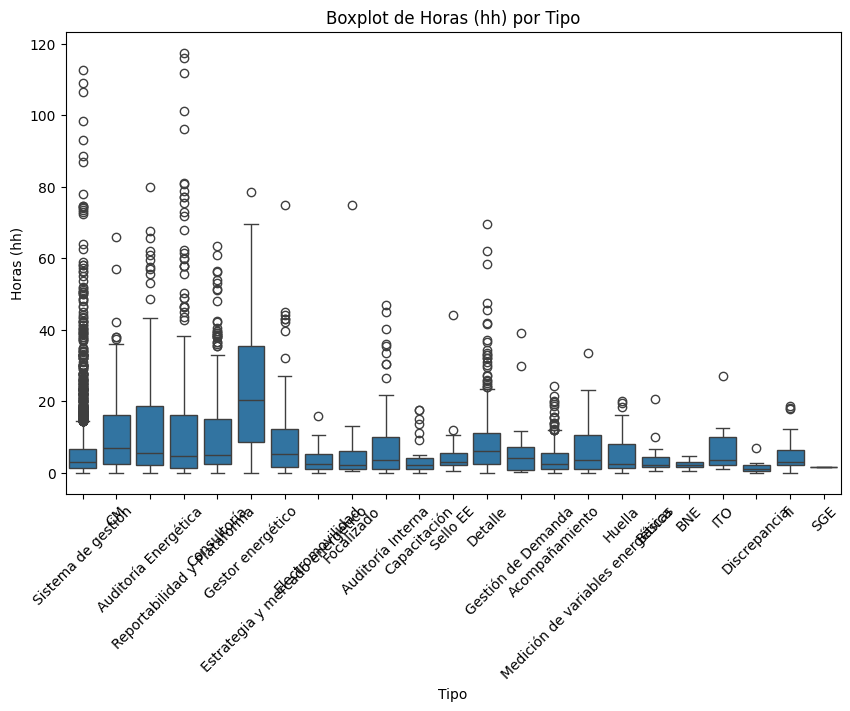

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot de 'hh' para cada valor en 'tipo'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x='tipo', y='hh')
plt.title("Boxplot de Horas (hh) por Tipo")
plt.xticks(rotation=45)  # Gira las etiquetas si hay muchas categorías en 'tipo'
plt.xlabel("Tipo")
plt.ylabel("Horas (hh)")
plt.show()

In [ ]:
import plotly.express as px

# Crear un boxplot interactivo de 'hh' por cada valor en 'tipo'
fig = px.box(df_filtrado, x='tipo', y='hh', points="all", title="Boxplot Interactivo de Horas (hh) por Tipo (CON VALORES 0)")
fig.update_layout(width=1500, height=900)

# Mostrar el gráfico
fig.show()

##IQR

In [ ]:
# Crear una lista vacía para almacenar los resultados de cada tipo
outliers_list = []

# Iterar sobre cada tipo de proyecto
for tipo, grupo in df_filtrado.groupby('tipo'):
    # Calcular Q1 y Q3 para el grupo actual
    Q1 = grupo['hh'].quantile(0.25)
    Q3 = grupo['hh'].quantile(0.75)
    IQR = Q3 - Q1

    # Umbrales de outliers para el grupo actual
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers y los valores no outliers del grupo actual
    outliers = grupo[(grupo['hh'] < lower_bound) | (grupo['hh'] > upper_bound)]
    non_outliers = grupo[(grupo['hh'] >= lower_bound) & (grupo['hh'] <= upper_bound)]

    # Calcular los datos de outliers
    cantidad_outliers = outliers.shape[0]
    min_outlier = outliers['hh'].min() if not outliers.empty else None
    max_outlier = outliers['hh'].max() if not outliers.empty else None

    # Calcular los datos de no outliers
    cantidad_non_outliers = non_outliers.shape[0]
    min_non_outlier = non_outliers['hh'].min() if not non_outliers.empty else None
    max_non_outlier = non_outliers['hh'].max() if not non_outliers.empty else None

    # Agregar los resultados a la lista
    outliers_list.append({
        'tipo': tipo,
        'cantidad_outliers': cantidad_outliers,
        'min_outlier': min_outlier,
        'max_outlier': max_outlier,
        'cantidad_non_outliers': cantidad_non_outliers,
        'min_non_outlier': min_non_outlier,
        'max_non_outlier': max_non_outlier
    })

# Convertir la lista de resultados en un DataFrame
outliers_report_CEROS = pd.DataFrame(outliers_list)

# Mostrar el reporte final
outliers_report_CEROS.head()


,tipo,cantidad_outliers,min_outlier,max_outlier,cantidad_non_outliers,min_non_outlier,max_non_outlier
0,Acompañamiento,19,12.0,24.333333,297,0.0,11.833333
1,Auditoría Energética,11,48.5,79.833333,278,0.0,43.166667
2,Auditoría Interna,9,26.5,46.916667,116,0.0,21.750000
3,BNE,0,NaN,NaN,6,0.5,4.583333
4,Básica,2,10.0,20.500000,11,0.5,6.500000


In [ ]:
from google.colab import files
outliers_report_CEROS = outliers_report_CEROS.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)
outliers_report_CEROS.to_csv('outliers_report_CEROS.csv', index=False, encoding='utf-8', sep=';')
files.download('outliers_report_CEROS.csv')

<ipython-input-123-67fba83e207d>:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_filtrado_no_ceros.head()

,Proyecto,week_rel,LineadeNegocio,tipo,Rol,hh
1,PRY2018-055,0,SGE,Sistema de gestión,Ingeniero de Proyecto,2.0
2,PRY2018-055,6,SGE,Sistema de gestión,Jefe de Proyectos,2.0
3,PRY2018-055,7,SGE,Sistema de gestión,Jefe de Proyectos,1.0
4,PRY2018-055,8,SGE,Sistema de gestión,Jefe de Proyectos,2.0
5,PRY2018-055,9,SGE,Sistema de gestión,Jefe de Proyectos,2.0


In [ ]:
import plotly.express as px

# Crear un boxplot interactivo de 'hh' por cada valor en 'tipo'
fig = px.box(df_filtrado_no_ceros, x='tipo', y='hh', points="all", title="Boxplot Interactivo de Horas (hh) por Tipo (SIN VALORES 0)")
fig.update_layout(width=1500, height=900)

# Mostrar el gráfico
fig.show()

In [ ]:
# Crear una lista vacía para almacenar los resultados de cada tipo
outliers_list = []

# Iterar sobre cada tipo de proyecto
for tipo, grupo in df_filtrado_no_ceros.groupby('tipo'):
    # Calcular Q1 y Q3 para el grupo actual
    Q1 = grupo['hh'].quantile(0.25)
    Q3 = grupo['hh'].quantile(0.75)
    IQR = Q3 - Q1

    # Umbrales de outliers para el grupo actual
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers y los valores no outliers del grupo actual
    outliers = grupo[(grupo['hh'] < lower_bound) | (grupo['hh'] > upper_bound)]
    non_outliers = grupo[(grupo['hh'] >= lower_bound) & (grupo['hh'] <= upper_bound)]

    # Calcular los datos de outliers
    cantidad_outliers = outliers.shape[0]
    min_outlier = outliers['hh'].min() if not outliers.empty else None
    max_outlier = outliers['hh'].max() if not outliers.empty else None

    # Calcular los datos de no outliers
    cantidad_non_outliers = non_outliers.shape[0]
    min_non_outlier = non_outliers['hh'].min() if not non_outliers.empty else None
    max_non_outlier = non_outliers['hh'].max() if not non_outliers.empty else None

    # Agregar los resultados a la lista
    outliers_list.append({
        'tipo': tipo,
        'cantidad_outliers': cantidad_outliers,
        'min_outlier': min_outlier,
        'max_outlier': max_outlier,
        'cantidad_non_outliers': cantidad_non_outliers,
        'min_non_outlier': min_non_outlier,
        'max_non_outlier': max_non_outlier
    })

# Convertir la lista de resultados en un DataFrame
outliers_report_NO_CEROS = pd.DataFrame(outliers_list)
# Mostrar el reporte final
outliers_report_NO_CEROS.head()

,tipo,cantidad_outliers,min_outlier,max_outlier,cantidad_non_outliers,min_non_outlier,max_non_outlier
0,Acompañamiento,19,12.0,24.333333,287,0.166667,11.833333
1,Auditoría Energética,11,48.5,79.833333,275,0.166667,43.166667
2,Auditoría Interna,9,26.5,46.916667,113,0.166667,21.750000
3,BNE,0,NaN,NaN,6,0.500000,4.583333
4,Básica,2,10.0,20.500000,11,0.500000,6.500000


In [ ]:
outliers_report_NO_CEROS.head(35)

,tipo,cantidad_outliers,min_outlier,max_outlier,cantidad_non_outliers,min_non_outlier,max_non_outlier
0,Acompañamiento,19,12.000000,24.333333,287,0.166667,11.833333
1,Auditoría Energética,11,48.500000,79.833333,275,0.166667,43.166667
2,Auditoría Interna,9,26.500000,46.916667,113,0.166667,21.750000
3,BNE,0,NaN,NaN,6,0.500000,4.583333
4,Básica,2,10.000000,20.500000,11,0.500000,6.500000
5,CM,6,37.500000,66.000000,127,0.500000,36.000000
6,Capacitación,6,9.000000,17.500000,34,0.250000,5.000000
7,Consultoría,27,35.500000,63.500000,193,0.250000,33.000000
8,Detalle,26,24.000000,69.500000,183,0.333333,23.333333
9,Discrepancia,1,7.000000,7.000000,5,0.750000,2.750000


ValueError: Data must be at least length 3.

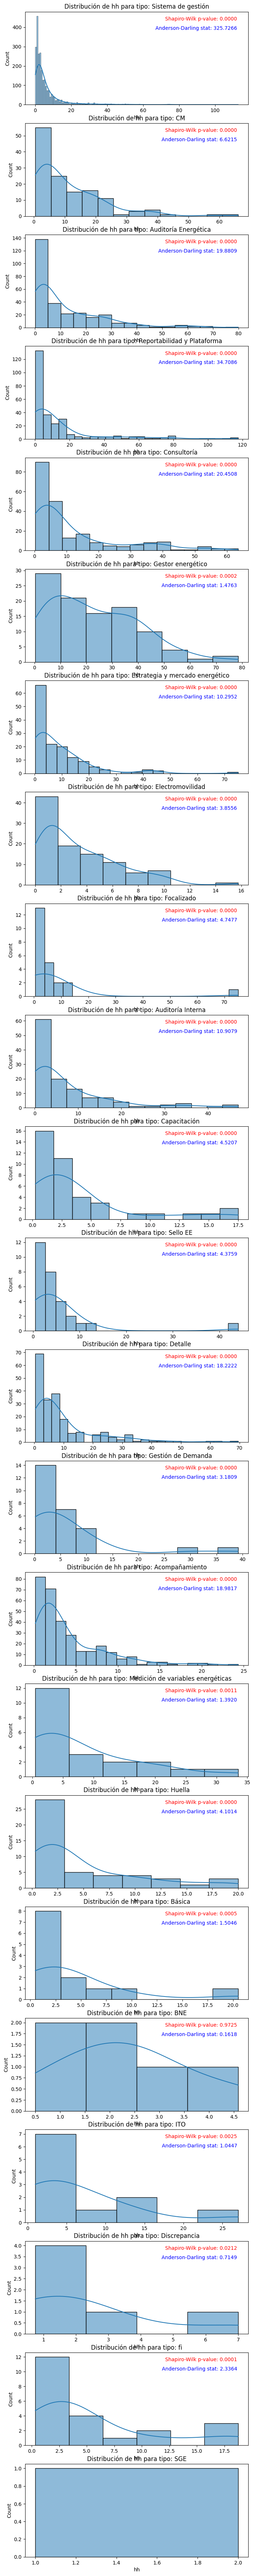

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

# Supongamos que df_filtrado_no_ceros ya está definido

# Crear gráficos de distribución por cada tipo de proyecto
tipos = df_filtrado_no_ceros['tipo'].unique()
fig, axes = plt.subplots(len(tipos), 1, figsize=(8, 4 * len(tipos)))

for i, tipo in enumerate(tipos):
    # Filtrar los datos para el tipo específico
    data_tipo = df_filtrado_no_ceros[df_filtrado_no_ceros['tipo'] == tipo]['hh']

    # Graficar la distribución
    sns.histplot(data_tipo, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de hh para tipo: {tipo}')

    # Realizar la prueba de Shapiro-Wilk
    stat, p_value = shapiro(data_tipo)
    axes[i].text(0.95, 0.95, f'Shapiro-Wilk p-value: {p_value:.4f}',
                 verticalalignment='top', horizontalalignment='right',
                 transform=axes[i].transAxes, color='red', fontsize=10)

    # Realizar la prueba de Anderson-Darling
    result_ad = anderson(data_tipo)
    axes[i].text(0.95, 0.85, f'Anderson-Darling stat: {result_ad.statistic:.4f}',
                 verticalalignment='top', horizontalalignment='right',
                 transform=axes[i].transAxes, color='blue', fontsize=10)

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
outliers_report_NO_CEROS = outliers_report_NO_CEROS.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, (int, float)) else x)
outliers_report_NO_CEROS.to_csv('outliers_report_NO_CEROS.csv', index=False, encoding='utf-8', sep=';')
files.download('outliers_report_NO_CEROS.csv')

<ipython-input-122-d16742641f4f>:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_filtrado.hh

<class 'pandas.core.frame.DataFrame'>
Index: 4710 entries, 1 to 5150
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Proyecto        4710 non-null   object 
 1   week_rel        4710 non-null   int64  
 2   LineadeNegocio  4710 non-null   object 
 3   tipo            4710 non-null   object 
 4   Rol             4710 non-null   object 
 5   hh              4710 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 257.6+ KB


In [ ]:
df_filtrado['Semana'] = 'Semana_' + df_filtrado['week_rel'].astype(str)
df_pivot = df_filtrado.pivot_table(index=['Proyecto', 'LineadeNegocio', 'tipo', 'Rol'],
                          columns='Semana',
                          values='hh',
                          aggfunc='sum').reset_index()
df_pivot = df_pivot.fillna(0)
df_pivot.head(5)

<ipython-input-121-d14a4aef7280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Semana'] = 'Semana_' + df_filtrado['week_rel'].astype(str)


Semana,Proyecto,LineadeNegocio,tipo,Rol,Semana_0,Semana_1,Semana_10,Semana_100,Semana_101,Semana_102,...,Semana_90,Semana_91,Semana_92,Semana_93,Semana_94,Semana_95,Semana_96,Semana_97,Semana_98,Semana_99
0,PRY2018-055,SGE,Sistema de gestión,Ingeniero de Proyecto,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PRY2019-025,SGE,Sistema de gestión,Ingeniero de Proyecto,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PRY2019-025,SGE,Sistema de gestión,Jefe de Proyectos,1.0,11.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PRY2019-064,SGE,Sistema de gestión,Ingeniero de Proyecto,0.0,0.0,8.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
semana_columns = [col for col in df_pivot.columns if col.startswith("Semana_")]

# Ordenar las columnas de semana numéricamente
semana_columns_sorted = sorted(semana_columns, key=lambda x: int(x.split('_')[1]))

# Reorganizar el DataFrame con las columnas ordenadas correctamente
df_pivot = df_pivot[['Proyecto', 'LineadeNegocio', 'tipo', 'Rol'] + semana_columns_sorted]

df_pivot.head()

Semana,Proyecto,LineadeNegocio,tipo,Rol,Semana_0,Semana_1,Semana_2,Semana_3,Semana_4,Semana_5,...,Semana_149,Semana_150,Semana_151,Semana_152,Semana_154,Semana_156,Semana_166,Semana_167,Semana_168,Semana_169
0,PRY2018-055,SGE,Sistema de gestión,Ingeniero de Proyecto,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PRY2018-055,SGE,Sistema de gestión,Jefe de Proyectos,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PRY2019-025,SGE,Sistema de gestión,Ingeniero de Proyecto,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PRY2019-025,SGE,Sistema de gestión,Jefe de Proyectos,1.0,11.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PRY2019-064,SGE,Sistema de gestión,Ingeniero de Proyecto,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from google.colab import files

semana_columns = [col for col in df_pivot.columns if col.startswith("Semana_")]

for col in semana_columns:
    # Redondear a 2 decimales
    df_pivot[col] = df_pivot[col].round(2)
    # Convertir a texto y reemplazar '.' por ','
    df_pivot[col] = df_pivot[col].astype(str).str.replace('.', ',', regex=False)

df_pivot.to_excel('df_testing_grouped.xlsx', index=False)

files.download('df_testing_grouped.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

roles_interes = ['Ingeniero de Proyecto', 'Jefe de Proyectos']
df_filtrado = df_testing_grouped[df_testing_grouped['Rol'].isin(roles_interes)]
df_testing_grouped['hh'] = df_testing_grouped['hh'].astype(str).str.replace('.', ',')
df_testing_grouped.to_csv('df_testing_grouped.csv', index=False, encoding='utf-8', sep=';')

# Descargar el archivo
files.download('df_testing_grouped.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
replace_dict = {1: 'Sistema de gestión', 2: 'Reportabilidad y Plataforma',
                3: 'Auditoría Energética', 4: 'Estrategia y mercado energético',
                5: 'CM', 6: 'Gestor energético', 7: 'Consultoría',
                8: 'Focalizado', 9: 'Electromovilidad', 10: 'Auditoría Interna',
                11: 'Sello EE', 12: 'Capacitación', 13: 'Detalle',
                14: 'Gestión de Demanda', 15: 'Acompañamiento',
                16: 'Medición de variables energéticas', 17: 'Básica',
                18: 'Huella', 19: 'BNE', 20: 'ITO', 21: 'Discrepancia',
                22: 'fi', 23: 'SGE'}

dz.loc[:, 'tipo'] = dz['tipo'].replace(replace_dict)

roles_interes = ['Ingeniero de Proyecto', 'Jefe de Proyectos']
df_filtrado = dz[dz['Rol'].isin(roles_interes)]
df_filtrado.head()

<ipython-input-154-0f6c39b9f3c6>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Sistema de gestión' 'Sistema de gestión' 'Sistema de gestión' ...
 'Sistema de gestión' 'Sistema de gestión' 'Sistema de gestión']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dz.loc[:, 'tipo'] = dz['tipo'].replace(replace_dict)


,Proyecto,LineadeNegocio,tipo,employee_id,Rol,hh,week_rel,max_week,fase
9493,PRY2018-055,SGE,Sistema de gestión,54,Ingeniero de Proyecto,2.0,0,30,Inicial
8541,PRY2018-055,SGE,Sistema de gestión,23,Jefe de Proyectos,2.0,6,30,Inicial
8583,PRY2018-055,SGE,Sistema de gestión,23,Jefe de Proyectos,1.0,7,30,Inicial
8686,PRY2018-055,SGE,Sistema de gestión,23,Jefe de Proyectos,2.0,8,30,Intermedia
8877,PRY2018-055,SGE,Sistema de gestión,23,Jefe de Proyectos,1.0,9,30,Intermedia


In [ ]:
dzpv4

LineadeNegocio                  tipo                    Rol        fase  \
                                                                              
2               AE  Auditoría Energética  Ingeniero de Proyecto       Final   
3               AE  Auditoría Energética  Ingeniero de Proyecto     Inicial   
4               AE  Auditoría Energética  Ingeniero de Proyecto  Intermedia   
5               AE  Auditoría Energética      Jefe de Proyectos       Final   
6               AE  Auditoría Energética      Jefe de Proyectos     Inicial   
..             ...                   ...                    ...         ...   
195          SGIIE        Acompañamiento  Ingeniero de Proyecto     Inicial   
196          SGIIE        Acompañamiento  Ingeniero de Proyecto  Intermedia   
197          SGIIE        Acompañamiento      Jefe de Proyectos       Final   
198          SGIIE        Acompañamiento      Jefe de Proyectos     Inicial   
199          SGIIE        Acompañamiento      Jefe de Proyectos  Intermedia   

       hh                     cluster  
      max      mean       min          
2    13.0  3.912990  0.250000       1  
3    12.0  3.712121  0.166667       1  
4    12.0  3.744610  0.166667       1  
5     8.0  1.243802  0.166667       2  
6     3.0  0.701823  0.166667       2  
..    ...       ...       ...     ...  
195   6.0  1.887821  0.166667       0  
196   5.0  1.379360  0.083333       0  
197   4.0  1.128415  0.333333       0  
198   4.5  1.516026  0.333333       0  
199   3.5  1.001984  0.166667       0  

[155 rows x 8 columns]

In [ ]:
from sklearn.metrics import r2_score
dzpv4.columns = ['LineadeNegocio', 'tipo', 'Rol', 'fase', 'hh_max', 'hh_mean', 'hh_min', 'cluster']
merged_df = dz.merge(dzpv4[['LineadeNegocio', 'tipo', 'Rol', 'fase', 'hh_mean']],
                     on=['LineadeNegocio', 'tipo', 'Rol', 'fase'],
                     how='left')

In [ ]:
merged_df

,Proyecto,LineadeNegocio,tipo,employee_id,Rol,hh,week_rel,max_week,fase,hh_mean
0,PRY2018-055,SGE,Sistema de gestión,54,Ingeniero de Proyecto,2.0,0,30,Inicial,2.343149
1,PRY2018-055,SGE,Sistema de gestión,23,Jefe de Proyectos,2.0,6,30,Inicial,0.892654
2,PRY2018-055,SGE,Sistema de gestión,23,Jefe de Proyectos,1.0,7,30,Inicial,0.892654
3,PRY2018-055,SGE,Sistema de gestión,23,Jefe de Proyectos,2.0,8,30,Intermedia,0.974800
4,PRY2018-055,SGE,Sistema de gestión,23,Jefe de Proyectos,1.0,9,30,Intermedia,0.974800
...,...,...,...,...,...,...,...,...,...,...
20346,PRY2024-041,SGIIE,Sistema de gestión,103,Ingeniero de Proyecto,1.0,3,4,Intermedia,1.319616
20347,PRY2024-041,SGIIE,Sistema de gestión,90,Jefe de Proyectos,1.0,3,4,Intermedia,0.779858
20348,PRY2024-041,SGIIE,Sistema de gestión,90,Jefe de Proyectos,0.5,4,4,Final,1.116142
20349,PRY2024-041,SGIIE,Sistema de gestión,90,Jefe de Proyectos,0.5,4,4,Final,1.116142


In [ ]:
merged_df = merged_df.dropna(subset=['hh_mean'])

In [ ]:
observed_hh = merged_df['hh']  # Valores reales del dataframe dz
predicted_hh = merged_df['hh_mean']  # Valores promedio de hh en dzpv4

In [ ]:
r2 = r2_score(observed_hh, predicted_hh)
print("R² del análisis de horas:", r2)

R² del análisis de horas: 0.21343340230991148


In [ ]:
from sklearn.metrics import mean_squared_log_error

msle = mean_squared_log_error(observed_hh, predicted_hh)
print("Mean Squared Logarithmic Error (MSLE):", msle)

Mean Squared Logarithmic Error (MSLE): 0.25799983287682815


In [ ]:
over_predictions = sum(pred > obs for obs, pred in zip(observed_hh, predicted_hh))
over_prediction_rate = over_predictions / len(observed_hh) * 100
print("Over-Prediction Rate:", over_prediction_rate, "%")

Over-Prediction Rate: 63.53711790393013 %


In [ ]:
import numpy as np

# Calcular el MAPE ajustado
errors = []
for obs, pred in zip(observed_hh, predicted_hh):
    if pred > obs:  # Penaliza solo si predice más horas de las necesarias
        errors.append(abs((obs - pred) / obs))
    else:
        errors.append(0)  # No penaliza si predice menos

mape_adjusted = np.mean(errors) * 100
print("Adjusted MAPE:", mape_adjusted)

Adjusted MAPE: 122.64581778326658


In [ ]:
penalty_over = 2  # Penalización para predicciones mayores que el valor real
errors = [
    abs(obs - pred) * penalty_over if pred > obs else abs(obs - pred)
    for obs, pred in zip(observed_hh, predicted_hh)
]
custom_loss = np.mean(errors)
print("Custom Asymmetric Loss:", custom_loss)

Custom Asymmetric Loss: 1.9084823148323586


In [ ]:
dztesting = dzpv4.copy()

In [ ]:
dzpv4.head()

LineadeNegocio                  tipo                    Rol        fase  \
                                                                            
2             AE  Auditoría Energética  Ingeniero de Proyecto       Final   
3             AE  Auditoría Energética  Ingeniero de Proyecto     Inicial   
4             AE  Auditoría Energética  Ingeniero de Proyecto  Intermedia   
5             AE  Auditoría Energética      Jefe de Proyectos       Final   
6             AE  Auditoría Energética      Jefe de Proyectos     Inicial   

     hh                     cluster  
    max      mean       min          
2  13.0  3.912990  0.250000       1  
3  12.0  3.712121  0.166667       1  
4  12.0  3.744610  0.166667       1  
5   8.0  1.243802  0.166667       2  
6   3.0  0.701823  0.166667       2

In [ ]:
dztesting.columns = ['LineadeNegocio', 'tipo', 'Rol', 'fase', 'hh_max', 'hh_mean', 'hh_min', 'cluster']
dztesting.head()

,LineadeNegocio,tipo,Rol,fase,hh_max,hh_mean,hh_min,cluster
2,AE,Auditoría Energética,Ingeniero de Proyecto,Final,13.0,3.912990,0.250000,1
3,AE,Auditoría Energética,Ingeniero de Proyecto,Inicial,12.0,3.712121,0.166667,1
4,AE,Auditoría Energética,Ingeniero de Proyecto,Intermedia,12.0,3.744610,0.166667,1
5,AE,Auditoría Energética,Jefe de Proyectos,Final,8.0,1.243802,0.166667,2
6,AE,Auditoría Energética,Jefe de Proyectos,Inicial,3.0,0.701823,0.166667,2


In [ ]:
using2 = ['project_id', 'Proyecto', 'IniProy', 'FinProy', 'week',
       'Cierre', 'week_rel', 'tipo', 'LineadeNegocio', 'Rol', 'employee_id', 'department_id', 'cliente',
       'cliente_id', 'C/Agencia', 'hh']
df_testing_final = dg[using2]
df_testing_final.head()

,project_id,Proyecto,IniProy,FinProy,week,Cierre,week_rel,tipo,LineadeNegocio,Rol,employee_id,department_id,cliente,cliente_id,C/Agencia,hh
8541,2,PRY2018-055,2020-10-08,2021-05-04,2020-47,2020-08-10,6,1,SGE,Jefe de Proyectos,23,4,9,9.0,0,2.0
10746,2,PRY2018-055,2020-10-08,2021-05-04,2021-12,2020-08-10,24,1,SGE,Jefe de Proyectos,23,4,9,9.0,0,4.0
10749,2,PRY2018-055,2020-10-08,2021-05-04,2021-12,2020-08-10,24,1,SGE,Jefe de Proyectos,23,4,9,9.0,0,6.0
10751,2,PRY2018-055,2020-10-08,2021-05-04,2021-11,2020-08-10,23,1,SGE,Jefe de Proyectos,23,4,9,9.0,0,4.0
2740,2,PRY2018-055,2020-10-08,2021-05-04,2021-14,2020-08-10,26,1,SGE,Ingeniero de Proyecto,21,4,9,9.0,0,1.0
